In [1]:
# install packages if imports dont work

import numpy as np
import pandas as pd
import seaborn as sns
import os
from numpy.polynomial import polynomial as P
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

#### Information about the data set:

Title: Slow to Anger and Fast to Forgive: Cooperation in an Uncertain World

Link: https://www.openicpsr.org/openicpsr/project/112924/version/V1/view?path=/openicpsr/112924/fcr:versions/V1/data/anal4/FRDdata.csv&type=file#

Game: To rematch subjects after the end of each repeated game, we used the turnpike protocol as in Dal
Bó (2005). Subjects were divided into two equal-sized groups, A and B. A-subjects
only interacted with B-subjects and vice versa, so that no subject ever played twice
with another subject, or with a subject who played with a subject they had played
with, so that subjects could not influence the play of subjects they interacted with in
the future.

Payoff matrix:

1. b/c = 1.5
| Player\Opponent | C        | D    |
| ------          | ----- | ---- |
| **C**           | (1, 1)     | (-2, 3) |
| **D**           | (3, -2)     | (0, 0) |

2. b/c = 2
| Player\Opponent | C        | D    |
| ------          | ----- | ---- |
| **C**           | (2, 2)     | (-2, 4) |
| **D**           | (4, -2)     | (0, 0) |

3. b/c = 2.5
| Player\Opponent | C        | D    |
| ------          | ----- | ---- |
| **C**           | (3, 3)     | (-2, 5) |
| **D**           | (5, -2)     | (0, 0) |

4. b/c = 4
| Player\Opponent | C        | D    |
| ------          | ----- | ---- |
| **C**           | (6, 6)     | (-2, 8) |
| **D**           | (8, -2)     | (0, 0) |

Data: decision == 0 implies that the subject defected in the PD

In [2]:
# Setting working directory
print(f'Before={os.getcwd()}') 

path = 'C:\\Users\\1412r\\sciebo\\GuiltAndResponsibility'
os.chdir(path) # Set wd to \sciebo\GuiltAndResponsibility
print(f'After={os.getcwd()}')

Before=C:\Users\1412r\sciebo\GuiltAndResponsibility\Codes
After=C:\Users\1412r\sciebo\GuiltAndResponsibility


In [3]:
# Get csv data

path = 'Data/FRDdata.csv'
df = pd.read_csv(path, header=0, delimiter='\t')

#df.head(20)

In [4]:
# Housekeeping

drop_cols = ['leniency', 'forgiveness', 'overallC_last4_act', 'firstC_last4_act', 'overallC_last4', 'firstC_last4', 'others1stInt', 'you_p_1', 'other_p_1', 'you_p_2', 'other_p_2']
df.drop(columns=drop_cols, inplace=True)

In [5]:
df.head()

,file,bc,error,subject,interaction,group,period,payoff,decision,numInteractions,overallC_all,overallC_all_act,ALLD
0,1,4.0,0.0,1,1,2,1,8,0,9,0.837838,0.837838,0
1,1,4.0,0.0,1,1,2,2,-2,1,9,0.837838,0.837838,0
2,1,4.0,0.0,1,1,2,3,-2,1,9,0.837838,0.837838,0
3,1,4.0,0.0,1,1,2,4,0,0,9,0.837838,0.837838,0
4,1,4.0,0.0,1,1,2,5,0,0,9,0.837838,0.837838,0


In [6]:
# Checking how the dataset looks

print(f'The shape of df is {df.shape}\n')
print(df.info())
df.describe()

The shape of df is (34446, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34446 entries, 0 to 34445
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file              34446 non-null  int64  
 1   bc                34446 non-null  float64
 2   error             34446 non-null  float64
 3   subject           34446 non-null  int64  
 4   interaction       34446 non-null  int64  
 5   group             34446 non-null  int64  
 6   period            34446 non-null  int64  
 7   payoff            34446 non-null  int64  
 8   decision          34446 non-null  int64  
 9   numInteractions   34446 non-null  int64  
 10  overallC_all      34446 non-null  float64
 11  overallC_all_act  34446 non-null  float64
 12  ALLD              34446 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 3.4 MB
None


,file,bc,error,subject,interaction,group,period,payoff,decision,numInteractions,overallC_all,overallC_all_act,ALLD
count,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000,34446.000000
mean,8.949893,2.949544,0.104834,12.510277,6.349358,6.505138,4.882483,2.356906,0.558555,11.432503,0.558555,0.552343,0.174911
std,4.602118,1.057078,0.039891,7.626553,3.596283,3.805073,2.811090,3.282084,0.496567,2.364042,0.283639,0.228535,0.379897
min,1.000000,1.500000,0.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.125000,6.000000,3.000000,3.000000,3.000000,0.000000,0.000000,9.000000,0.324786,0.398230,0.000000
50%,9.000000,2.500000,0.125000,12.000000,6.000000,6.000000,5.000000,2.000000,1.000000,12.000000,0.609756,0.584071,0.000000
75%,12.000000,4.000000,0.125000,18.000000,9.000000,9.000000,7.000000,6.000000,1.000000,13.000000,0.793814,0.725275,0.000000
max,18.000000,4.000000,0.125000,32.000000,15.000000,16.000000,16.000000,8.000000,1.000000,15.000000,1.000000,1.000000,1.000000


In [7]:
# Visiting the data - no of observation per subject for each bc value
pd.crosstab(index=df['subject'], columns=df['bc'], margins=True)

bc,1.5,2.0,2.5,4.0,All
subject,,,,,
1,277,191,266,787,1521
2,277,191,266,787,1521
3,277,191,266,787,1521
4,277,191,266,787,1521
5,277,191,266,787,1521
6,277,191,266,787,1521
7,277,191,266,787,1521
8,277,191,266,787,1521
9,277,191,266,787,1521


1. 32 subjects with varying number of trials for each bc value
2. No NaN values
3. Mean decision is 0.55, defection 55% of the times at average

In [8]:
import warnings
warnings.filterwarnings("ignore")

## 1) bc = 1.5

Subjects 31 and 32 wont be here (see the table above)

In [9]:
df1 = df[df['bc']==1.5]
print('The shape of df1 is', df1.shape)
print('Number of rows check out as per the previous table')

The shape of df1 is (6834, 13)
Number of rows check out as per the previous table


In [10]:
df1['decision_opp']=0
df1['decision_opp'].loc[(df1['payoff']==1)] = 1
df1['decision_opp'].loc[(df1['payoff']==3)] = 1

### Graphs

In [11]:
# PLayer wise frequency of action C

freq_table = pd.DataFrame(index=df1['subject'].unique(), columns=['D_freq', 'C_freq', 'CC_freq', 'DD_freq', 'CD_freq'])

for i in df1['subject'].unique():
    freq_table.loc[i, 'D_freq']  = sum((df1['decision']==0)&(df1['subject']==i))/sum(df1['subject']==i)
    freq_table.loc[i, 'C_freq']  = sum((df1['decision']==1)&(df1['subject']==i))/sum(df1['subject']==i)
    freq_table.loc[i, 'CC_freq'] = sum((df1['decision']==1)&(df1['decision_opp']==1)&(df1['subject']==i))/sum(df1['subject']==i)
    freq_table.loc[i, 'DD_freq'] = sum((df1['decision']==0)&(df1['decision_opp']==0)&(df1['subject']==i))/sum(df1['subject']==i)
    freq_table.loc[i, 'CD_freq'] = sum((df1['decision']==1)&(df1['decision_opp']==0)&(df1['subject']==i))/sum(df1['subject']==i)

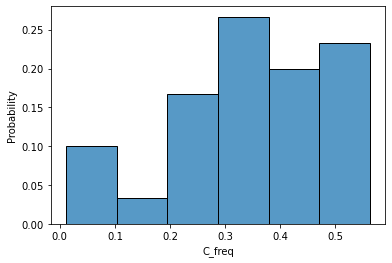

In [12]:
# Histogram of frequency of players playing C
ax = sns.histplot(data=freq_table, x=freq_table['C_freq'], stat='probability')

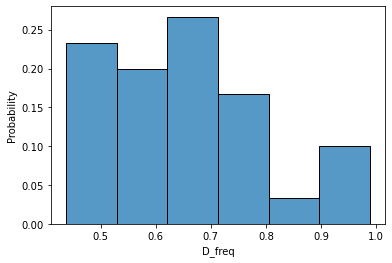

In [13]:
# Histogram of frequency of players playing C
ax = sns.histplot(data=freq_table, x=freq_table['D_freq'], stat='probability')

<AxesSubplot:xlabel='CC_freq', ylabel='Probability'>

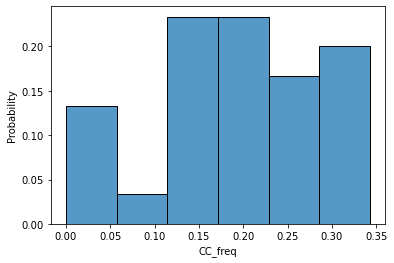

In [14]:
# Histogram of frequency of the outcome (C, C)
sns.histplot(x=freq_table['CC_freq'], stat='probability')

1. No one plays C more than 60%, however 3 play D with more than 90% of the times
2. Mean is 0.663732

<AxesSubplot:xlabel='DD_freq', ylabel='Probability'>

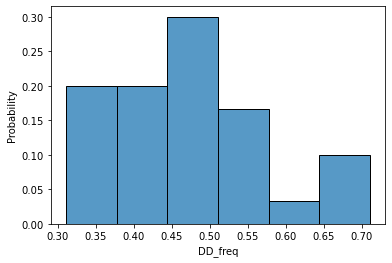

In [15]:
# Histogram of frequency of the outcome (D, D)
sns.histplot(x=freq_table['DD_freq'], stat='probability')

<AxesSubplot:xlabel='CD_freq', ylabel='Probability'>

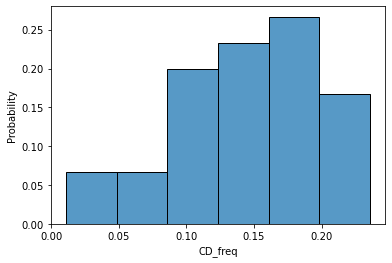

In [16]:
# Histogram of frequency of the outcome (C, D)
sns.histplot(x=freq_table['CD_freq'], stat='probability')

In [17]:
sum(freq_table['C_freq']<0.5)/30

0.8666666666666667

In [18]:
sum(freq_table['C_freq']==1)

0

In [19]:
sum(freq_table['C_freq']==0)

0

In [20]:
df1['payoff'].mean()

0.3794263974246415

In [21]:
# Subject wise distribution of action C

def make_freqplot(i):
    stop = sum(df1['subject']==i)+1
    temp = df1[df1['subject']==i]['decision']
    temp = 1-temp
    temp = (temp.cumsum())/range(1, stop)
    
    sns.lineplot(x=range(len(temp)), y=temp).set(ylabel='Probability of choosing D', xlabel=i)

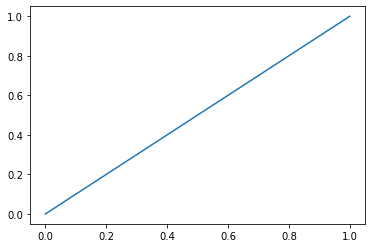

In [22]:
# Dummy graph to set the axis in the subsequent graphs
ax=sns.lineplot(x=np.linspace(0, 1, 100, endpoint=True), y=np.linspace(0, 1, 100, endpoint=True))

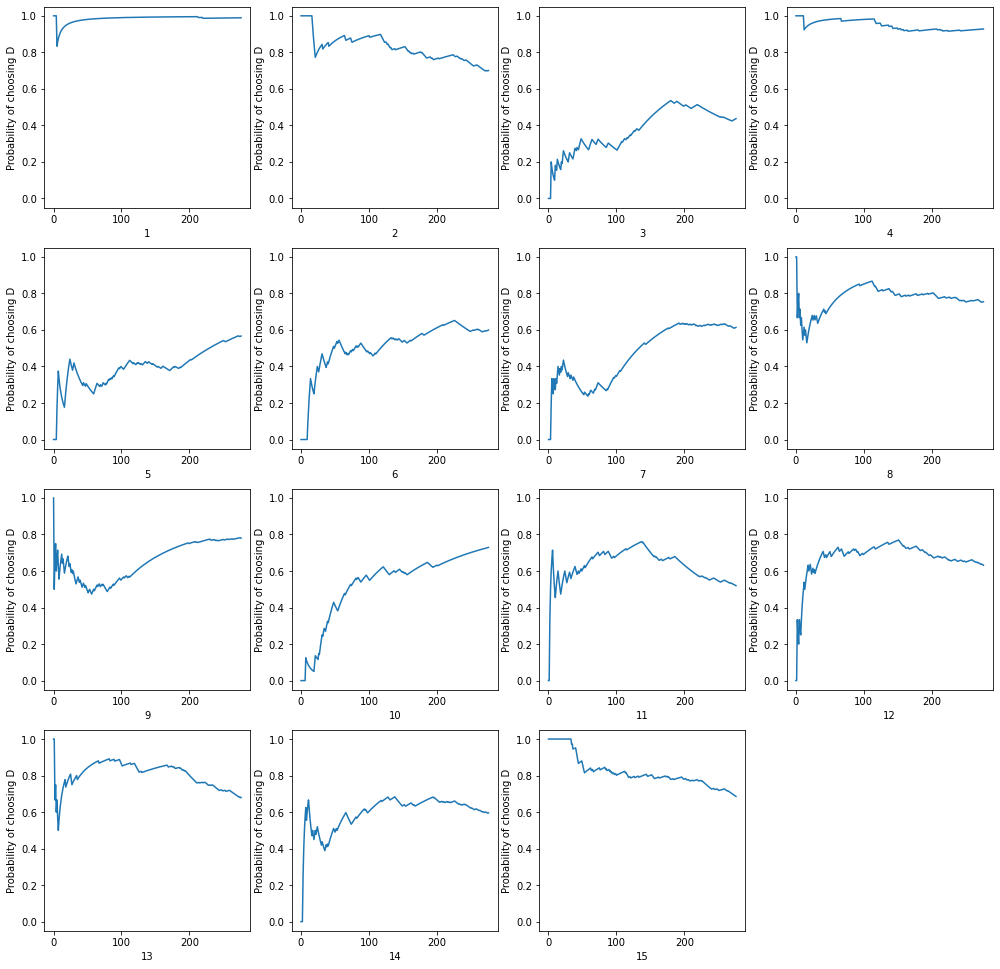

In [23]:
count = 1
no_of_cols = 4
no_of_rows = 4
players = np.array_split((df1['subject'].unique()), 2)

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 1-15')

for i in players[0]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

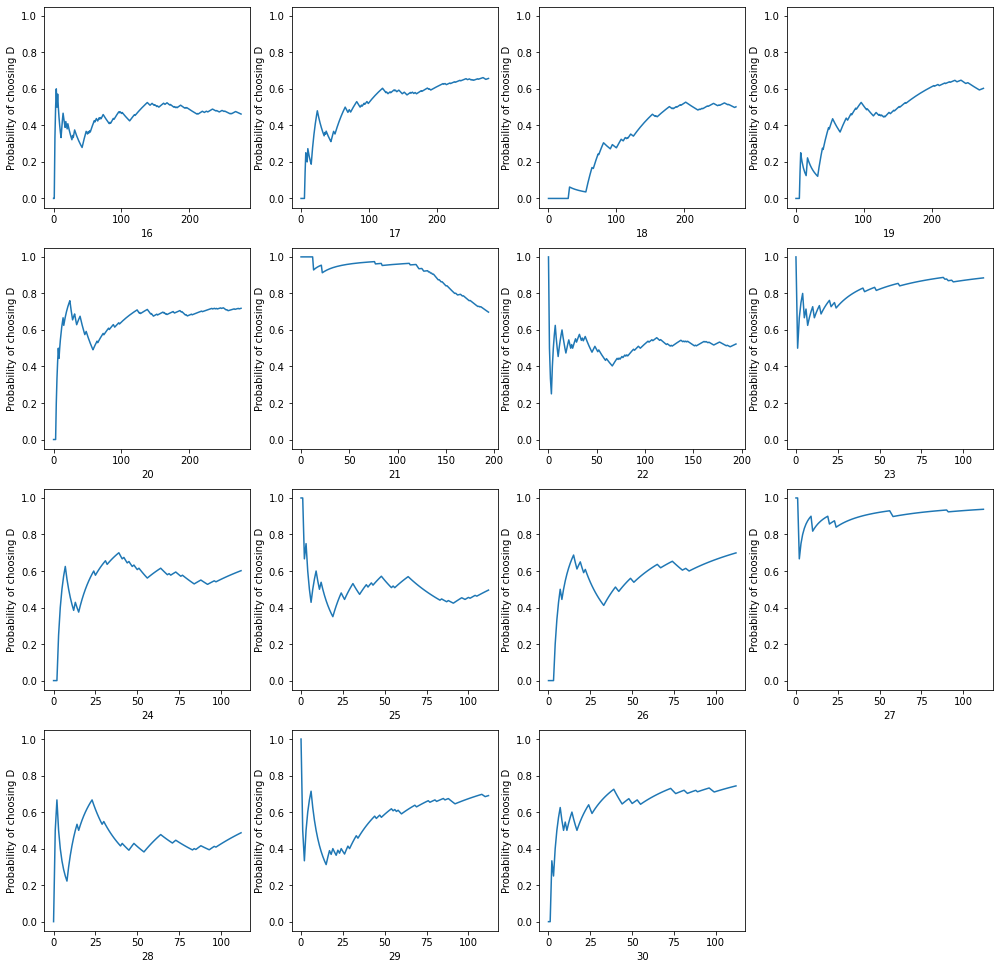

In [24]:
count = 1

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 16-30')

for i in players[1]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

## CR Utility

In [25]:
# Grid parameters

steps = 11 ##### Input number of steps here
N = df1.shape[0]

alpha_range = np.linspace(-1, 1, steps, endpoint=True)
beta_range  = np.linspace(-1, 1, steps, endpoint=True)
col = []

for alpha in alpha_range: 
    for beta in beta_range: 
        name = str(alpha), str(beta)
        col  = col + [name]

In [26]:
# Create empty dataframes
action1 = pd.DataFrame(index=df1.index, columns=col)    # utility matrix
error1  = pd.DataFrame(index=df1.index, columns=col)    # error matrix

In [27]:
# Action Grid: 1 for beta > 0.4 and 0 for beta < 0.4 except when alpha + beta > 1 (no equality in 11 steps' case)

for i in range(len(col)):
    beta = float(col[i][1]) # convert beta (from column name) from string to float
    if beta > 0.4:
        action1.iloc[:, i] = 1
    if beta < 0.4:
        alpha = float(col[i][0])
        if (alpha+beta > 1):
            action1.iloc[:, i] = 1
        if (alpha+beta < 1):
            action1.iloc[:, i] = 0
        
#action1.head()

In [28]:
# Calculating error matrix

for x in col:
    error1[x] = action1[x]==df1['decision']
    
error1 = 1 - error1 # Converting to ones and zeros from trues and falses
error1['subject'] = df1['subject'] # Adding player column for easier future calculations

#error1.head()

In [29]:
# Calculate average error for each participant

data = []

for i in df1['subject'].unique():
    sum_of_error     = (error1[error1['subject']==i].iloc[:,:-1]).sum() # summing over error rows where player == i and taking every column except the last (which is the name column) using iloc
    number_of_trials = (df1['subject']==i).sum()
    data             = data + [sum_of_error/number_of_trials]
    
avg_error1 = pd.DataFrame(data=data)

#avg_error1.head()

In [30]:
# Minimise error

min_error1 = avg_error1.idxmin(axis=1) # gives the first pair where minimum error occurs
#min_error1

In [31]:
# Find indices with minimum error

s = avg_error1.eq(avg_error1.min(axis=1), axis=0) # dataframe of boolean wherever min occurs
min_error_indices = s.agg(lambda s: s.index[s].values, axis=1) # row wise aggregating indices of columns where true occurs
#min_error_indices

In [32]:
# Creating a dataframe of alphas and betas which give minimum error, for every player

min_param = pd.DataFrame(min_error_indices[0].tolist(), columns=['alpha', 'beta'])
min_param['subject'] = 0

for i in min_error_indices.index:
    if i == min_error_indices.index.stop-1:
        break
    temp_df = pd.DataFrame(min_error_indices[i+1].tolist(), columns=['alpha', 'beta'])
    temp_df['subject'] = i+1
    min_param = pd.concat([min_param, temp_df])
    
min_param.index = range(len(min_param))

#min_param

In [33]:
# Find player wise average alpha and beta

min_param['alpha'] = min_param['alpha'].astype(float) # conevrting type from string to float
min_param['beta']  = min_param['beta'].astype(float)   # conevrting type from string to float

final = min_param.groupby(by=['subject']).mean() # grouping by mean wrt player

### Heatmaps

In [34]:
# Function to make heatmaps

def make_heatmap(player_no):
    temp_player = pd.DataFrame(index=alpha_range, columns=beta_range) # Creating empty dataset
    
    # Creating table to make heatmap
    for i in range(len(col)): 
        alpha = float(col[i][0])
        beta  = float(col[i][1])
        temp_player.loc[alpha, beta] = avg_error1[col[i]][player_no]
    temp_player = temp_player.astype(float)
    
    # Creating heatmap
    sns.set(rc = {'figure.figsize':(30,30)})
    sns.heatmap(data=temp_player, cmap="Blues", 
                      vmin=0, vmax=1, xticklabels=np.round(beta_range, decimals=2), yticklabels=np.round(alpha_range, decimals=2),
                      #cbar=False, annot=True, linewidths=.5
                     ).set(ylabel='Alpha', xlabel='Beta', title=(error1['subject'].unique())[player_no])

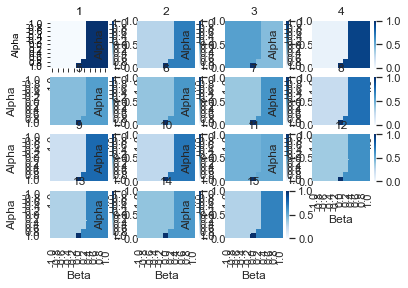

In [35]:
number_of_participants = len(df1['subject'].unique())

for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i)
    
plt.show()

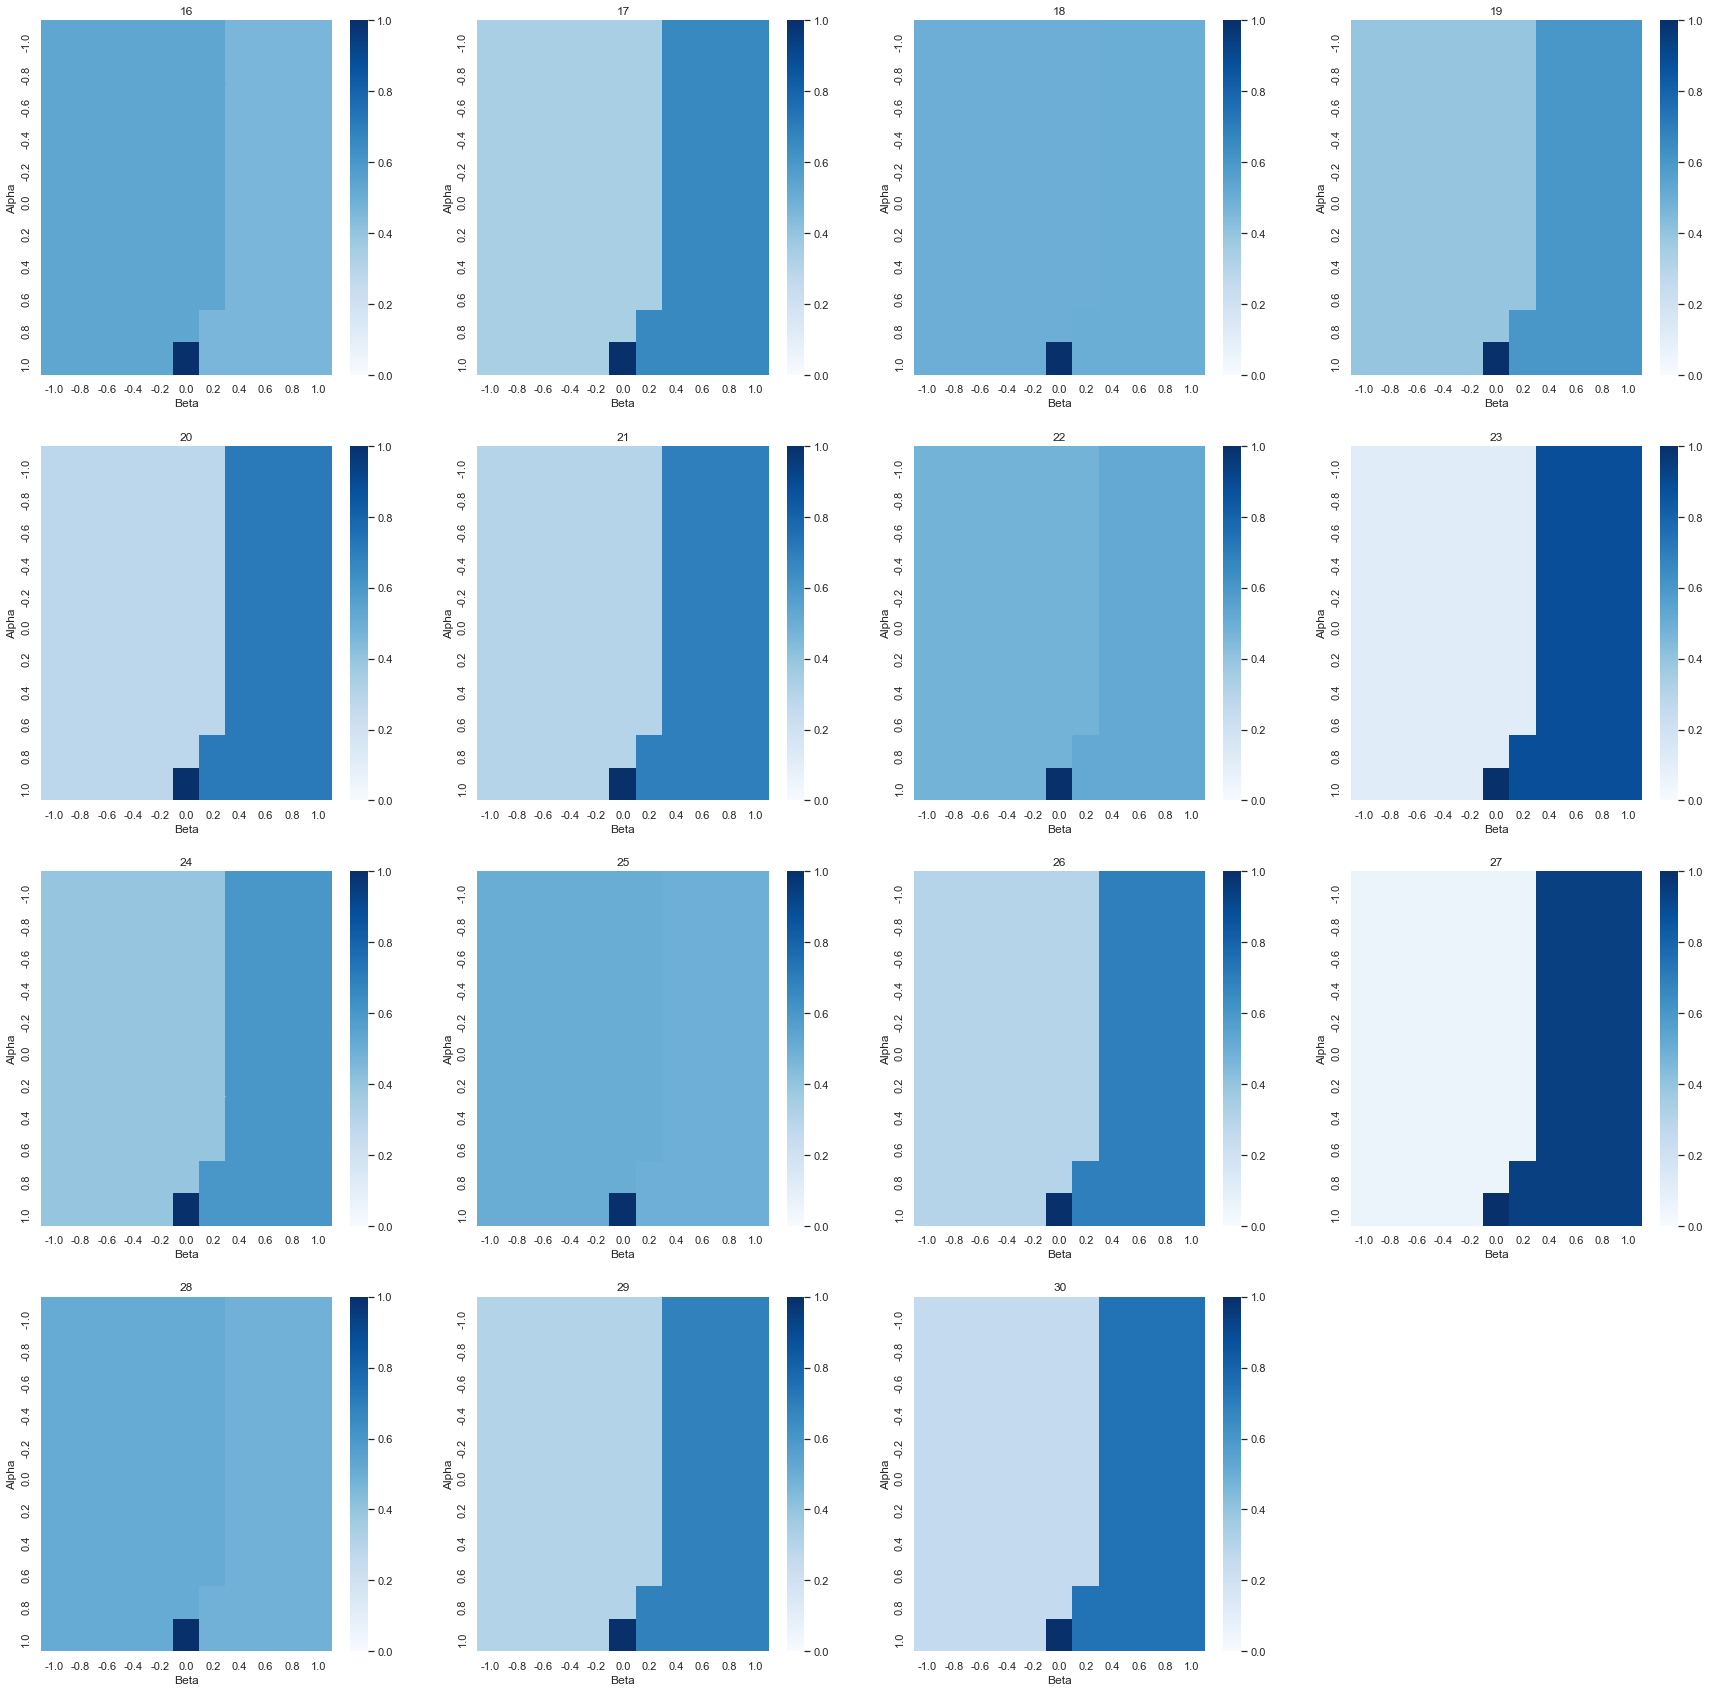

In [36]:
for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i+15)
    
plt.show()

In [37]:
# Making a dummy variable for the particiant type whose error is minimised in the left half of the heat map

freq_table['Is_lowtype'] = 1
freq_table.loc[3,  'Is_lowtype'] = 0
freq_table.loc[16, 'Is_lowtype'] = 0
freq_table.loc[18, 'Is_lowtype'] = 0
freq_table.loc[25, 'Is_lowtype'] = 0
freq_table.loc[28, 'Is_lowtype'] = 0

In [38]:
freq_table['C_freq'] = 1-freq_table['D_freq']

In [39]:
# Chi square test for actions vs type of participant

exp1 = freq_table[freq_table['Is_lowtype']==1].sum()
exp2 = freq_table[freq_table['Is_lowtype']==0].sum()

cont_table = pd.DataFrame(index=['C', 'D'], columns=['LowType', 'HighType'], data=[[exp1[2], exp2[2]], [exp1[0], exp2[0]]])
    
# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Variables are dependent')
else:
    print('H0 holds true: Variables are independent')

p value is 0.7846256713895536
H0 holds true: Variables are independent


In [40]:
#Making parameters for regression

reg = pd.DataFrame(index=df1.index, columns=['subject', 'C_dummy', 'payoff', 'Is_lowtype', 'D_freq'])
reg['C_dummy'] = df1['decision']
reg[['subject', 'payoff']] = df1[['subject', 'payoff']]


for i in df1['subject'].unique():
    reg['Is_lowtype'][reg['subject']==i] = freq_table.loc[i, 'Is_lowtype']
    reg['D_freq'][reg['subject']==i] = freq_table.loc[i, 'D_freq']

In [41]:
# t-test to see how different are expected CR actions from observed actions
# low type plays D

from scipy.stats import ttest_ind
def my_ttest(i): # ttest to check if cr expected matched observed
    x = 1-reg[reg['subject']==i]['Is_lowtype']
    y = df1[df1['subject']==i]['decision']
    t, p = ttest_ind(x, y)
    
    print('For subject ', i, ':')
    if p > 0.05:
        print('Reject Null hypothesis: the expected is significantly different from observed')
    else: print('Cannot reject Null hypothesis: observed matches expected')

In [42]:
for i in freq_table.index:
    my_ttest(i)

For subject  1 :
Reject Null hypothesis: the expected is significantly different from observed
For subject  2 :
Cannot reject Null hypothesis: observed matches expected
For subject  3 :
Cannot reject Null hypothesis: observed matches expected
For subject  4 :
Cannot reject Null hypothesis: observed matches expected
For subject  5 :
Cannot reject Null hypothesis: observed matches expected
For subject  6 :
Cannot reject Null hypothesis: observed matches expected
For subject  7 :
Cannot reject Null hypothesis: observed matches expected
For subject  8 :
Cannot reject Null hypothesis: observed matches expected
For subject  9 :
Cannot reject Null hypothesis: observed matches expected
For subject  10 :
Cannot reject Null hypothesis: observed matches expected
For subject  11 :
Cannot reject Null hypothesis: observed matches expected
For subject  12 :
Cannot reject Null hypothesis: observed matches expected
For subject  13 :
Cannot reject Null hypothesis: observed matches expected
For subject  

Expect of subject 1 all other can be predicted by CR utility

In [43]:
reg.corr()

,subject,C_dummy,payoff
subject,1.000000,0.050517,-0.014361
C_dummy,0.050517,1.000000,-0.185575
payoff,-0.014361,-0.185575,1.000000


##### Rough work (regression)

In [44]:
# Regress D on Is_lowtype, payoff and payoff_opponent
import statsmodels.formula.api as smf

formula = 'C_dummy ~ payoff + Is_lowtype'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.610536
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 6834
Model:                          Logit   Df Residuals:                     6831
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.04807
Time:                        14:14:39   Log-Likelihood:                -4172.4
converged:                       True   LL-Null:                       -4383.1
Covariance Type:            nonrobust   LLR p-value:                 3.080e-92
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1862      0.063      2.950      0.003       0.062       0.310
Is_lowtype[T.1]    -0.9313      0.069    -13.436      0.000      -1.067      -0.795
payoff             -0.2632      0.018    -14.892      0.000      -0.298      -0.229
===================================================================================
"""

In [45]:
formula = 'C_dummy ~ payoff + D_freq'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.574908
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 6834
Model:                          Logit   Df Residuals:                     6803
Method:                           MLE   Df Model:                           30
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.1036
Time:                        14:14:39   Log-Likelihood:                -3928.9
converged:                       True   LL-Null:                       -4383.1
Covariance Type:            nonrobust   LLR p-value:                1.053e-171
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.3517      0.124      2.836      0.005       0.109       0.595
D_freq[T.0.4620938628158845]     -0.1095      0.175     -0.627      0.531      -0.452       0.233
D_freq[T.0.48672566371681414]    -0.1976      0.229     -0.862      0.389      -0.647       0.252
D_freq[T.0.49557522123893805]    -0.2251      0.229     -0.984      0.325      -0.673       0.223
D_freq[T.0.5018050541516246]     -0.3376      0.174     -1.936      0.053      -0.679       0.004
D_freq[T.0.51985559566787]       -0.3326      0.174     -1.909      0.056      -0.674       0.009
D_freq[T.0.5230769230769231]     -0.3858      0.192     -2.013      0.044      -0.762      -0.010
D_freq[T.0.5667870036101083]     -0.4733      0.175     -2.703      0.007      -0.817      -0.130
D_freq[T.0.5956678700361011]     -0.6888      0.176     -3.912      0.000      -1.034      -0.344
D_freq[T.0.5992779783393501]     -0.6540      0.176     -3.714      0.000      -0.999      -0.309
D_freq[T.0.6017699115044248]     -0.7056      0.231     -3.055      0.002      -1.158      -0.253
D_freq[T.0.6028880866425993]     -0.6566      0.176     -3.728      0.000      -1.002      -0.311
D_freq[T.0.6137184115523465]     -0.7549      0.177     -4.273      0.000      -1.101      -0.409
D_freq[T.0.631768953068592]      -0.8582      0.177     -4.839      0.000      -1.206      -0.511
D_freq[T.0.6570397111913358]     -0.9101      0.179     -5.092      0.000      -1.260      -0.560
D_freq[T.0.6787003610108303]     -1.0402      0.180     -5.766      0.000      -1.394      -0.687
D_freq[T.0.6859205776173285]     -1.0731      0.181     -5.939      0.000      -1.427      -0.719
D_freq[T.0.6902654867256637]     -1.1009      0.242     -4.553      0.000      -1.575      -0.627
D_freq[T.0.6974358974358974]     -1.0286      0.201     -5.107      0.000      -1.423      -0.634
D_freq[T.0.6991150442477876]     -1.1205      0.243     -4.616      0.000      -1.596      -0.645
D_freq[T.0.7003610108303249]     -1.1588      0.182     -6.369      0.000      -1.515      -0.802
D_freq[T.0.7184115523465704]     -1.2253      0.184     -6.663      0.000      -1.586      -0.865
D_freq[T.0.7292418772563177]     -1.2798      0.185     -6.909      0.000      -1.643      -0.917
D_freq[T.0.7433628318584071]     -1.3760      0.252     -5.466      0.000      -1.869      -0.883
D_freq[T.0.7545126353790613]     -1.4132      0.188     -7.508      0.000      -1.782      -1.044
D_freq[T.0.779783393501805]      -1.5071      0.192     -7.830      0.000      -1.884      -1.130
D_freq[T.0.8849557522123894]     -2.3439      0.322     -7.271      0.000      -2.976      -1.712
D_freq[T.0.927797833935018]      -2.8423      0.264    -10.758      0.000      -3.360      -2.324
D_freq[T.0.9380530973451328]     -3.0393      0.411     -7.391      0.000      -3.845      -2.233
D_freq[T.0.9891696750902527]     -4.7969      0.594     -8.075      0.000      -5.961      -3.633
payoff 

In [46]:
formula = 'C_dummy ~ payoff + D_freq + Is_lowtype'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

         Current function value: 0.574908
         Iterations: 35


C:\Users\1412r\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 6834
Model:                          Logit   Df Residuals:                     6802
Method:                           MLE   Df Model:                           31
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.1036
Time:                        14:14:39   Log-Likelihood:                -3928.9
converged:                      False   LL-Null:                       -4383.1
Covariance Type:            nonrobust   LLR p-value:                5.848e-171
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.3517      0.124      2.836      0.005       0.109       0.595
D_freq[T.0.4620938628158845]     -0.1095      0.175     -0.627      0.531      -0.452       0.233
D_freq[T.0.48672566371681414]    -0.1976      0.229     -0.862      0.389      -0.647       0.252
D_freq[T.0.49557522123893805]    -0.2251      0.229     -0.984      0.325      -0.673       0.223
D_freq[T.0.5018050541516246]     -0.3376      0.174     -1.936      0.053      -0.679       0.004
D_freq[T.0.51985559566787]        0.9276   1.29e+06   7.21e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.5230769230769231]      0.8744   1.29e+06    6.8e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.5667870036101083]      0.7869   1.29e+06   6.12e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.5956678700361011]      0.5714   1.29e+06   4.44e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.5992779783393501]      0.6062   1.29e+06   4.71e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6017699115044248]      0.5547   1.29e+06   4.31e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6028880866425993]      0.6036   1.29e+06   4.69e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6137184115523465]      0.5053   1.29e+06   3.93e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.631768953068592]       0.4020   1.29e+06   3.13e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6570397111913358]      0.3501   1.29e+06   2.72e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6787003610108303]      0.2200   1.29e+06   1.71e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6859205776173285]      0.1872   1.29e+06   1.46e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6902654867256637]      0.1593   1.29e+06   1.24e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6974358974358974]      0.2316   1.29e+06    1.8e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.6991150442477876]      0.1397   1.29e+06   1.09e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.7003610108303249]      0.1014   1.29e+06   7.89e-08      1.000   -2.52e+06    2.52e+06
D_freq[T.0.7184115523465704]      0.0349   1.29e+06   2.71e-08      1.000   -2.52e+06    2.52e+06
D_freq[T.0.7292418772563177]     -0.0196   1.29e+06  -1.52e-08      1.000   -2.52e+06    2.52e+06
D_freq[T.0.7433628318584071]     -0.1158   1.29e+06     -9e-08      1.000   -2.52e+06    2.52e+06
D_freq[T.0.7545126353790613]     -0.1530   1.29e+06  -1.19e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.779783393501805]      -0.2469   1.29e+06  -1.92e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.8849557522123894]     -1.0837   1.29e+06  -8.43e-07      1.000   -2.52e+06    2.52e+06
D_freq[T.0.927797833935018]      -1.5821   1.29e+06  -1.23e-06      1.000   -2.52e+06    2.52e+06
D_freq[T.0.9380530973451328]     -1.7790   1.29e+06  -1.38e-06      1.000   -2.52e+06    2.52e+06
D_freq[T.0.9891696750902527]     -3.5366   1.29e+06  -2.75e-06      1.000   -2.52e+06    2.52e+06
Is_lowt

# 2) bc = 2

Again Subjects 31 and 32 wont be here (see the table above)

In [47]:
df2 = df[df['bc']==2]
print('The shape of df2 is', df2.shape)
print('Number of rows check out as per the previous table')

The shape of df2 is (5138, 13)
Number of rows check out as per the previous table


In [48]:
df2['decision_opp']=0
df2['decision_opp'].loc[(df2['payoff']==2)] = 1
df2['decision_opp'].loc[(df2['payoff']==4)] = 1

### Graphs

In [49]:
# PLayer wise frequency of action C

freq_table = pd.DataFrame(index=df2['subject'].unique(), columns=['D_freq', 'C_freq', 'CC_freq', 'DD_freq', 'CD_freq'])

for i in df2['subject'].unique():
    freq_table.loc[i, 'D_freq']  = sum((df2['decision']==0)&(df2['subject']==i))/sum(df2['subject']==i)
    freq_table.loc[i, 'C_freq']  = sum((df2['decision']==1)&(df2['subject']==i))/sum(df2['subject']==i)
    freq_table.loc[i, 'CC_freq'] = sum((df2['decision']==1)&(df2['decision_opp']==1)&(df2['subject']==i))/sum(df2['subject']==i)
    freq_table.loc[i, 'DD_freq'] = sum((df2['decision']==0)&(df2['decision_opp']==0)&(df2['subject']==i))/sum(df2['subject']==i)
    freq_table.loc[i, 'CD_freq'] = sum((df2['decision']==1)&(df2['decision_opp']==0)&(df2['subject']==i))/sum(df2['subject']==i)

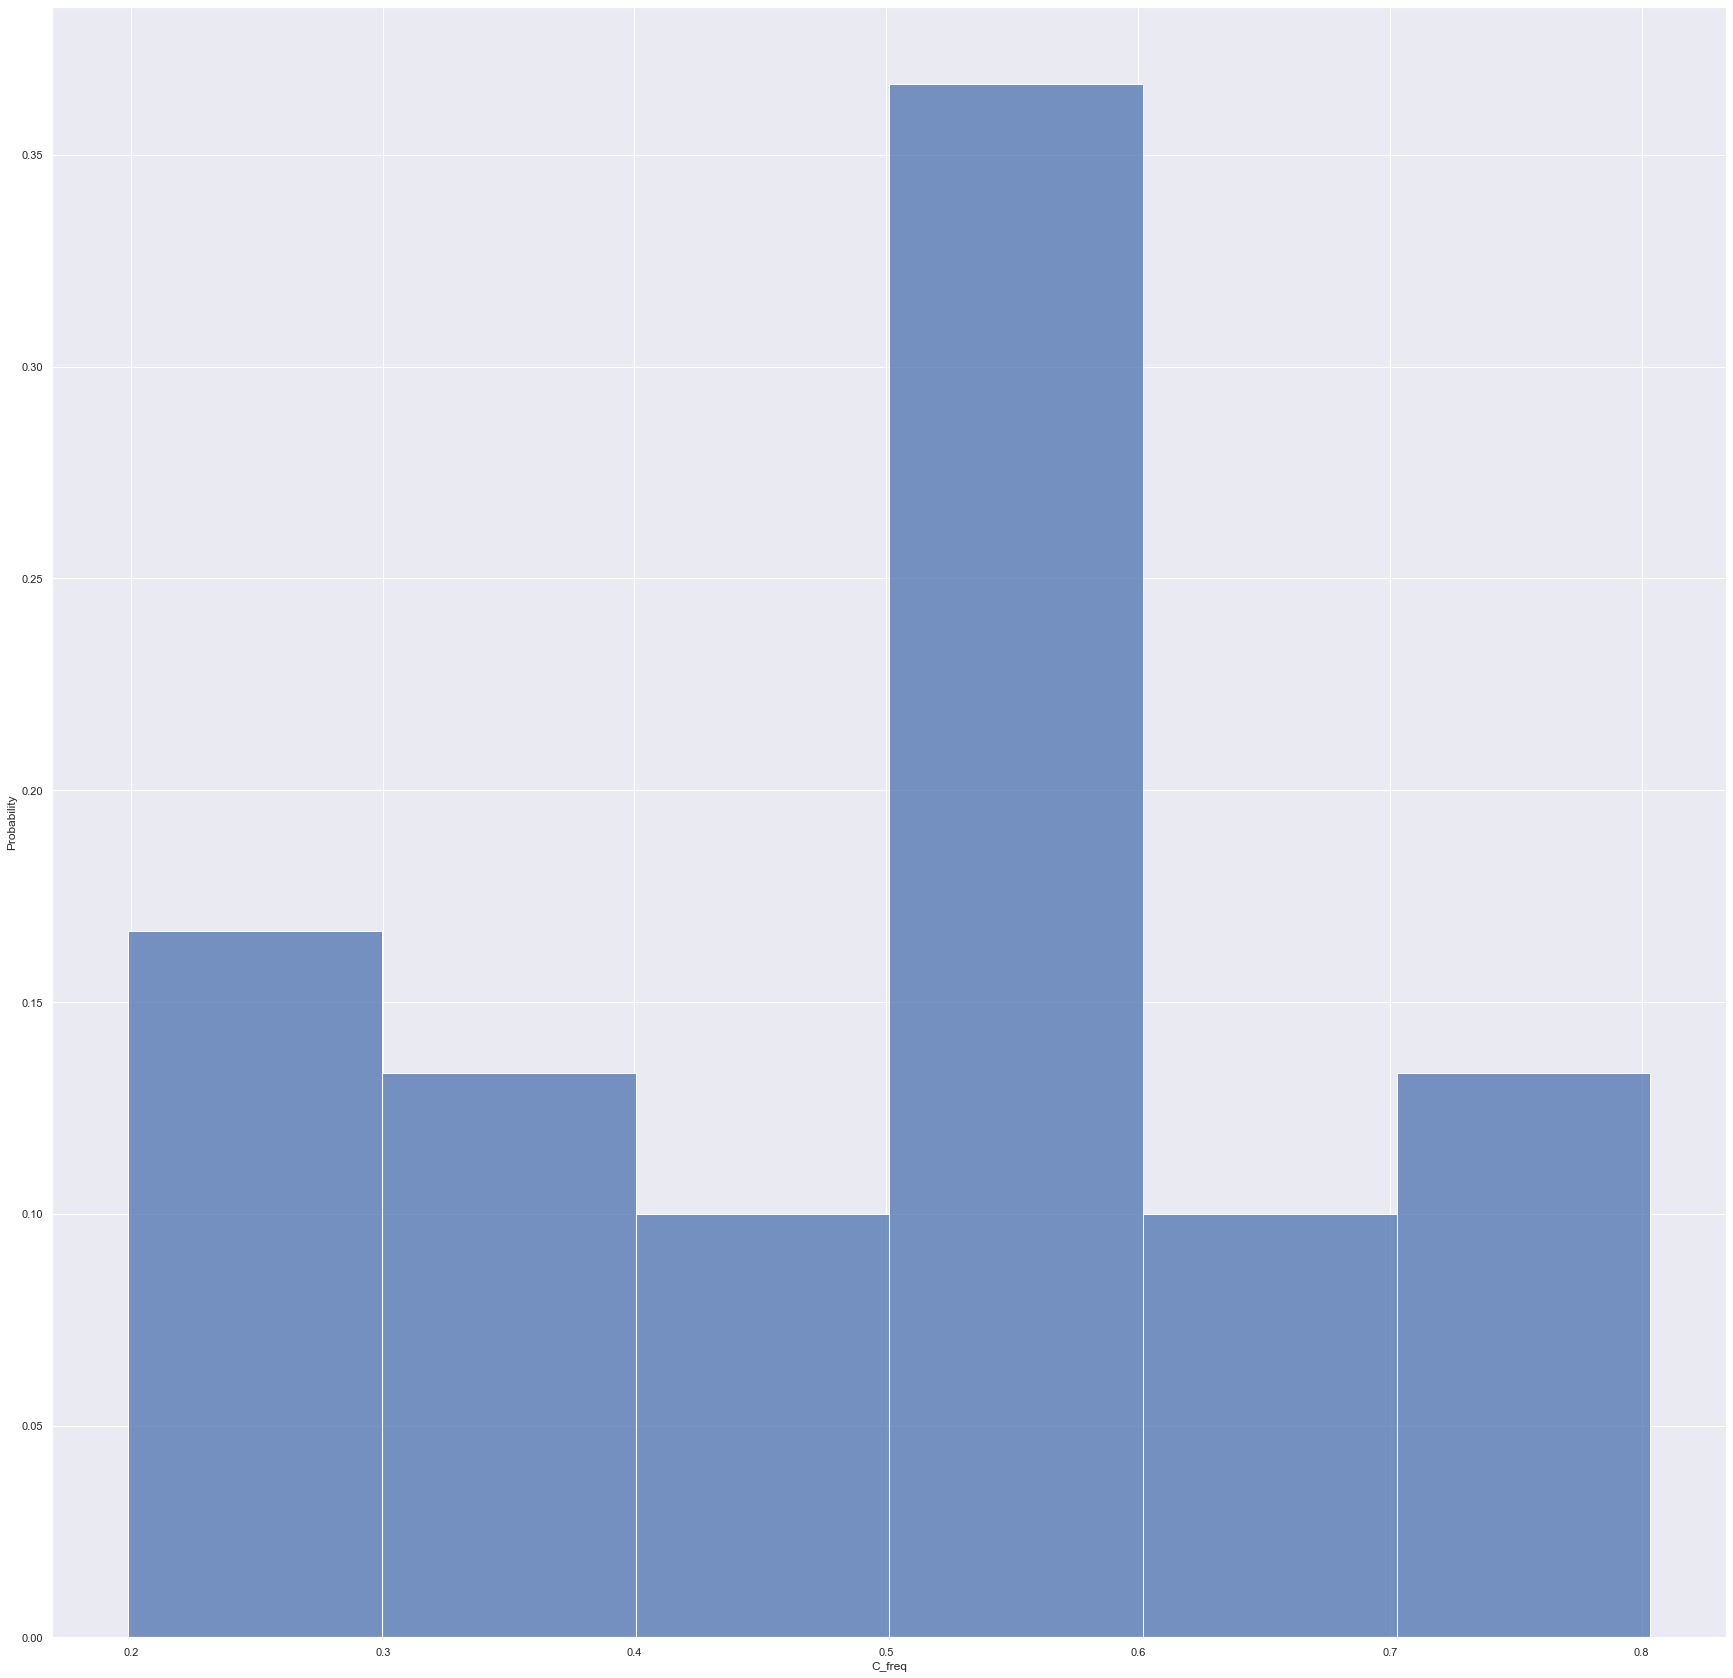

In [50]:
# Histogram of frequency of players playing C
ax = sns.histplot(data=freq_table, x=freq_table['C_freq'], stat='probability')

<AxesSubplot:xlabel='CC_freq', ylabel='Probability'>

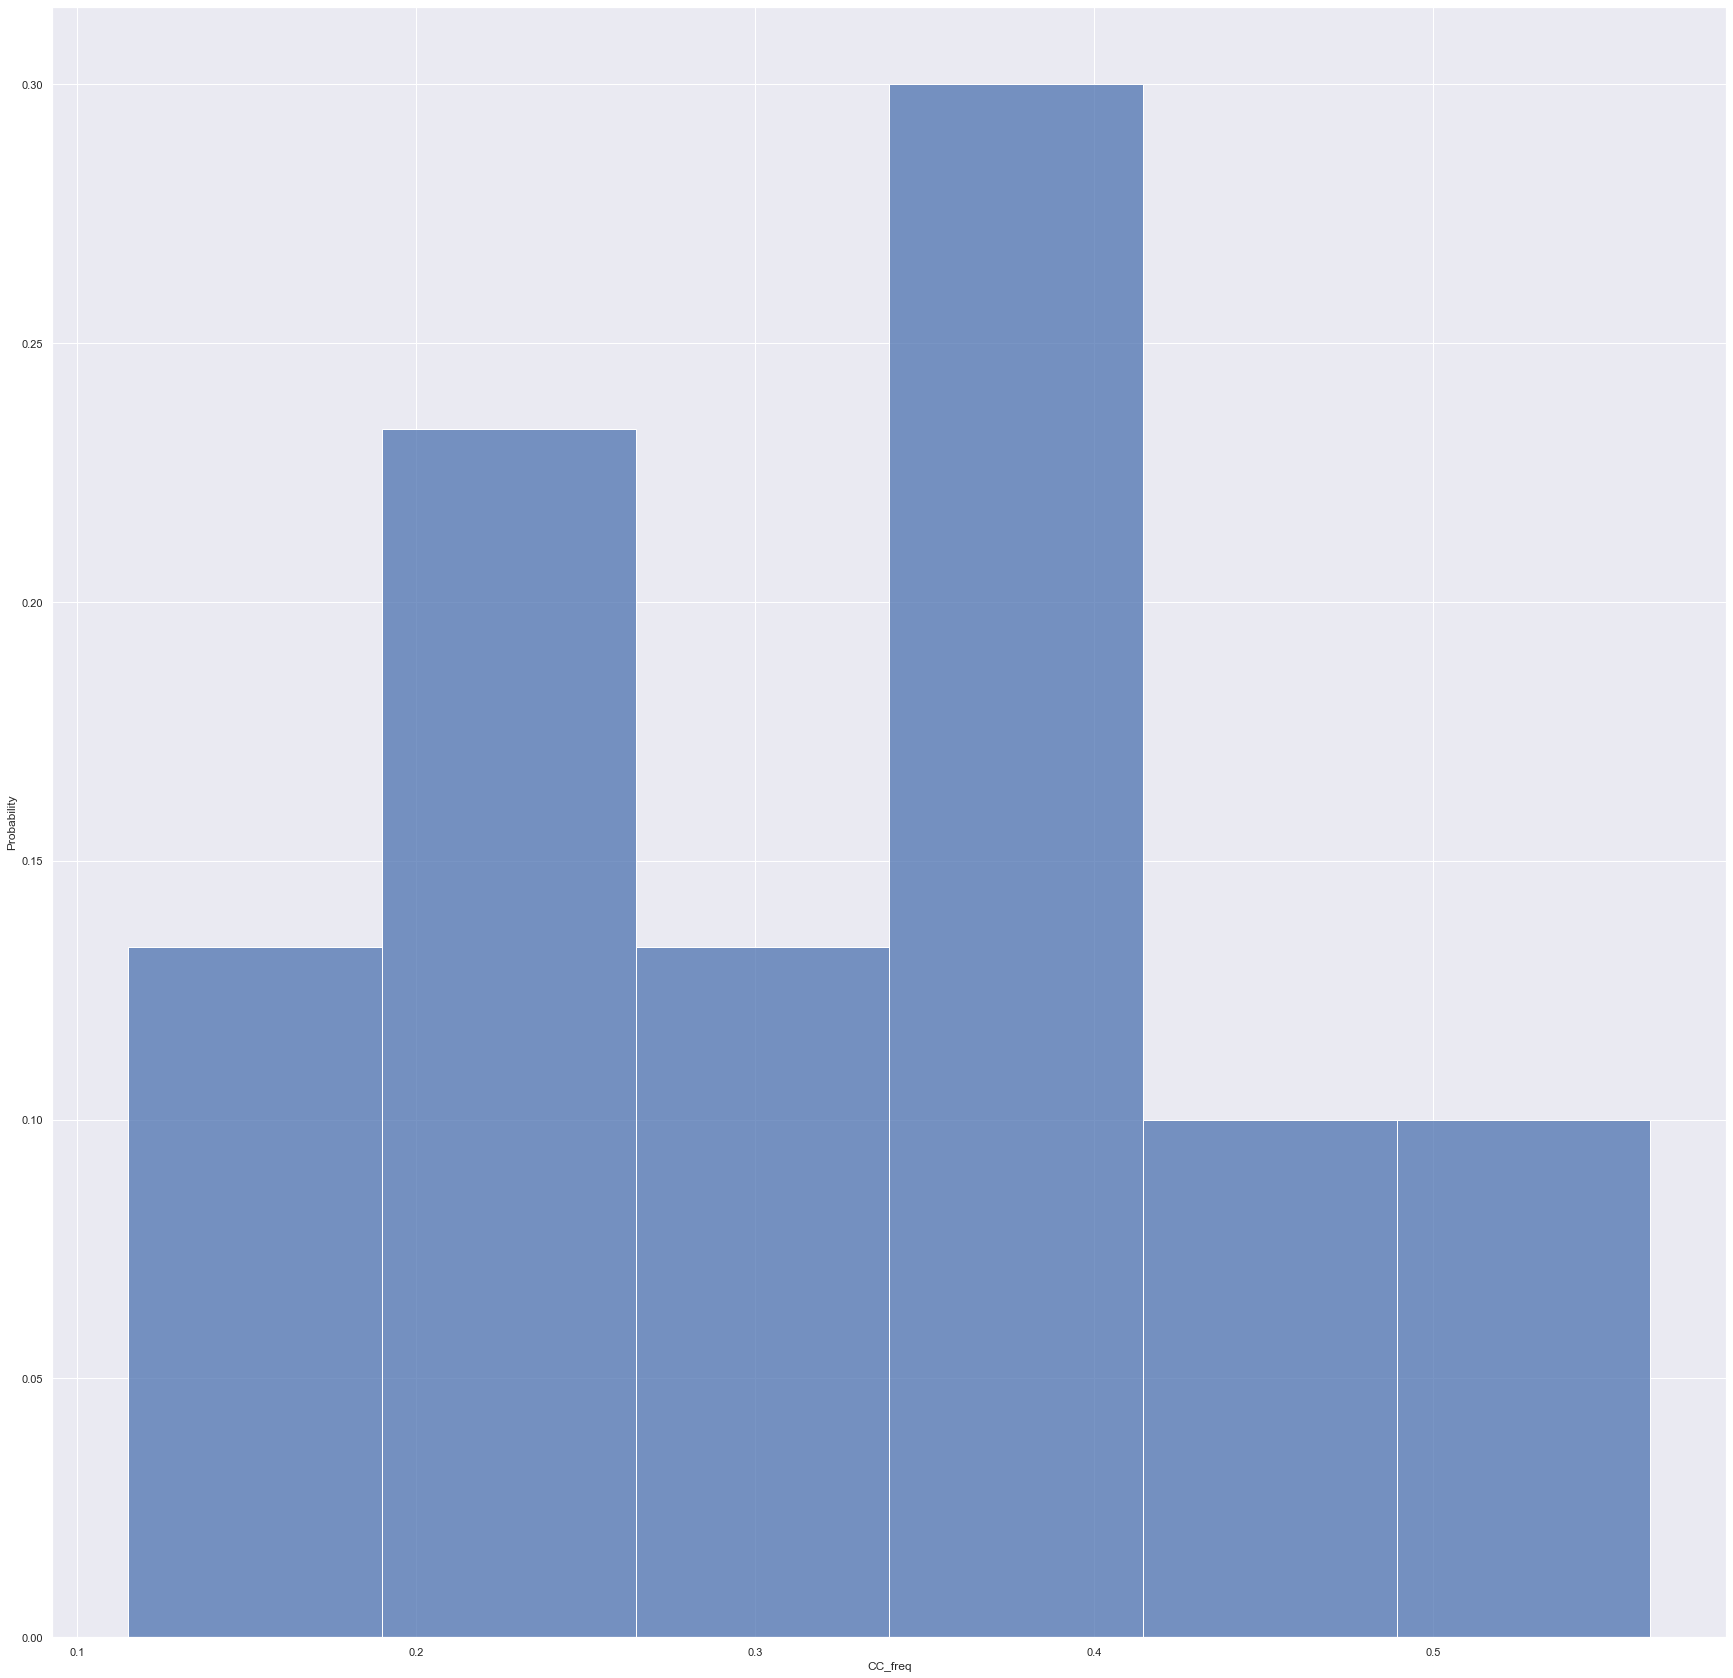

In [51]:
# Histogram of frequency of the outcome (C, C)
sns.histplot(x=freq_table['CC_freq'], stat='probability')

<AxesSubplot:xlabel='DD_freq', ylabel='Probability'>

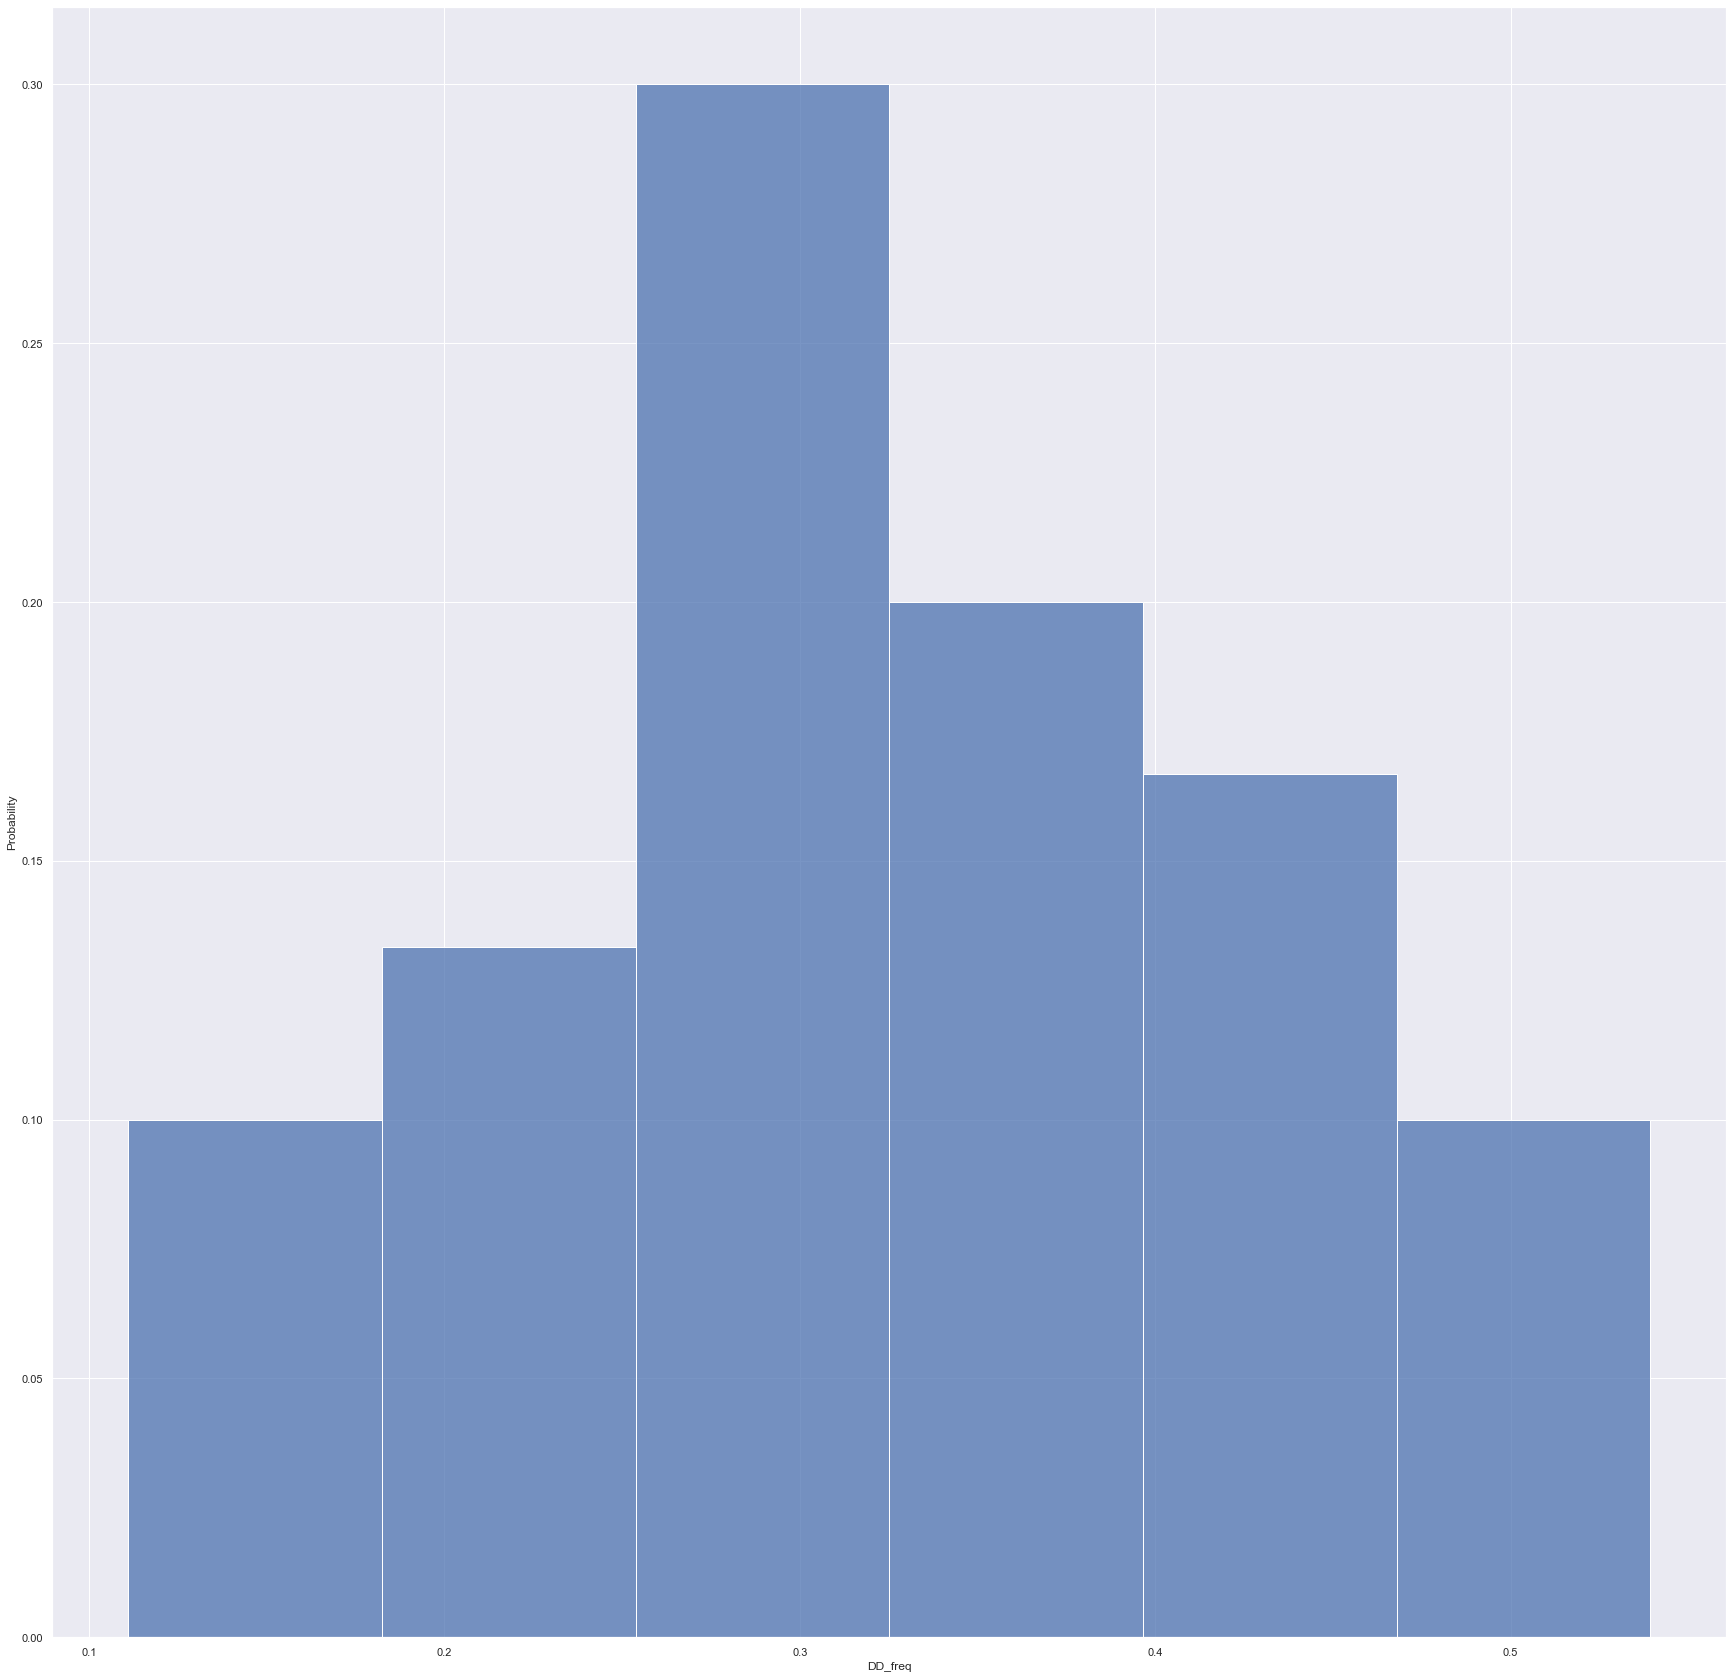

In [52]:
# Histogram of frequency of the outcome (D, D)
sns.histplot(x=freq_table['DD_freq'], stat='probability')

<AxesSubplot:xlabel='CD_freq', ylabel='Probability'>

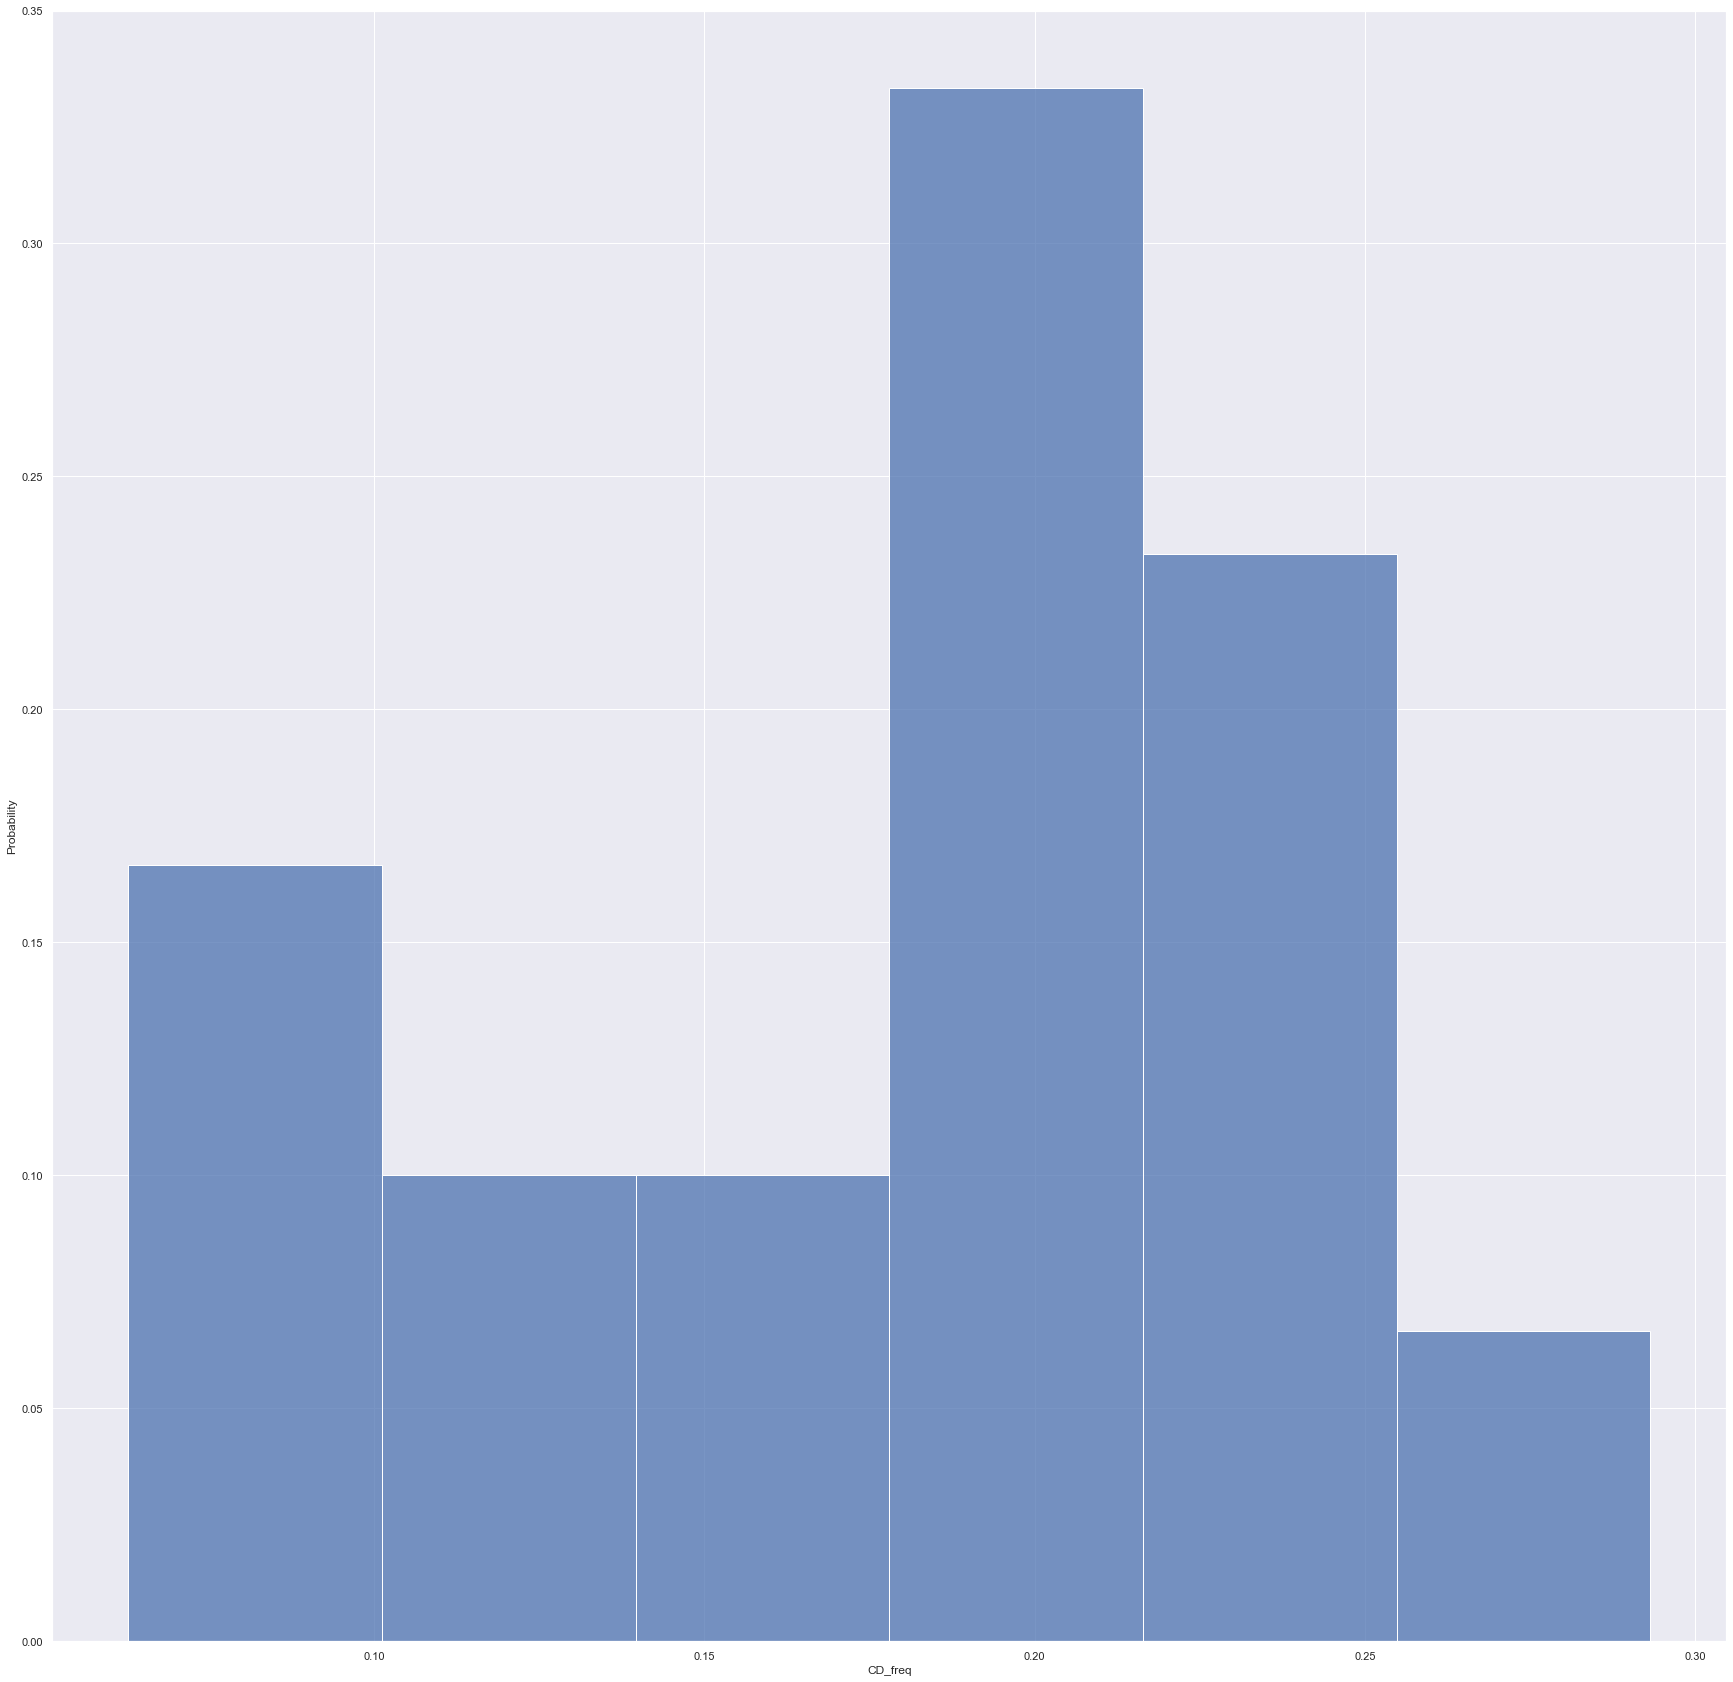

In [53]:
# Histogram of frequency of the outcome (C, D)
sns.histplot(x=freq_table['CD_freq'], stat='probability')

In [54]:
sum(freq_table['C_freq']<0.5)/30

0.4

In [55]:
sum(freq_table['C_freq']==1)

0

In [56]:
sum(freq_table['C_freq']==0)

0

In [57]:
df2['payoff'].mean()

0.982483456597898

1. Varied response than the previous case, mode is between 0.4 to 0.5. Inequality aversion?
2. Mean is 0.500615, decreased compared to before

In [58]:
# Subject wise distribution of action C

def make_freqplot(i):
    stop = sum(df2['subject']==i)+1
    temp = df2[df2['subject']==i]['decision']
    temp = 1-temp
    temp = (temp.cumsum())/range(1, stop)
    
    sns.lineplot(x=range(len(temp)), y=temp).set(ylabel='Probability of choosing D', xlabel=i)

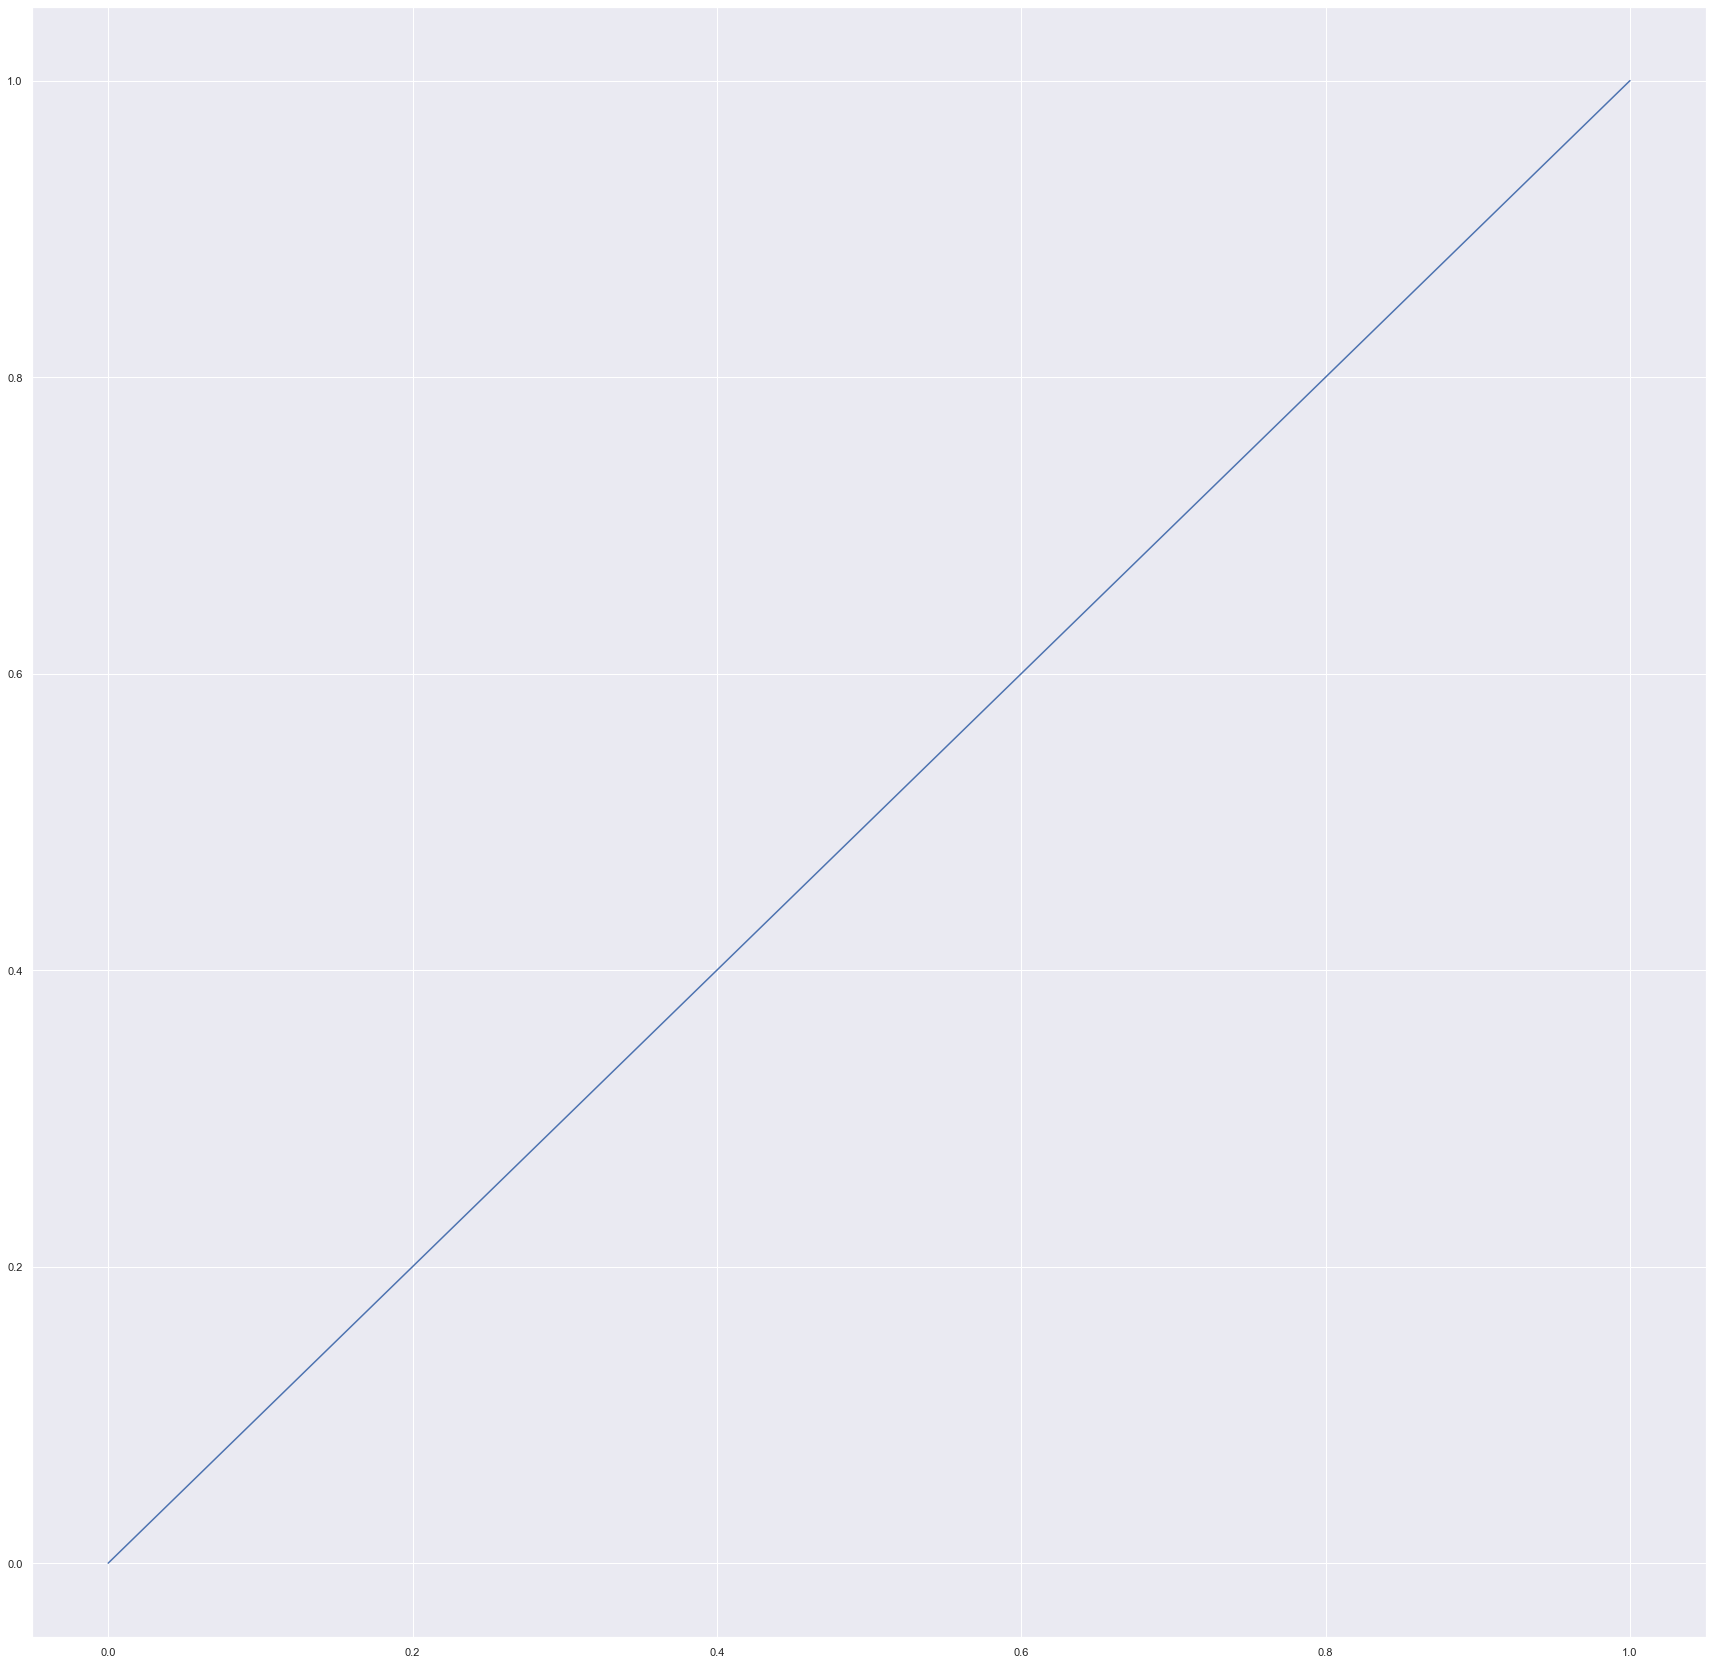

In [59]:
# Dummy graph to set the axis in the subsequent graphs
ax=sns.lineplot(x=np.linspace(0, 1, 100, endpoint=True), y=np.linspace(0, 1, 100, endpoint=True))

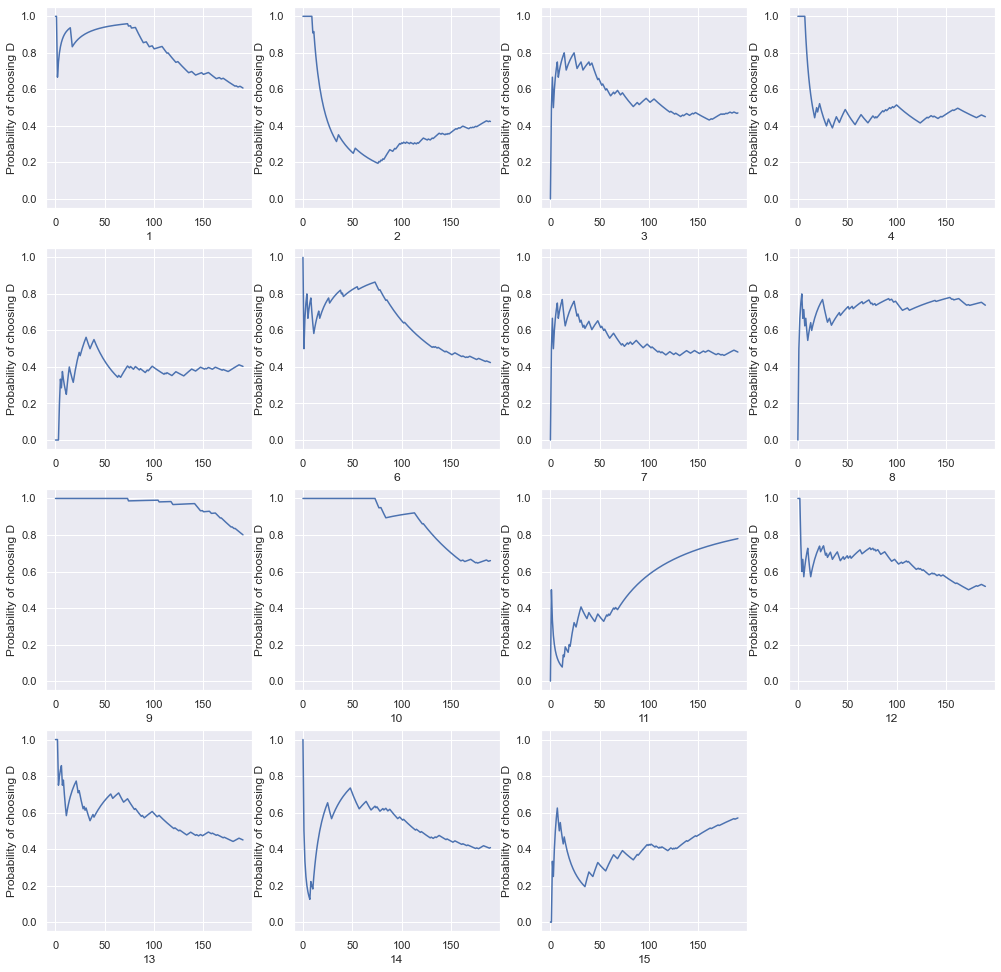

In [60]:
count = 1
no_of_cols = 4
no_of_rows = 4
players = np.array_split((df2['subject'].unique()), 2)

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 1-15')

for i in players[0]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

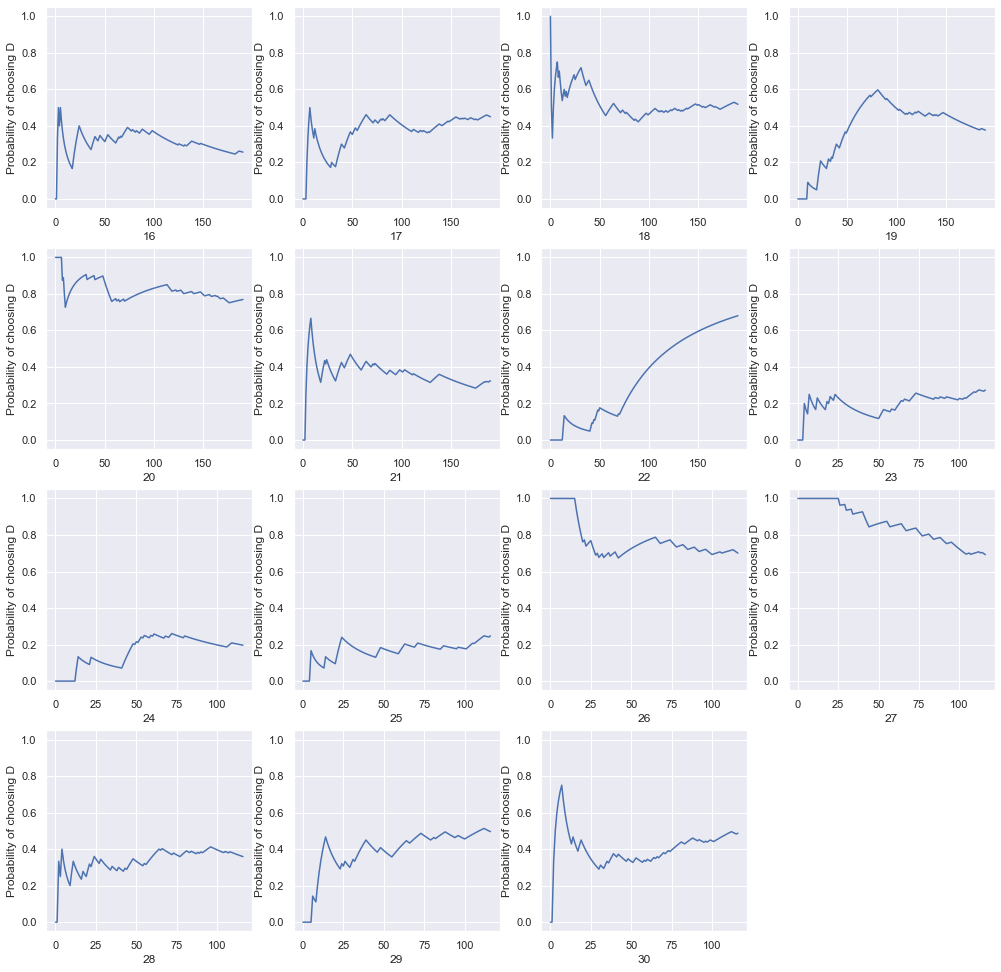

In [61]:
count = 1

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 16-30')

for i in players[1]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

## CR Utility

In [62]:
# Create empty dataframes
action2 = pd.DataFrame(index=df2.index, columns=col)    # utility matrix
error2  = pd.DataFrame(index=df2.index, columns=col)    # error matrix

In [63]:
# Action Grid: 1 for beta >= 1/3 and 0 for beta < 1/3 except when alpha + beta >= 1 (no equality in 11 steps' case)

for i in range(len(col)):
    beta = float(col[i][1]) # convert beta (from column name) from string to float
    if beta >= 1/3:
        action2.iloc[:, i] = 1
    if beta < 1/3:
        alpha = float(col[i][0])
        if (alpha+beta >= 1):
            action2.iloc[:, i] = 1
        if (alpha+beta < 1):
            action2.iloc[:, i] = 0
        
#action2.head()

In [64]:
# Calculating error matrix

for x in col:
    error2[x] = action2[x]==df2['decision']
    
error2 = 1 - error2 # Converting to ones and zeros from trues and falses
error2['subject'] = df2['subject'] # Adding player column for easier future calculations

#error2.head()

In [65]:
# Calculate average error for each participant

data = []

for i in df2['subject'].unique():
    sum_of_error     = (error2[error2['subject']==i].iloc[:,:-1]).sum() # summing over error rows where player == i and taking every column except the last (which is the name column) using iloc
    number_of_trials = (df2['subject']==i).sum()
    data             = data + [sum_of_error/number_of_trials]
    
avg_error2 = pd.DataFrame(data=data)

#avg_error2.head()

In [66]:
# Minimise error

min_error2 = avg_error2.idxmin(axis=1) # gives the first pair where minimum error occurs
#min_error2

In [67]:
# Find indices with minimum error

s = avg_error2.eq(avg_error2.min(axis=1), axis=0) # dataframe of boolean wherever min occurs
min_error_indices2 = s.agg(lambda s: s.index[s].values, axis=1) # row wise aggregating indices of columns where true occurs
#min_error_indices2

In [68]:
# Creating a dataframe of alphas and betas which give minimum error, for every player

min_param2 = pd.DataFrame(min_error_indices2[0].tolist(), columns=['alpha', 'beta'])
min_param2['subject'] = 0

for i in min_error_indices2.index:
    if i == min_error_indices2.index.stop-1:
        break
    temp_df = pd.DataFrame(min_error_indices2[i+1].tolist(), columns=['alpha', 'beta'])
    temp_df['subject'] = i+1
    min_param2 = pd.concat([min_param2, temp_df])
    
min_param2.index = range(len(min_param2))

#min_param2

In [69]:
# Find player wise average alpha and beta

min_param2['alpha'] = min_param2['alpha'].astype(float) # conevrting type from string to float
min_param2['beta']  = min_param2['beta'].astype(float)   # conevrting type from string to float

final2 = min_param2.groupby(by=['subject']).mean() # grouping by mean wrt player

## Heatmap

In [70]:
# Function to make heatmaps

def make_heatmap(player_no):
    temp_player = pd.DataFrame(index=alpha_range, columns=beta_range) # Creating empty dataset
    
    # Creating table to make heatmap
    for i in range(len(col)): 
        alpha = float(col[i][0])
        beta  = float(col[i][1])
        temp_player.loc[alpha, beta] = avg_error2[col[i]][player_no]
    temp_player = temp_player.astype(float)
    
    # Creating heatmap
    sns.set(rc = {'figure.figsize':(30,30)})
    sns.heatmap(data=temp_player, cmap="Blues", 
                      vmin=0, vmax=1, xticklabels=np.round(beta_range, decimals=2), yticklabels=np.round(alpha_range, decimals=2),
                      #cbar=False, annot=True, linewidths=.5
                     ).set(ylabel='Alpha', xlabel='Beta', title=(error2['subject'].unique())[player_no])

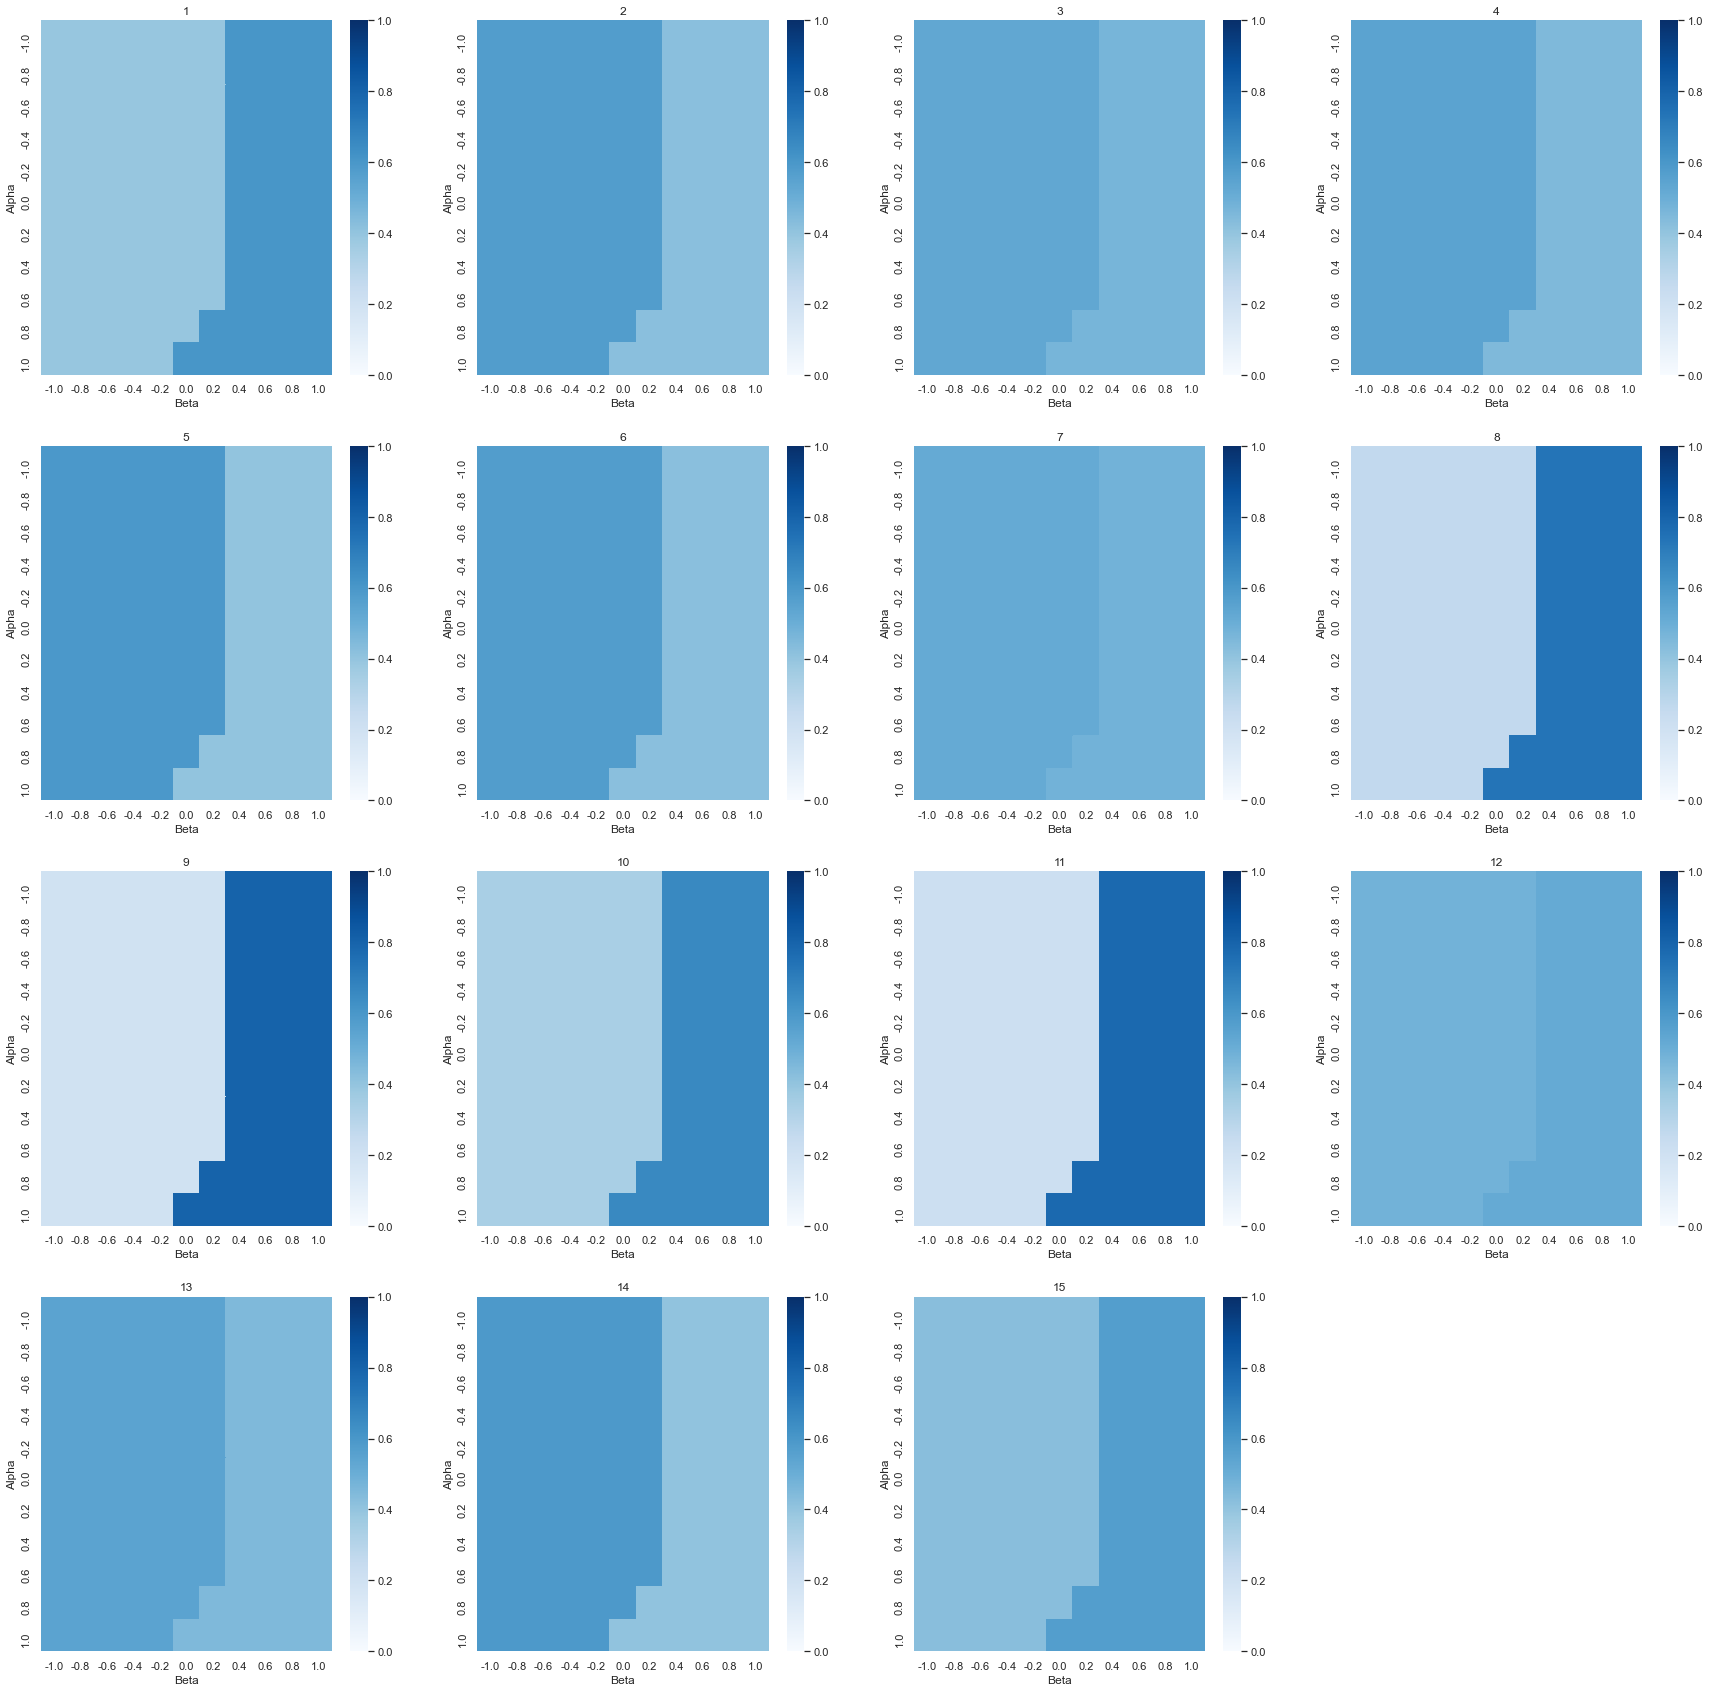

In [71]:
number_of_participants = len(df2['subject'].unique())

for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i)
    
plt.show()

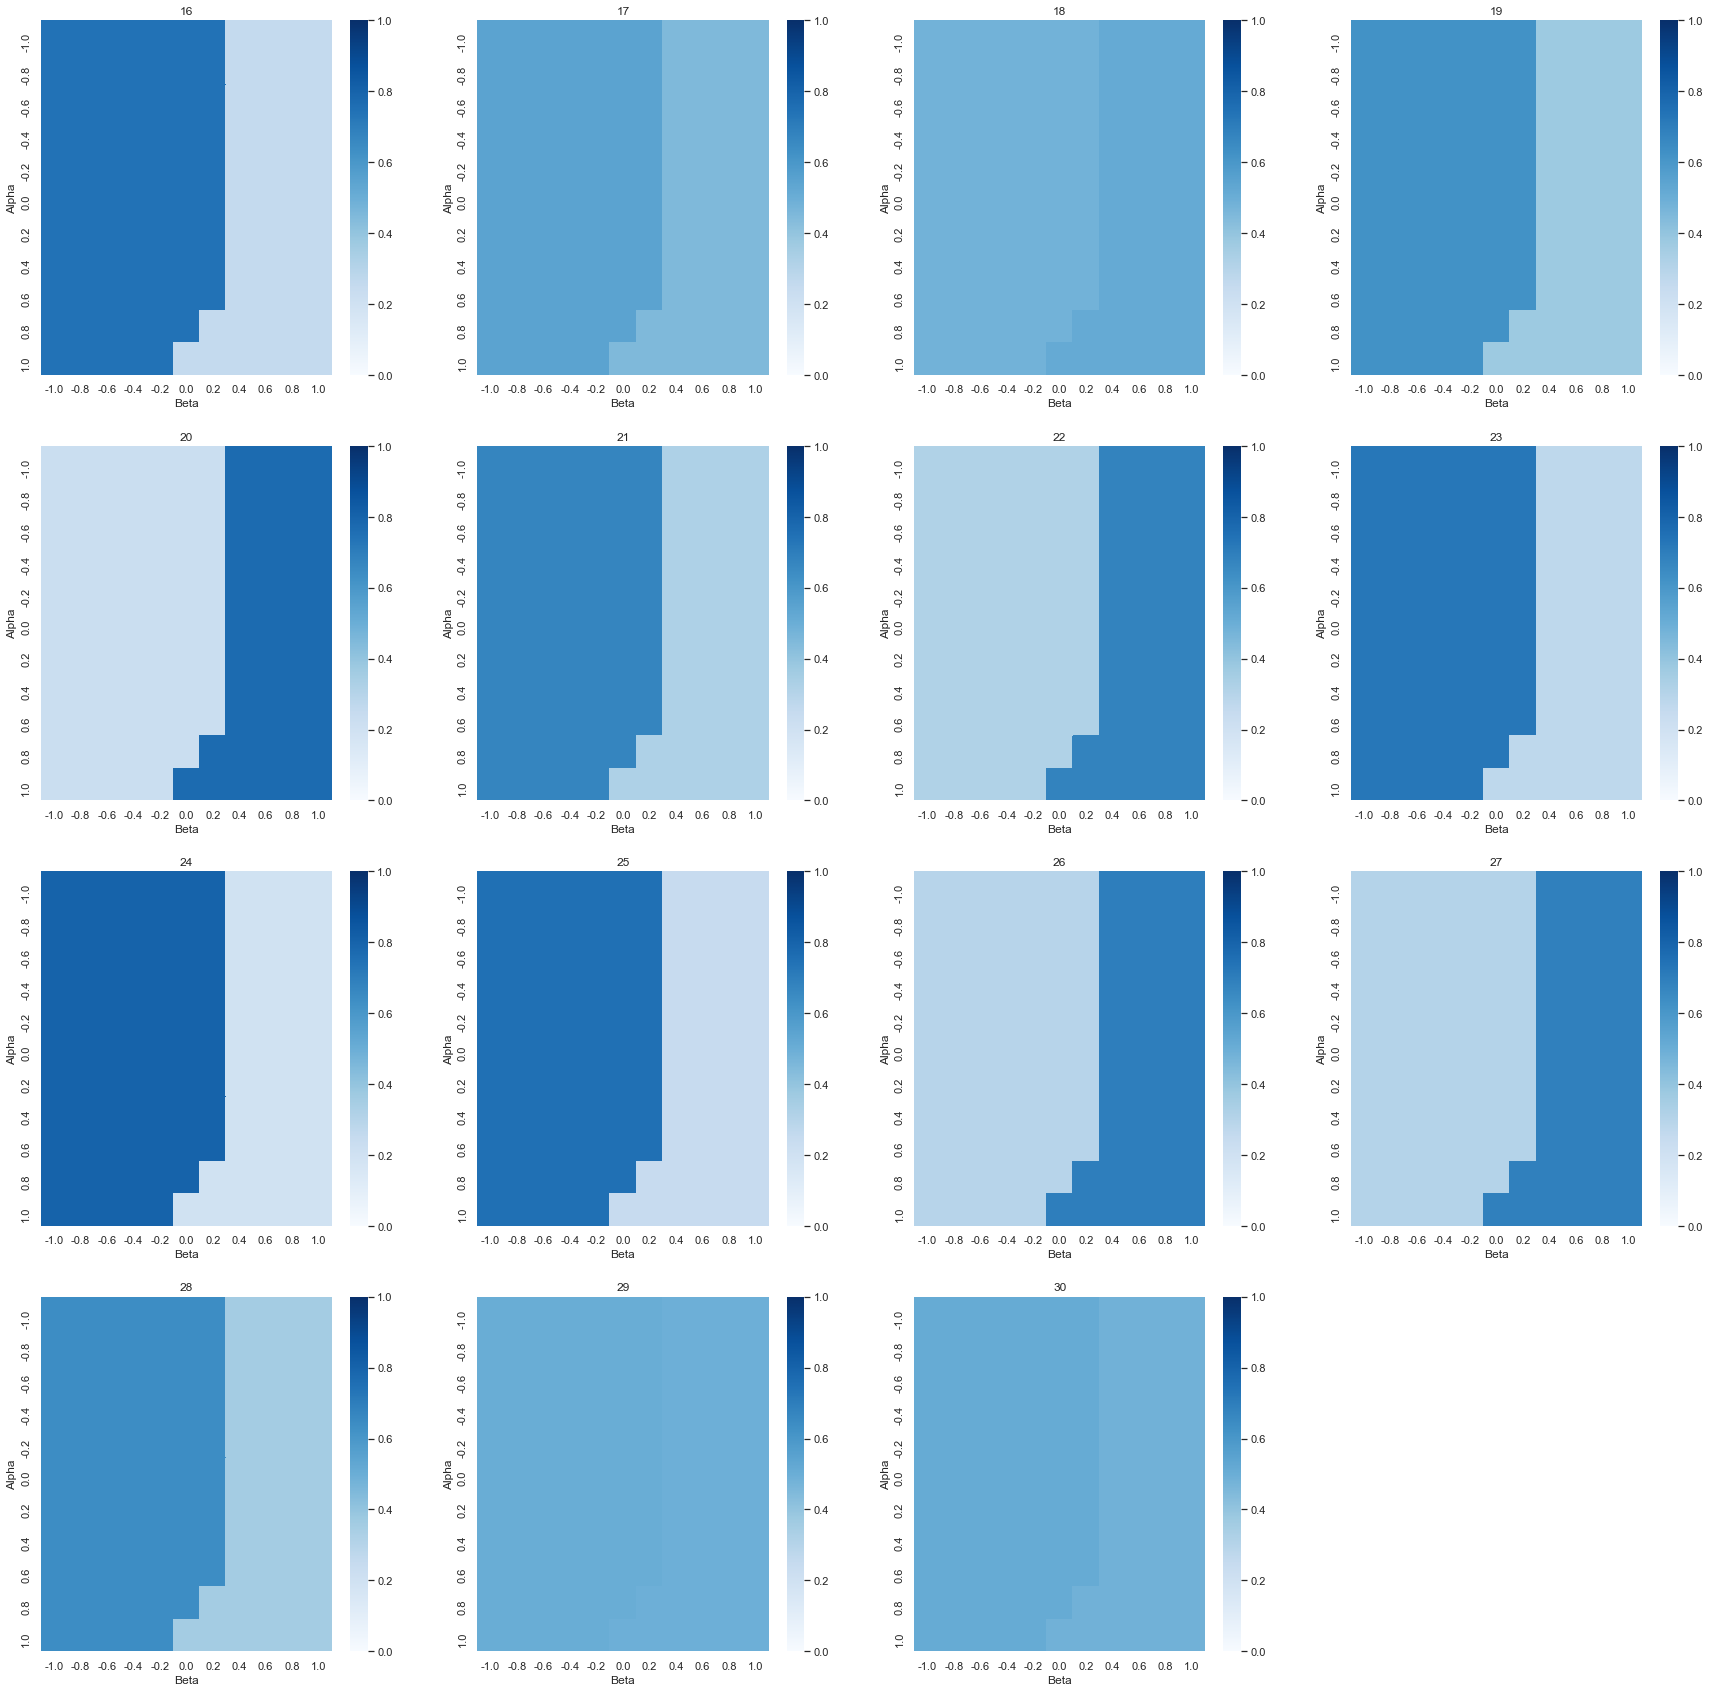

In [72]:
for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i+15)
    
plt.show()

In [73]:
# Making a dummy variable for the particiant type whose error is minimised in the left half of the heat map

freq_table['Is_lowtype'] = 1
freq_table.loc[2,  'Is_lowtype'] = 0
freq_table.loc[3,  'Is_lowtype'] = 0
freq_table.loc[4,  'Is_lowtype'] = 0
freq_table.loc[5,  'Is_lowtype'] = 0
freq_table.loc[6,  'Is_lowtype'] = 0
freq_table.loc[7,  'Is_lowtype'] = 0
freq_table.loc[13, 'Is_lowtype'] = 0
freq_table.loc[14, 'Is_lowtype'] = 0
freq_table.loc[16, 'Is_lowtype'] = 0
freq_table.loc[17, 'Is_lowtype'] = 0
freq_table.loc[19, 'Is_lowtype'] = 0
freq_table.loc[21, 'Is_lowtype'] = 0
freq_table.loc[23, 'Is_lowtype'] = 0
freq_table.loc[24, 'Is_lowtype'] = 0
freq_table.loc[25, 'Is_lowtype'] = 0
freq_table.loc[26, 'Is_lowtype'] = 0
freq_table.loc[29, 'Is_lowtype'] = 0
freq_table.loc[30, 'Is_lowtype'] = 0

In [74]:
freq_table['C_freq'] = 1-freq_table['D_freq']

In [75]:
# Chi square test for actions vs type of participant

exp1 = freq_table[freq_table['Is_lowtype']==1].sum()
exp2 = freq_table[freq_table['Is_lowtype']==0].sum()

cont_table = pd.DataFrame(index=['C', 'D'], columns=['LowType', 'HighType'], data=[[exp1[2], exp2[2]], [exp1[0], exp2[0]]])
    
# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Variables are dependent')
else:
    print('H0 holds true: Variables are independent')

p value is 0.4653912564243011
H0 holds true: Variables are independent


In [76]:
#Making parameters for regression

reg = pd.DataFrame(index=df2.index, columns=['subject', 'C_dummy', 'payoff', 'Is_lowtype', 'D_freq'])
reg['C_dummy'] = df2['decision']
reg[['subject', 'payoff']] = df2[['subject', 'payoff']]


for i in df2['subject'].unique():
    reg['Is_lowtype'][reg['subject']==i] = freq_table.loc[i, 'Is_lowtype']
    reg['D_freq'][reg['subject']==i] = freq_table.loc[i, 'D_freq']

In [77]:
# t-test to see how different are expected CR actions from observed actions
# low type plays D

def my_ttest(i): # ttest to check if cr expected matched observed
    x = 1-reg[reg['subject']==i]['Is_lowtype']
    y = df2[df2['subject']==i]['decision']
    t, p = ttest_ind(x, y)
    
    print('For subject ', i, ':')
    if p > 0.05:
        print('Reject Null hypothesis: the expected is significantly different from observed')
    else: print('Cannot reject Null hypothesis: observed matches expected')

In [78]:
for i in freq_table.index:
    my_ttest(i)

For subject  1 :
Cannot reject Null hypothesis: observed matches expected
For subject  2 :
Cannot reject Null hypothesis: observed matches expected
For subject  3 :
Cannot reject Null hypothesis: observed matches expected
For subject  4 :
Cannot reject Null hypothesis: observed matches expected
For subject  5 :
Cannot reject Null hypothesis: observed matches expected
For subject  6 :
Cannot reject Null hypothesis: observed matches expected
For subject  7 :
Cannot reject Null hypothesis: observed matches expected
For subject  8 :
Cannot reject Null hypothesis: observed matches expected
For subject  9 :
Cannot reject Null hypothesis: observed matches expected
For subject  10 :
Cannot reject Null hypothesis: observed matches expected
For subject  11 :
Cannot reject Null hypothesis: observed matches expected
For subject  12 :
Cannot reject Null hypothesis: observed matches expected
For subject  13 :
Cannot reject Null hypothesis: observed matches expected
For subject  14 :
Cannot reject Nu

In [79]:
reg.corr()

,subject,C_dummy,payoff
subject,1.000000,0.044944,0.031953
C_dummy,0.044944,1.000000,-0.075490
payoff,0.031953,-0.075490,1.000000


In [80]:
formula = 'C_dummy ~ payoff + Is_lowtype'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.661334
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 5138
Model:                          Logit   Df Residuals:                     5135
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.04569
Time:                        14:16:27   Log-Likelihood:                -3397.9
converged:                       True   LL-Null:                       -3560.6
Covariance Type:            nonrobust   LLR p-value:                 2.188e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4520      0.040     11.266      0.000       0.373       0.531
Is_lowtype[T.1]    -0.9940      0.059    -16.909      0.000      -1.109      -0.879
payoff             -0.0784      0.014     -5.508      0.000      -0.106      -0.050
===================================================================================
"""

In [81]:
formula = 'C_dummy ~ payoff + D_freq'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.635795
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 5138
Model:                          Logit   Df Residuals:                     5111
Method:                           MLE   Df Model:                           26
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.08255
Time:                        14:16:27   Log-Likelihood:                -3266.7
converged:                       True   LL-Null:                       -3560.6
Covariance Type:            nonrobust   LLR p-value:                2.029e-107
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.5036      0.234      6.430      0.000       1.045       1.962
D_freq[T.0.24786324786324787]    -0.3149      0.317     -0.994      0.320      -0.936       0.306
D_freq[T.0.25654450261780104]    -0.3783      0.286     -1.322      0.186      -0.939       0.183
D_freq[T.0.27350427350427353]    -0.4300      0.312     -1.377      0.168      -1.042       0.182
D_freq[T.0.32460732984293195]    -0.6887      0.280     -2.461      0.014      -1.237      -0.140
D_freq[T.0.358974358974359]      -0.8247      0.303     -2.724      0.006      -1.418      -0.231
D_freq[T.0.3769633507853403]     -0.9287      0.277     -3.352      0.001      -1.472      -0.386
D_freq[T.0.4031413612565445]     -1.0127      0.276     -3.669      0.000      -1.554      -0.472
D_freq[T.0.4083769633507853]     -1.0664      0.276     -3.865      0.000      -1.607      -0.526
D_freq[T.0.42408376963350786]    -1.1159      0.255     -4.374      0.000      -1.616      -0.616
D_freq[T.0.450261780104712]      -1.2410      0.248     -5.006      0.000      -1.727      -0.755
D_freq[T.0.4712041884816754]     -1.3135      0.275     -4.781      0.000      -1.852      -0.775
D_freq[T.0.4816753926701571]     -1.3460      0.275     -4.902      0.000      -1.884      -0.808
D_freq[T.0.48717948717948717]    -1.3724      0.298     -4.607      0.000      -1.956      -0.789
D_freq[T.0.49572649572649574]    -1.3948      0.298     -4.684      0.000      -1.978      -0.811
D_freq[T.0.518324607329843]      -1.5136      0.255     -5.941      0.000      -2.013      -1.014
D_freq[T.0.5706806282722513]     -1.7330      0.275     -6.291      0.000      -2.273      -1.193
D_freq[T.0.6073298429319371]     -1.8805      0.277     -6.801      0.000      -2.422      -1.339
D_freq[T.0.6596858638743456]     -2.0852      0.279     -7.476      0.000      -2.632      -1.539
D_freq[T.0.680628272251309]      -2.1627      0.280     -7.719      0.000      -2.712      -1.614
D_freq[T.0.6923076923076923]     -2.2345      0.308     -7.262      0.000      -2.838      -1.631
D_freq[T.0.7008547008547008]     -2.2547      0.309     -7.305      0.000      -2.860      -1.650
D_freq[T.0.7382198952879581]     -2.4725      0.286     -8.655      0.000      -3.032      -1.913
D_freq[T.0.7696335078534031]     -2.6319      0.290     -9.081      0.000      -3.200      -2.064
D_freq[T.0.7801047120418848]     -2.6979      0.292     -9.254      0.000      -3.269      -2.126
D_freq[T.0.8010471204188482]     -2.8222      0.295     -9.551      0.000      -3.401      -2.243
payoff                           -0.0776      0.015     -5.296      0.000      -0.106      -0.049
=================================================================================================
"""

In [82]:
formula = 'C_dummy ~ payoff + D_freq + Is_lowtype'
log_reg = smf.logit(formula, data=reg).fit()
log_reg.summary()

         Current function value: 0.635795
         Iterations: 35


C:\Users\1412r\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                C_dummy   No. Observations:                 5138
Model:                          Logit   Df Residuals:                     5110
Method:                           MLE   Df Model:                           27
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.08255
Time:                        14:16:27   Log-Likelihood:                -3266.7
converged:                      False   LL-Null:                       -3560.6
Covariance Type:            nonrobust   LLR p-value:                9.756e-107
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.5036      0.234      6.430      0.000       1.045       1.962
D_freq[T.0.24786324786324787]    -0.3149      0.317     -0.994      0.320      -0.936       0.306
D_freq[T.0.25654450261780104]    -0.3783      0.286     -1.322      0.186      -0.939       0.183
D_freq[T.0.27350427350427353]    -0.4300      0.312     -1.377      0.168      -1.042       0.182
D_freq[T.0.32460732984293195]    -0.6887      0.280     -2.461      0.014      -1.237      -0.140
D_freq[T.0.358974358974359]       1.0969   1.53e+06   7.16e-07      1.000      -3e+06       3e+06
D_freq[T.0.3769633507853403]     -0.9287      0.277     -3.352      0.001      -1.472      -0.386
D_freq[T.0.4031413612565445]     -1.0127      0.276     -3.669      0.000      -1.554      -0.472
D_freq[T.0.4083769633507853]     -1.0664      0.276     -3.865      0.000      -1.607      -0.526
D_freq[T.0.42408376963350786]    -1.1159      0.255     -4.374      0.000      -1.616      -0.616
D_freq[T.0.450261780104712]      -1.2410      0.248     -5.006      0.000      -1.727      -0.755
D_freq[T.0.4712041884816754]     -1.3135      0.275     -4.781      0.000      -1.852      -0.775
D_freq[T.0.4816753926701571]     -1.3460      0.275     -4.902      0.000      -1.884      -0.808
D_freq[T.0.48717948717948717]    -1.3724      0.298     -4.607      0.000      -1.956      -0.789
D_freq[T.0.49572649572649574]    -1.3948      0.298     -4.684      0.000      -1.978      -0.811
D_freq[T.0.518324607329843]       0.4079   1.53e+06   2.66e-07      1.000      -3e+06       3e+06
D_freq[T.0.5706806282722513]      0.1885   1.53e+06   1.23e-07      1.000      -3e+06       3e+06
D_freq[T.0.6073298429319371]      0.0410   1.53e+06   2.68e-08      1.000      -3e+06       3e+06
D_freq[T.0.6596858638743456]     -0.1636   1.53e+06  -1.07e-07      1.000      -3e+06       3e+06
D_freq[T.0.680628272251309]      -0.2412   1.53e+06  -1.57e-07      1.000      -3e+06       3e+06
D_freq[T.0.6923076923076923]     -0.3129   1.53e+06  -2.04e-07      1.000      -3e+06       3e+06
D_freq[T.0.7008547008547008]     -2.2547      0.309     -7.305      0.000      -2.860      -1.650
D_freq[T.0.7382198952879581]     -0.5509   1.53e+06  -3.59e-07      1.000      -3e+06       3e+06
D_freq[T.0.7696335078534031]     -0.7104   1.53e+06  -4.63e-07      1.000      -3e+06       3e+06
D_freq[T.0.7801047120418848]     -0.7764   1.53e+06  -5.06e-07      1.000      -3e+06       3e+06
D_freq[T.0.8010471204188482]     -0.9006   1.53e+06  -5.88e-07      1.000      -3e+06       3e+06
Is_lowtype[T.1]                  -1.9216   1.53e+06  -1.25e-06      1.000      -3e+06       3e+06
payoff                           -0.0776      0.015     -5.296      0.000      -0.106      -0.049
=================================================================================================
"""

# bc = 2.5

Subjects 1-26 only present (see table)

In [83]:
df3 = df[df['bc']==2.5]
print('The shape of df3 is', df3.shape)
print('Number of rows check out as per the previous table')

The shape of df3 is (5882, 13)
Number of rows check out as per the previous table


In [84]:
df3['decision_opp']=0
df3['decision_opp'].loc[(df3['payoff']==3)] = 1
df3['decision_opp'].loc[(df3['payoff']==5)] = 1

### Graphs

In [85]:
# PLayer wise frequency of action C

freq_table = pd.DataFrame(index=df3['subject'].unique(), columns=['D_freq', 'C_freq', 'CC_freq', 'DD_freq', 'CD_freq'])

for i in df3['subject'].unique():
    freq_table.loc[i, 'D_freq']  = sum((df3['decision']==0)&(df3['subject']==i))/sum(df3['subject']==i)
    freq_table.loc[i, 'C_freq']  = sum((df3['decision']==1)&(df3['subject']==i))/sum(df3['subject']==i)
    freq_table.loc[i, 'CC_freq'] = sum((df3['decision']==1)&(df3['decision_opp']==1)&(df3['subject']==i))/sum(df3['subject']==i)
    freq_table.loc[i, 'DD_freq'] = sum((df3['decision']==0)&(df3['decision_opp']==0)&(df3['subject']==i))/sum(df3['subject']==i)
    freq_table.loc[i, 'CD_freq'] = sum((df3['decision']==1)&(df3['decision_opp']==0)&(df3['subject']==i))/sum(df3['subject']==i)

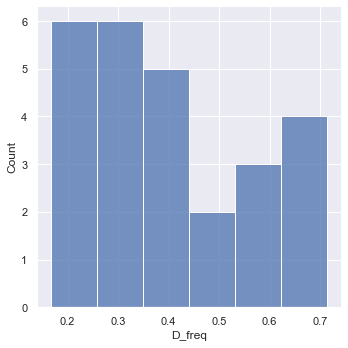

In [86]:
# Histogram of frequency of players playing C
ax = sns.displot(data=freq_table, x=freq_table['D_freq'])

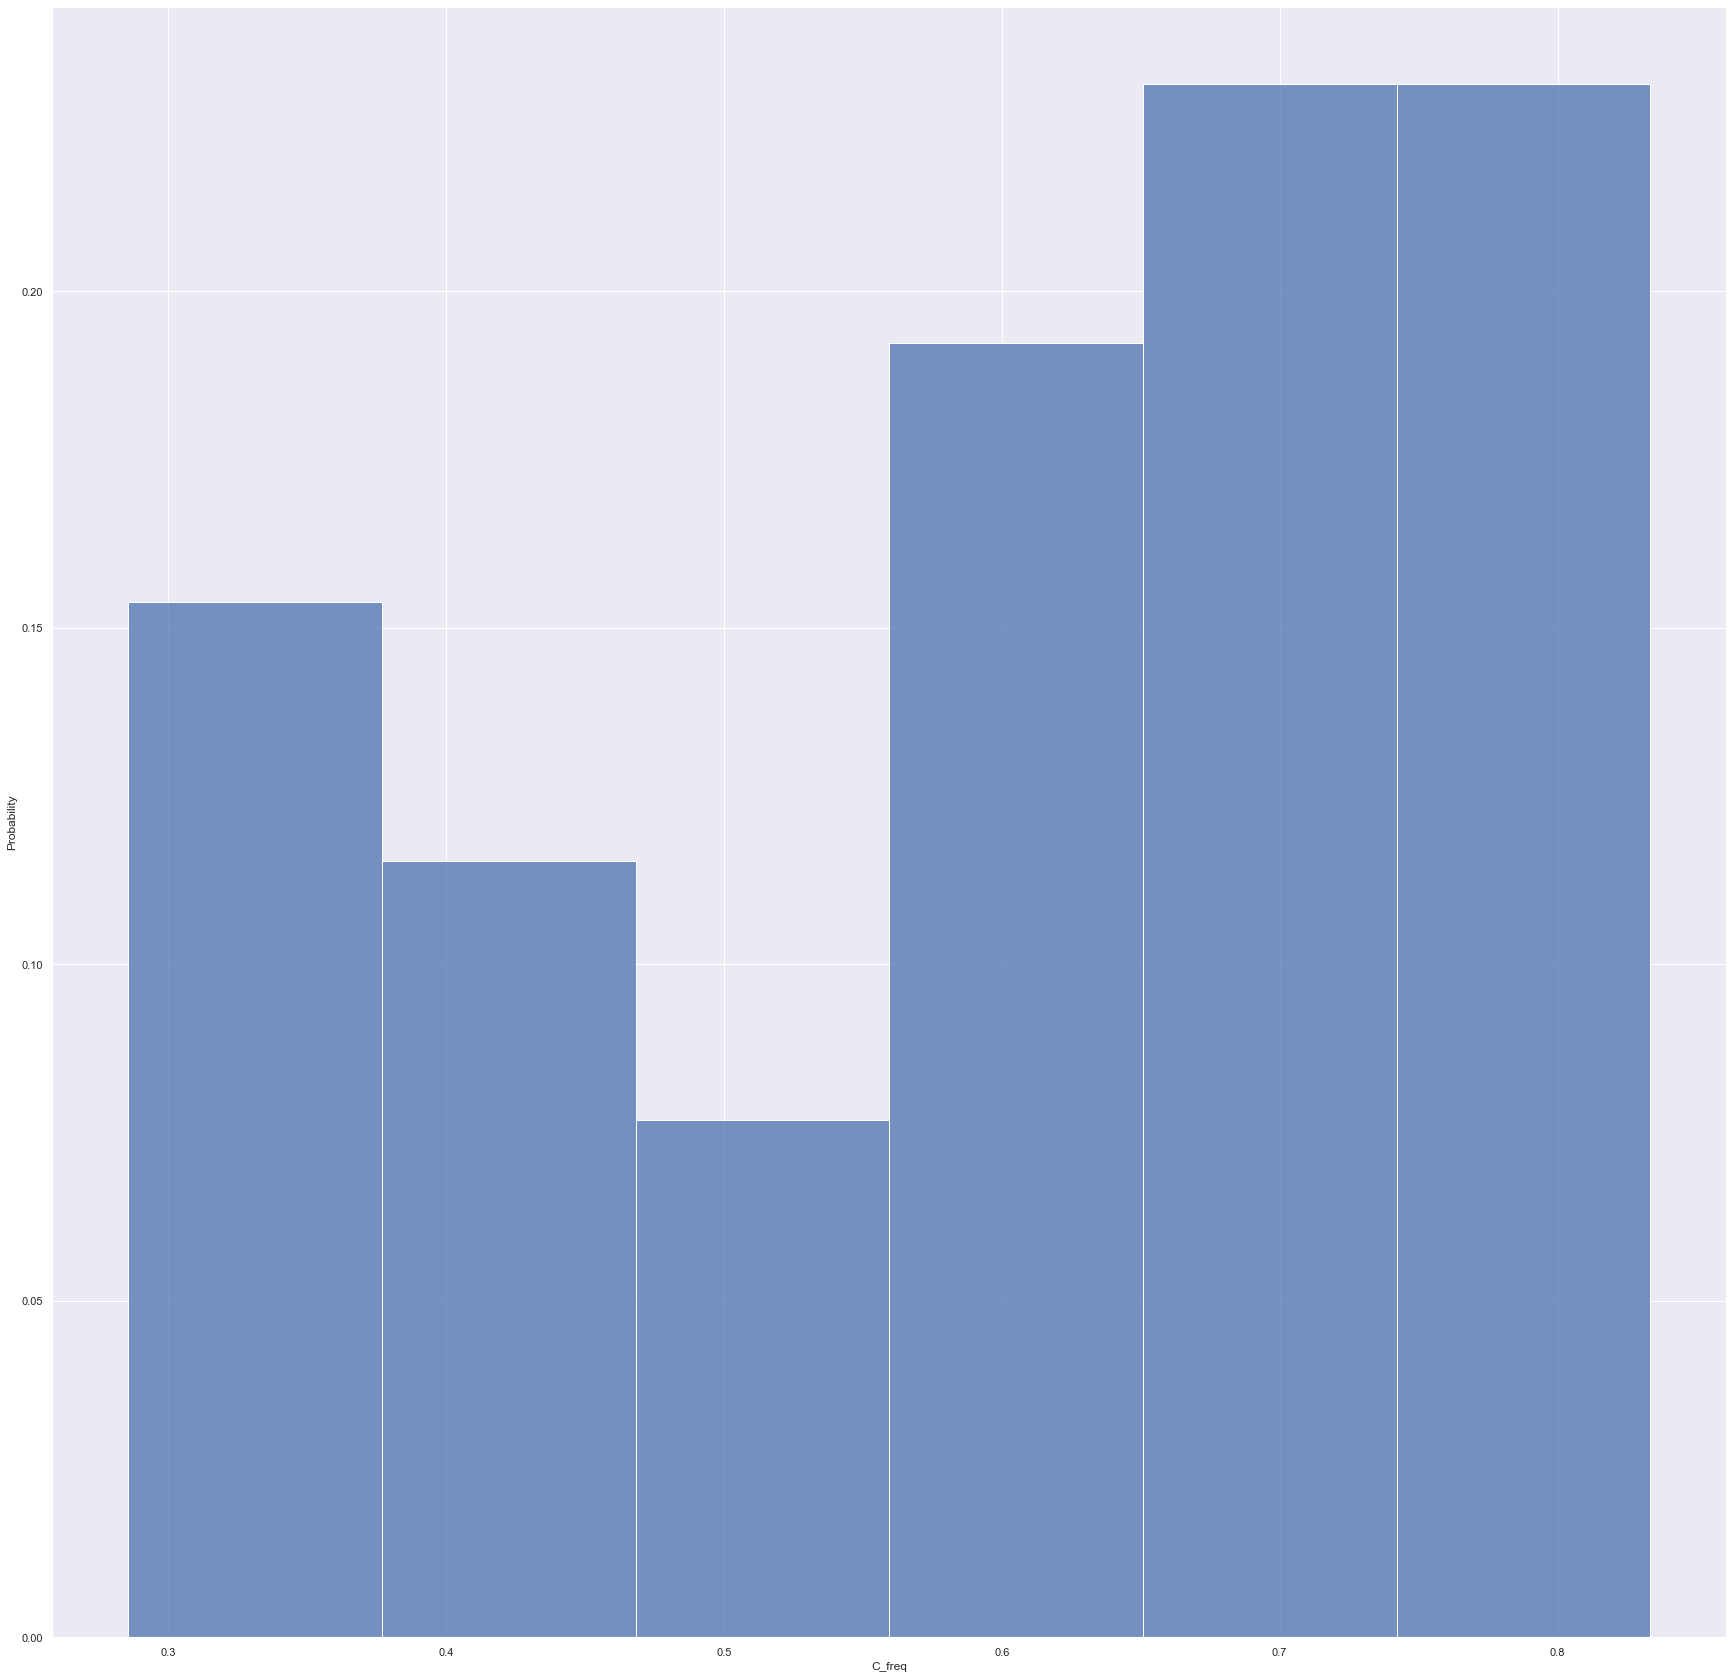

In [87]:
# Histogram of frequency of players playing C
ax = sns.histplot(data=freq_table, x=freq_table['C_freq'], stat='probability')

<AxesSubplot:xlabel='CC_freq', ylabel='Probability'>

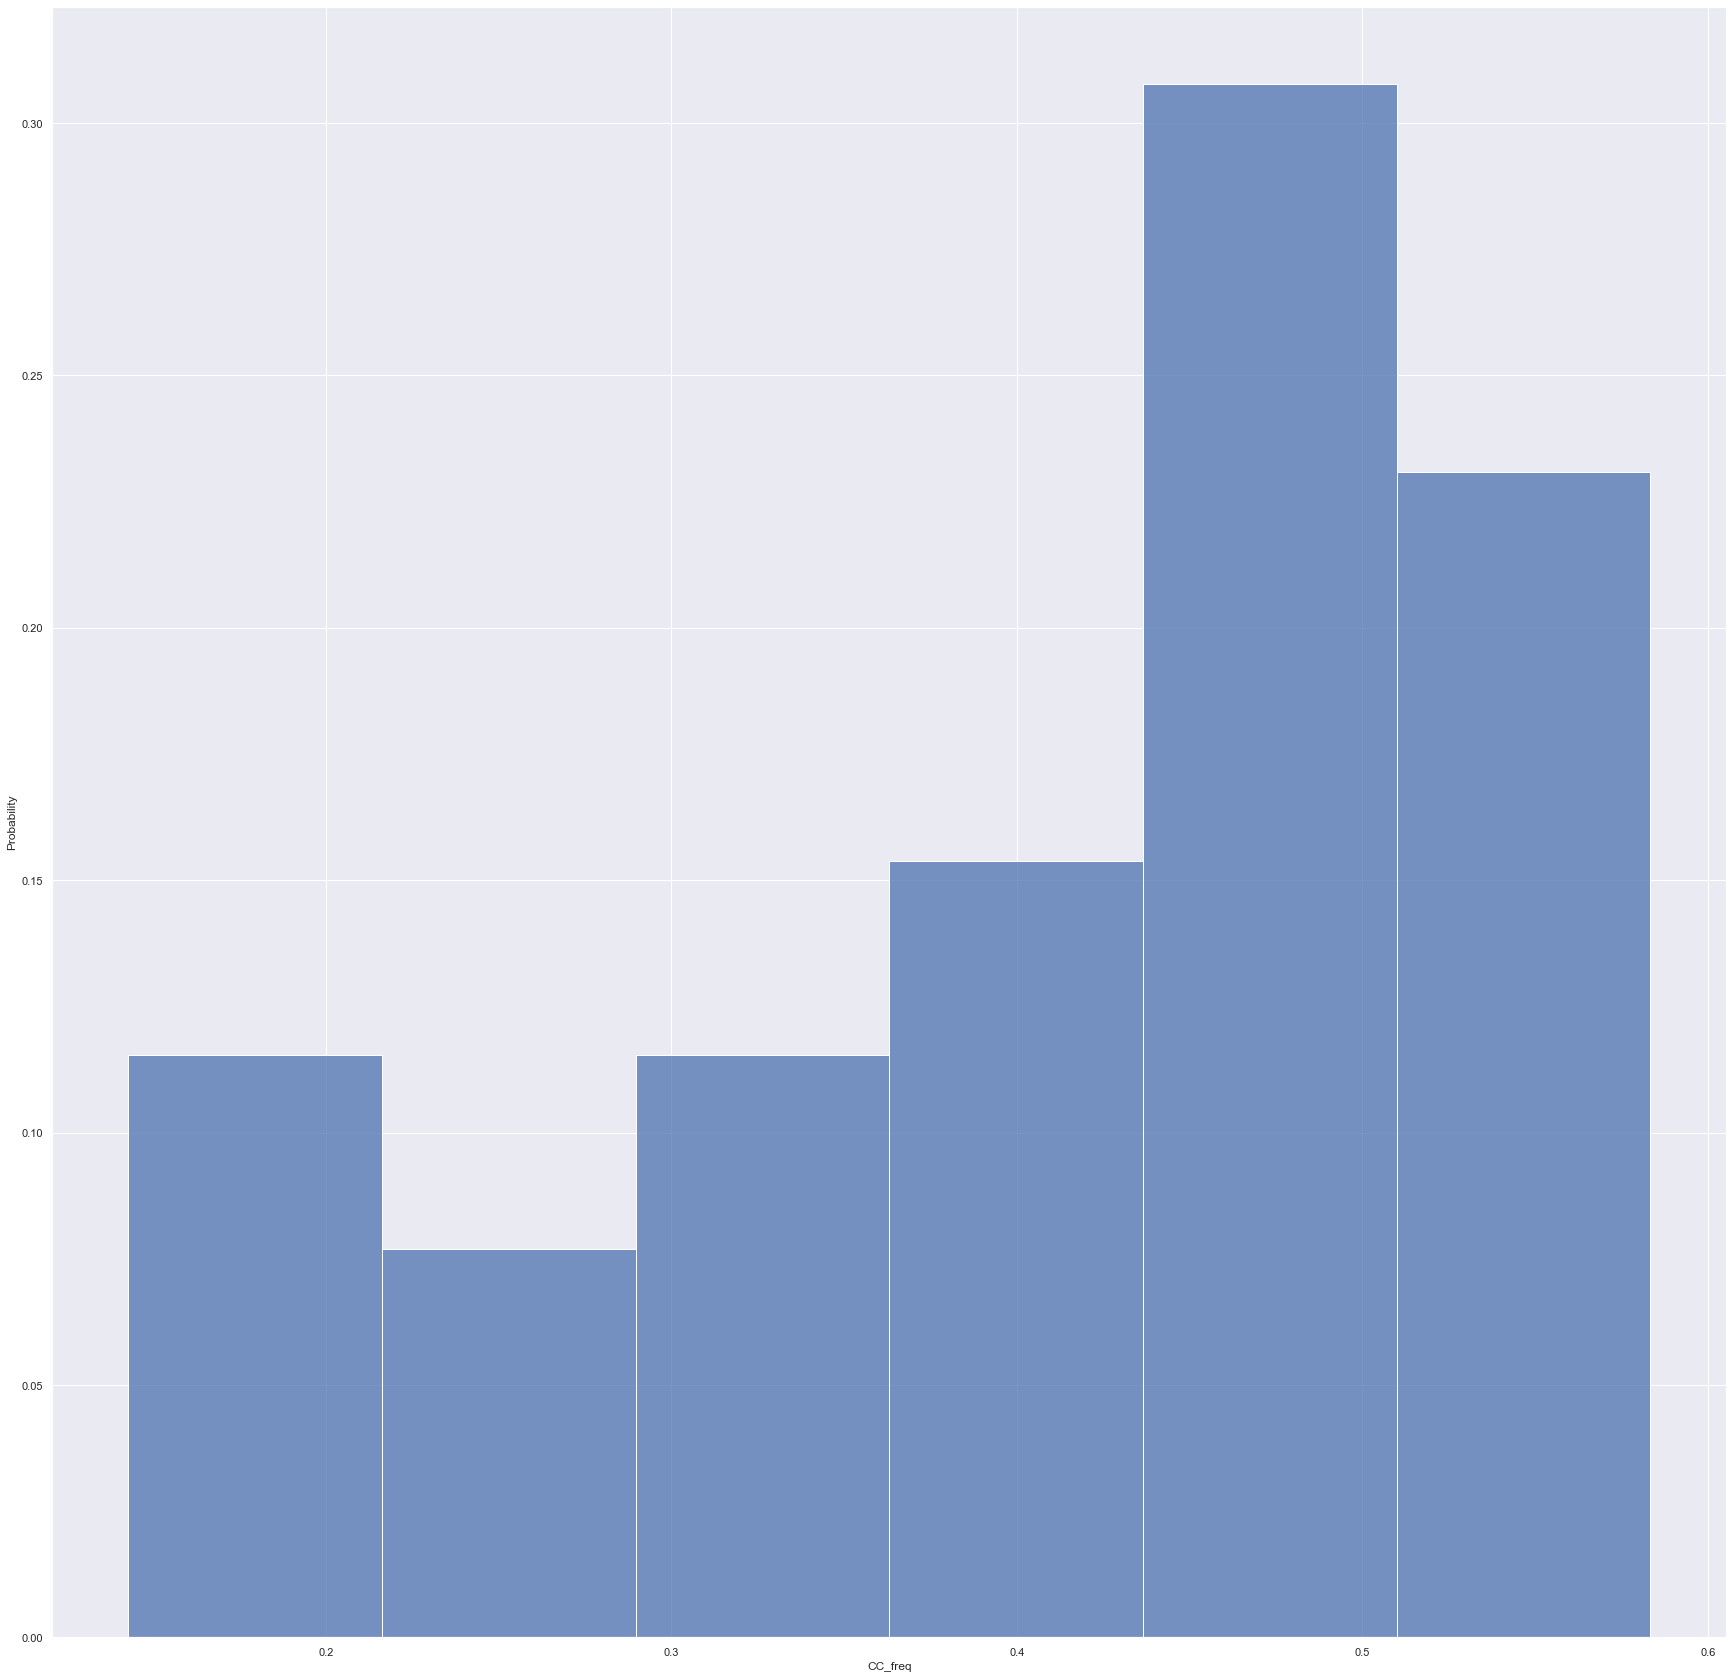

In [88]:
# Histogram of frequency of the outcome (C, C)
sns.histplot(x=freq_table['CC_freq'], stat='probability')

<AxesSubplot:xlabel='DD_freq', ylabel='Probability'>

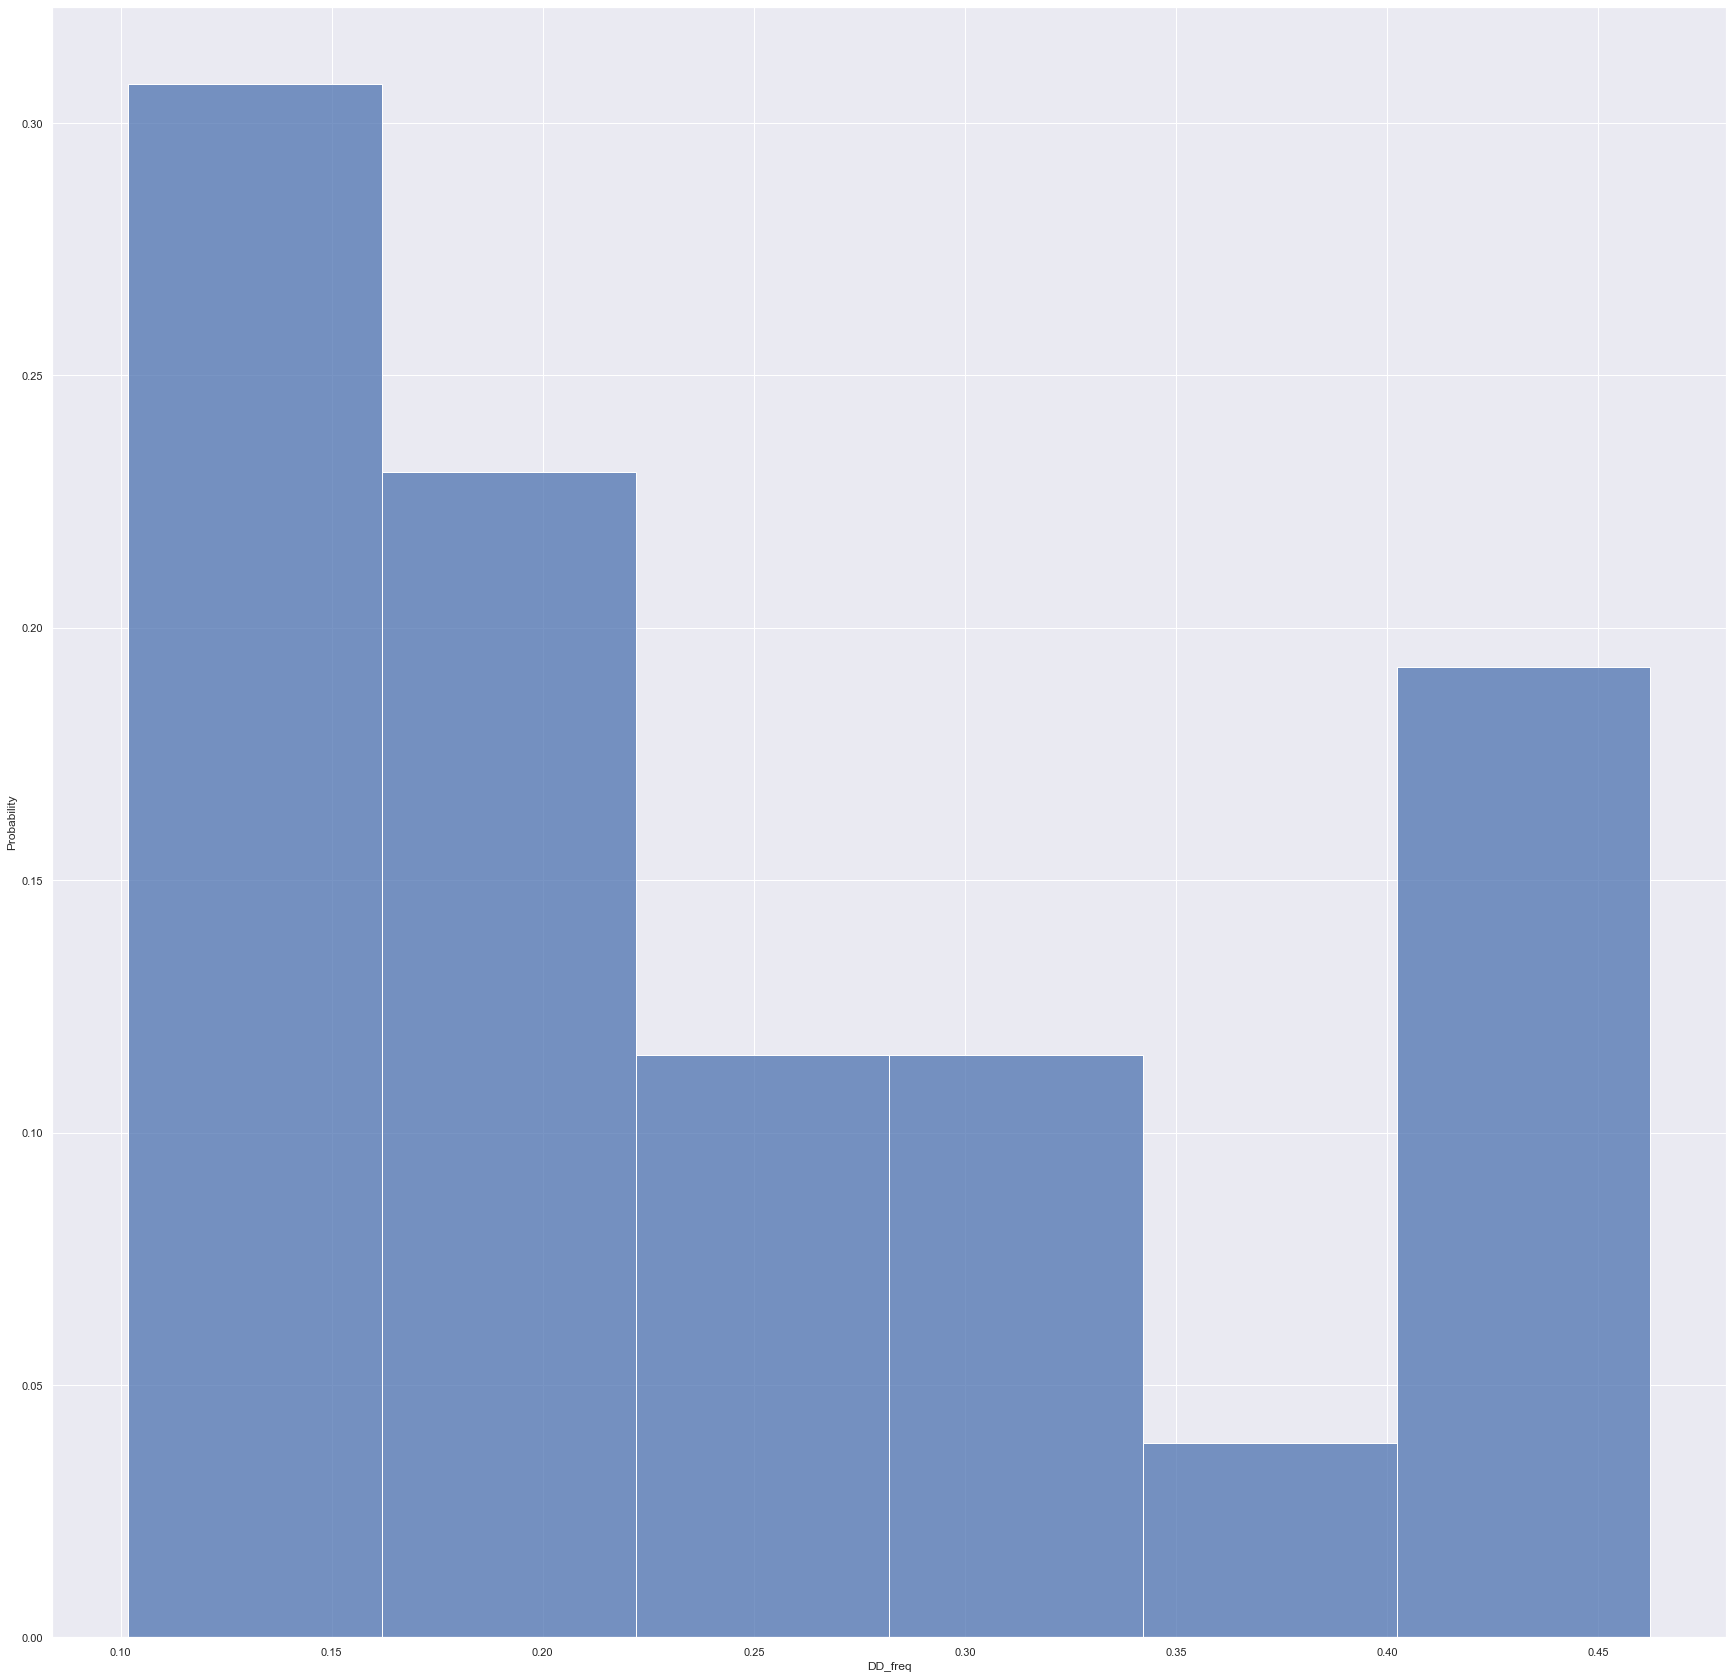

In [89]:
# Histogram of frequency of the outcome (D, D)
sns.histplot(x=freq_table['DD_freq'], stat='probability')

<AxesSubplot:xlabel='CD_freq', ylabel='Probability'>

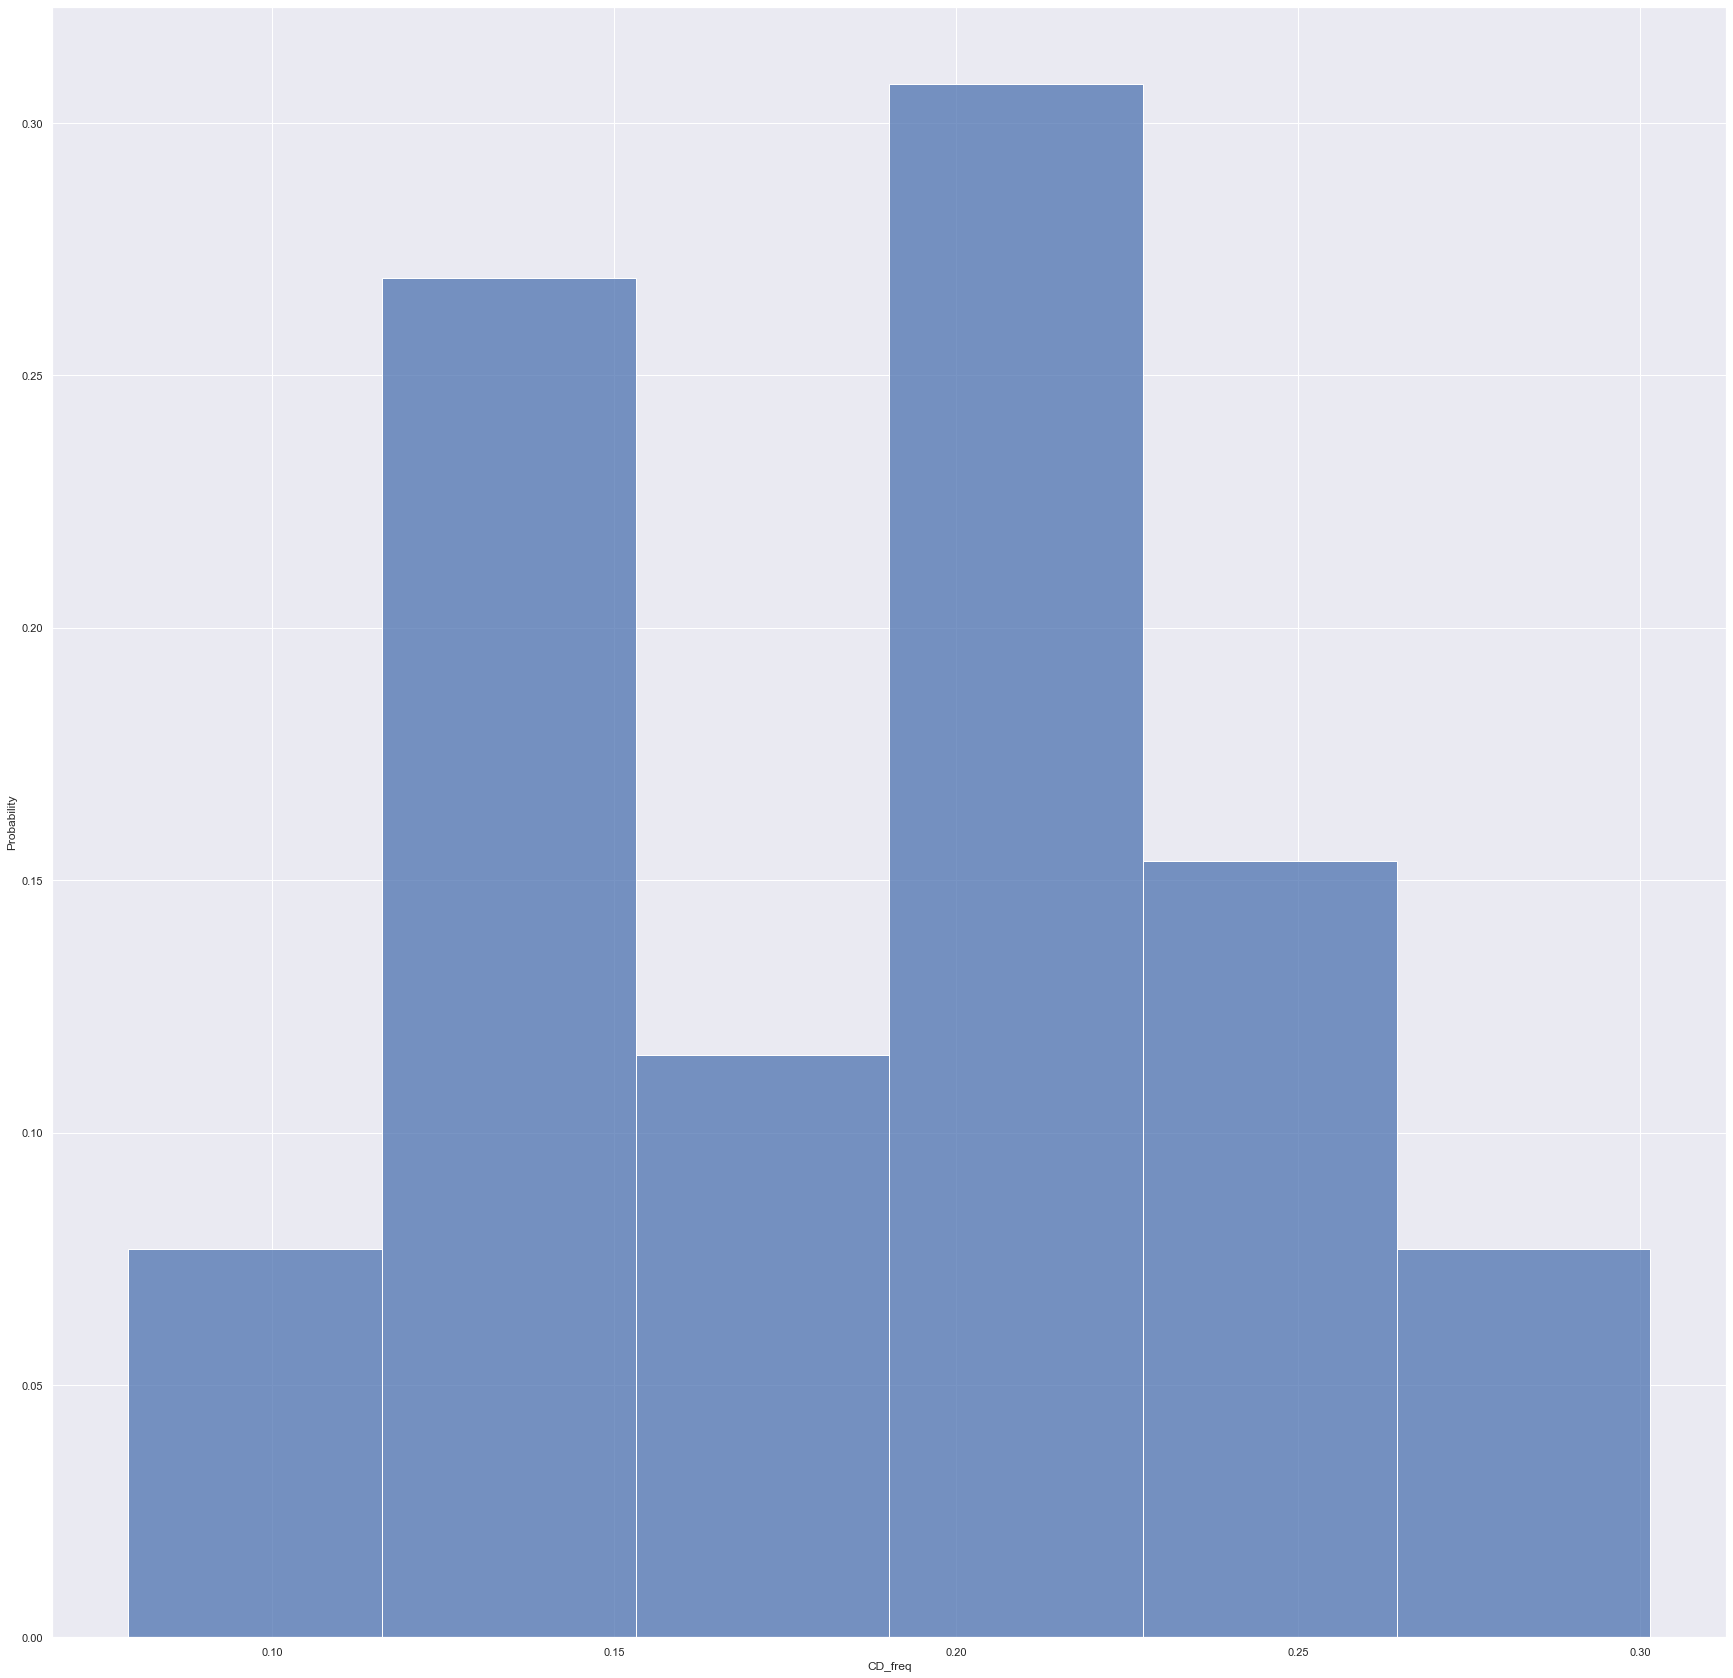

In [90]:
# Histogram of frequency of the outcome (C, D)
sns.histplot(x=freq_table['CD_freq'], stat='probability')

In [91]:
print(sum(freq_table['C_freq']<0.5)/26)
print(sum(freq_table['C_freq']==1))
print(sum(freq_table['C_freq']==0))
print(df2['payoff'].mean())

0.3076923076923077
0
0
0.982483456597898


In [92]:
# Subject wise distribution of action C

def make_freqplot(i):
    stop = sum(df3['subject']==i)+1
    temp = df3[df3['subject']==i]['decision']
    temp = 1-temp
    temp = (temp.cumsum())/range(1, stop)
    
    sns.lineplot(x=range(len(temp)), y=temp).set(ylabel='Probability of choosing D', xlabel=i)

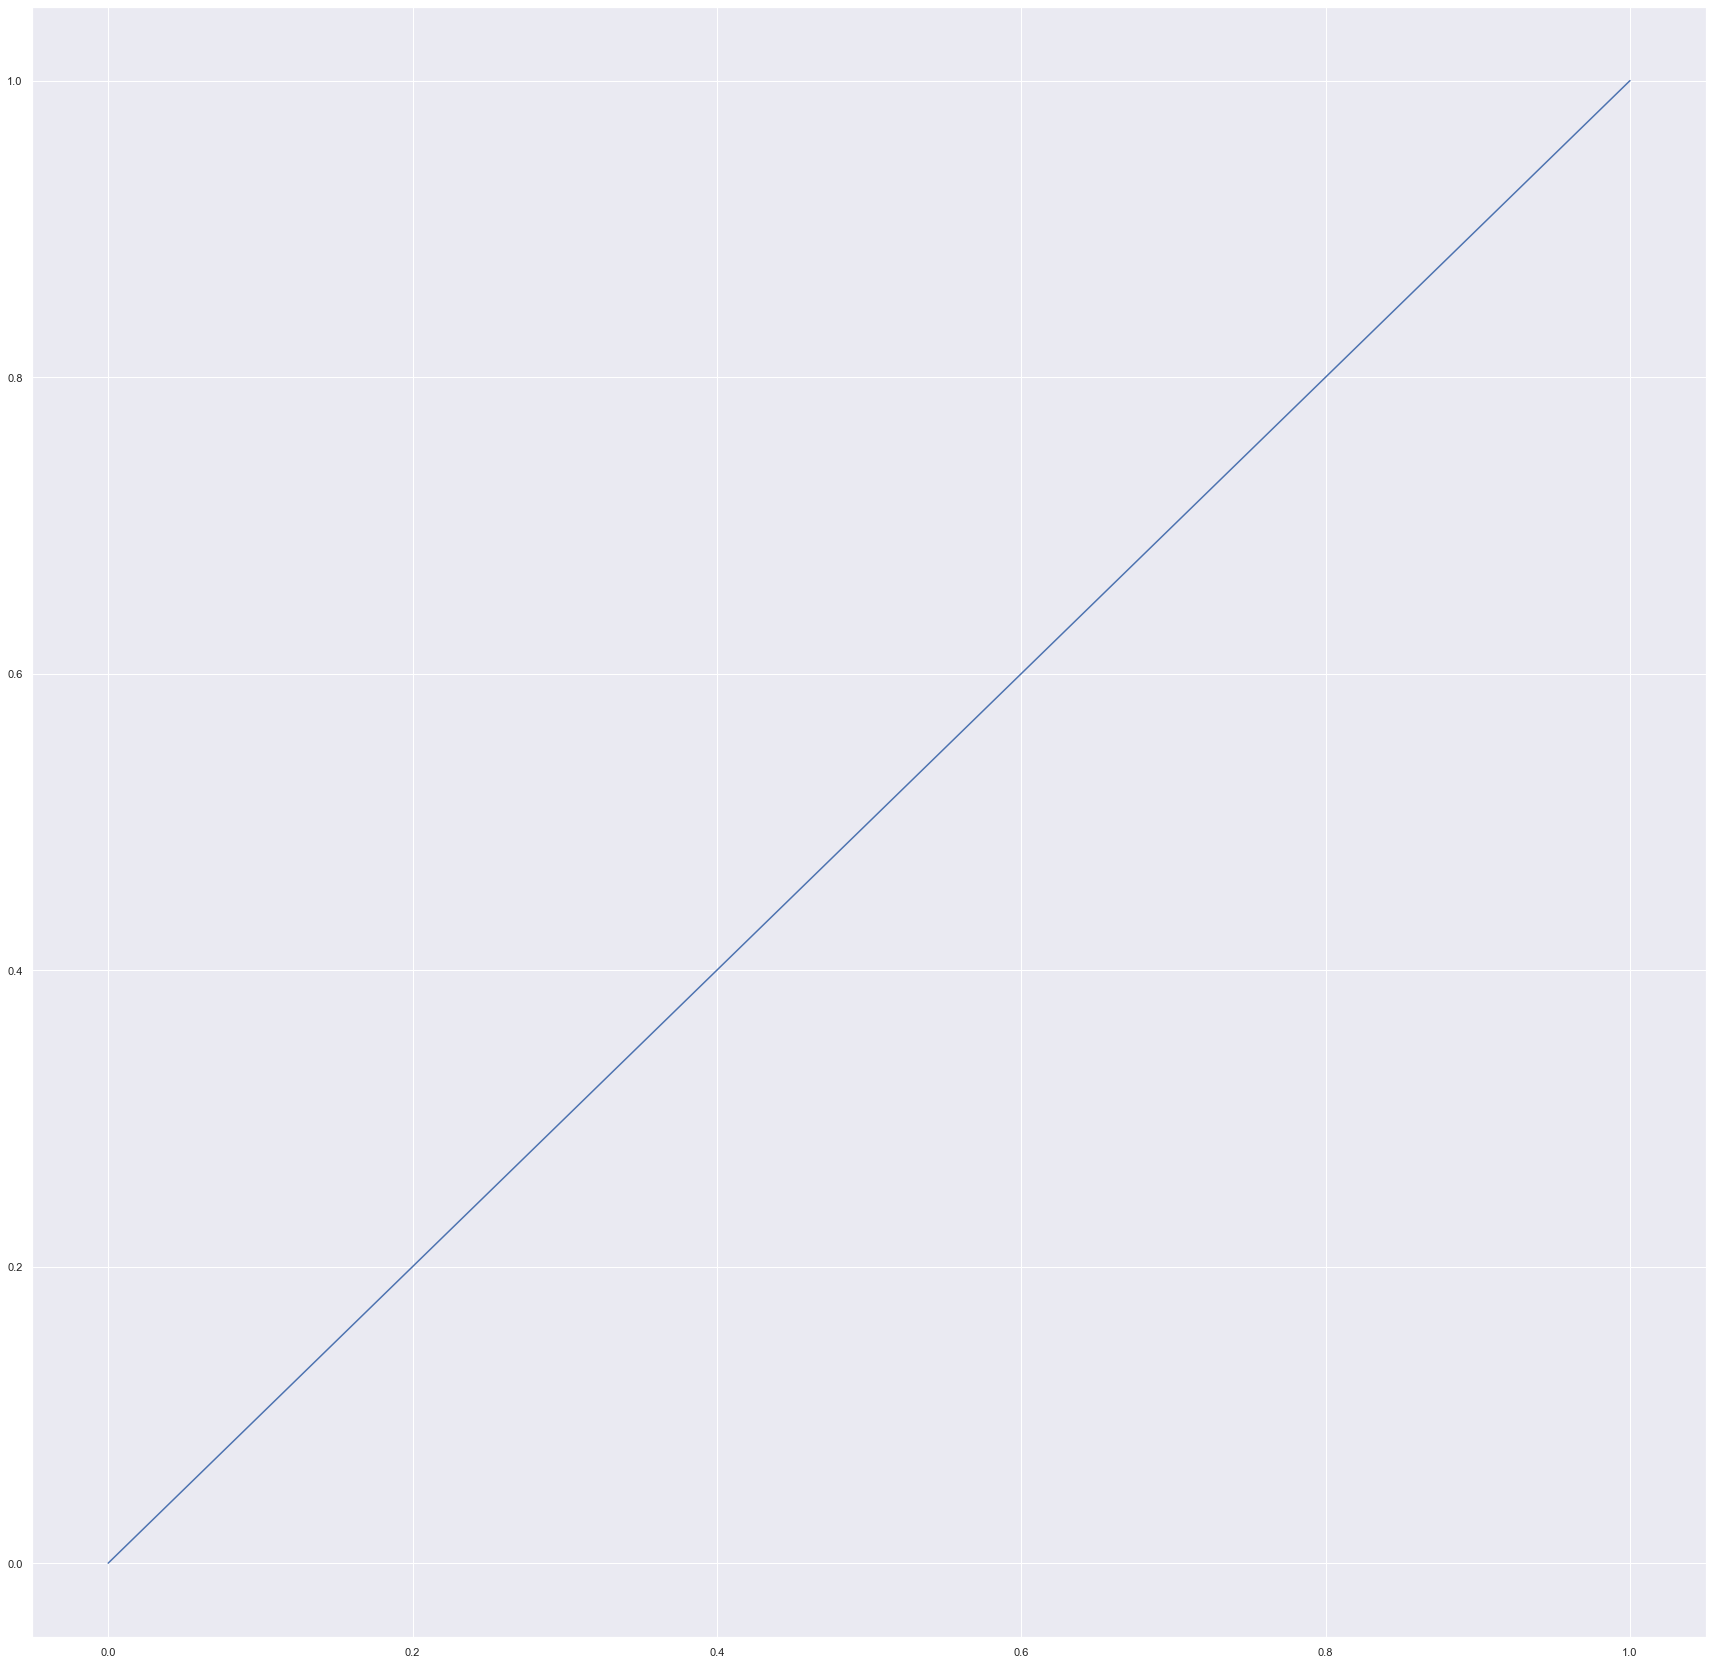

In [93]:
# Dummy graph to set the axis in the subsequent graphs
ax=sns.lineplot(x=np.linspace(0, 1, 100, endpoint=True), y=np.linspace(0, 1, 100, endpoint=True))

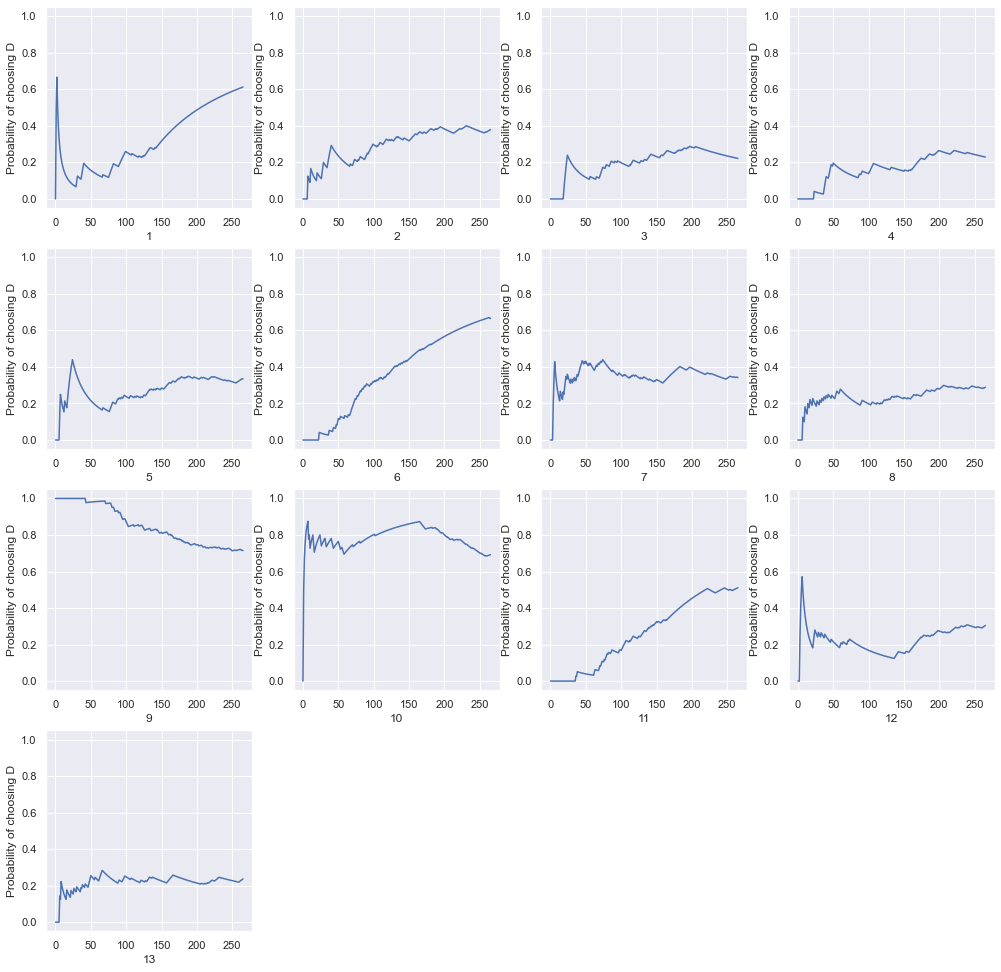

In [94]:
count = 1
no_of_cols = 4
no_of_rows = 4
players = np.array_split((df3['subject'].unique()), 2)

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 1-15')

for i in players[0]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

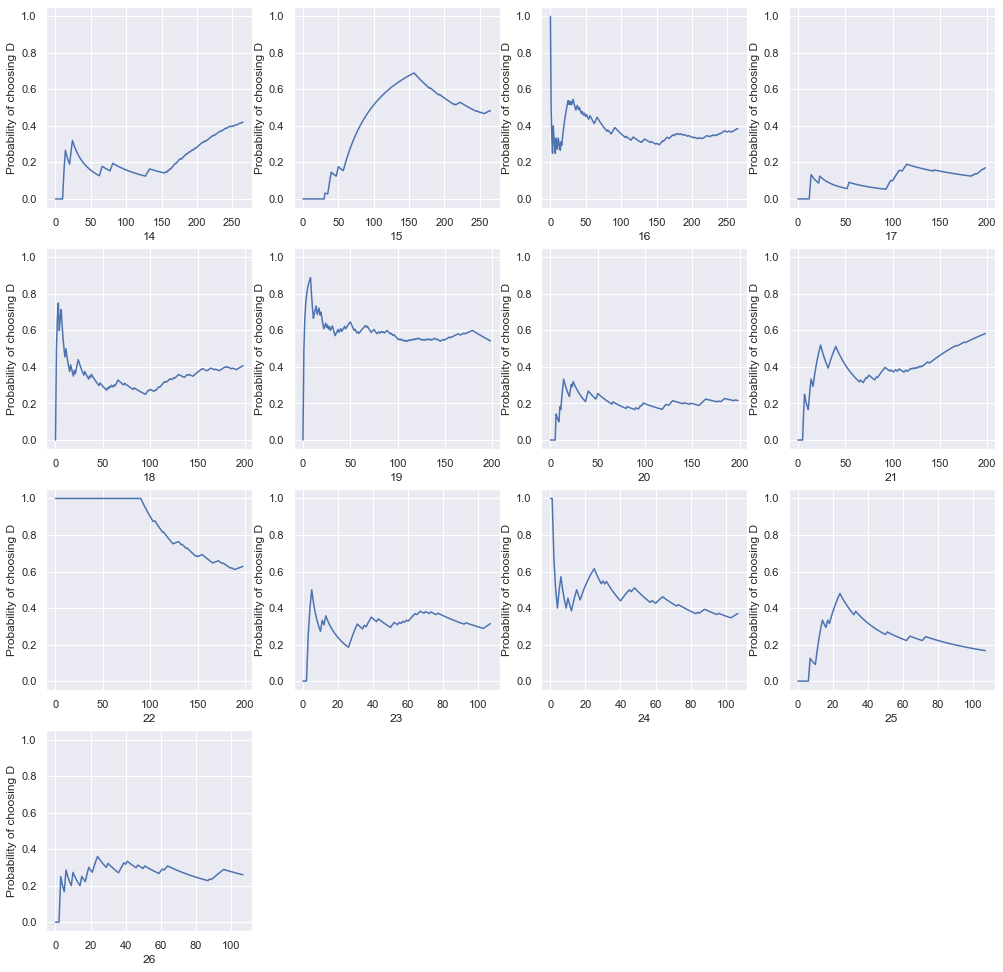

In [95]:
count = 1

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 16-30')

for i in players[1]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

## CR Utility

In [96]:
# Create empty dataframes
action3 = pd.DataFrame(index=df3.index, columns=col)    # utility matrix
error3  = pd.DataFrame(index=df3.index, columns=col)    # error matrix

In [97]:
# Action Grid: 1 for beta >= 2/7 and 0 for beta < 2/7 except when alpha + beta >= 1 (no equality in 11 steps' case)

for i in range(len(col)):
    beta = float(col[i][1]) # convert beta (from column name) from string to float
    if beta >= 2/7:
        action3.iloc[:, i] = 1
    if beta < 2/7:
        alpha = float(col[i][0])
        if (alpha+beta >= 1):
            action3.iloc[:, i] = 1
        if (alpha+beta < 1):
            action3.iloc[:, i] = 0
        
#action3.head()

In [98]:
# Calculating error matrix

for x in col:
    error3[x] = action3[x]==df3['decision']
    
error3 = 1 - error3 # Converting to ones and zeros from trues and falses
error3['subject'] = df3['subject'] # Adding player column for easier future calculations

#error3.head()

In [99]:
# Calculate average error for each participant

data = []

for i in df3['subject'].unique():
    sum_of_error     = (error3[error3['subject']==i].iloc[:,:-1]).sum() # summing over error rows where player == i and taking every column except the last (which is the name column) using iloc
    number_of_trials = (df3['subject']==i).sum()
    data             = data + [sum_of_error/number_of_trials]
    
avg_error3 = pd.DataFrame(data=data)

#avg_error3.head()

In [100]:
# Minimise error

min_error3 = avg_error3.idxmin(axis=1) # gives the first pair where minimum error occurs
#min_error3

In [101]:
# Find indices with minimum error

s = avg_error3.eq(avg_error3.min(axis=1), axis=0) # dataframe of boolean wherever min occurs
min_error_indices3 = s.agg(lambda s: s.index[s].values, axis=1) # row wise aggregating indices of columns where true occurs
#min_error_indices3

In [102]:
# Creating a dataframe of alphas and betas which give minimum error, for every player

min_param3 = pd.DataFrame(min_error_indices3[0].tolist(), columns=['alpha', 'beta'])
min_param3['subject'] = 0

for i in min_error_indices3.index:
    if i == min_error_indices3.index.stop-1:
        break
    temp_df = pd.DataFrame(min_error_indices3[i+1].tolist(), columns=['alpha', 'beta'])
    temp_df['subject'] = i+1
    min_param3 = pd.concat([min_param3, temp_df])
    
min_param3.index = range(len(min_param3))

#min_param3

In [103]:
# Find player wise average alpha and beta

min_param3['alpha'] = min_param3['alpha'].astype(float) # conevrting type from string to float
min_param3['beta']  = min_param3['beta'].astype(float)   # conevrting type from string to float

final3 = min_param3.groupby(by=['subject']).mean() # grouping by mean wrt player

### Heatmaps

In [104]:
# Function to make heatmaps

def make_heatmap(player_no):
    temp_player = pd.DataFrame(index=alpha_range, columns=beta_range) # Creating empty dataset
    
    # Creating table to make heatmap
    for i in range(len(col)): 
        alpha = float(col[i][0])
        beta  = float(col[i][1])
        temp_player.loc[alpha, beta] = avg_error3[col[i]][player_no]
    temp_player = temp_player.astype(float)
    
    # Creating heatmap
    sns.set(rc = {'figure.figsize':(30,30)})
    sns.heatmap(data=temp_player, cmap="Blues", 
                      vmin=0, vmax=1, xticklabels=np.round(beta_range, decimals=2), yticklabels=np.round(alpha_range, decimals=2),
                      #cbar=False, annot=True, linewidths=.5
                     ).set(ylabel='Alpha', xlabel='Beta', title=(error3['subject'].unique())[player_no])

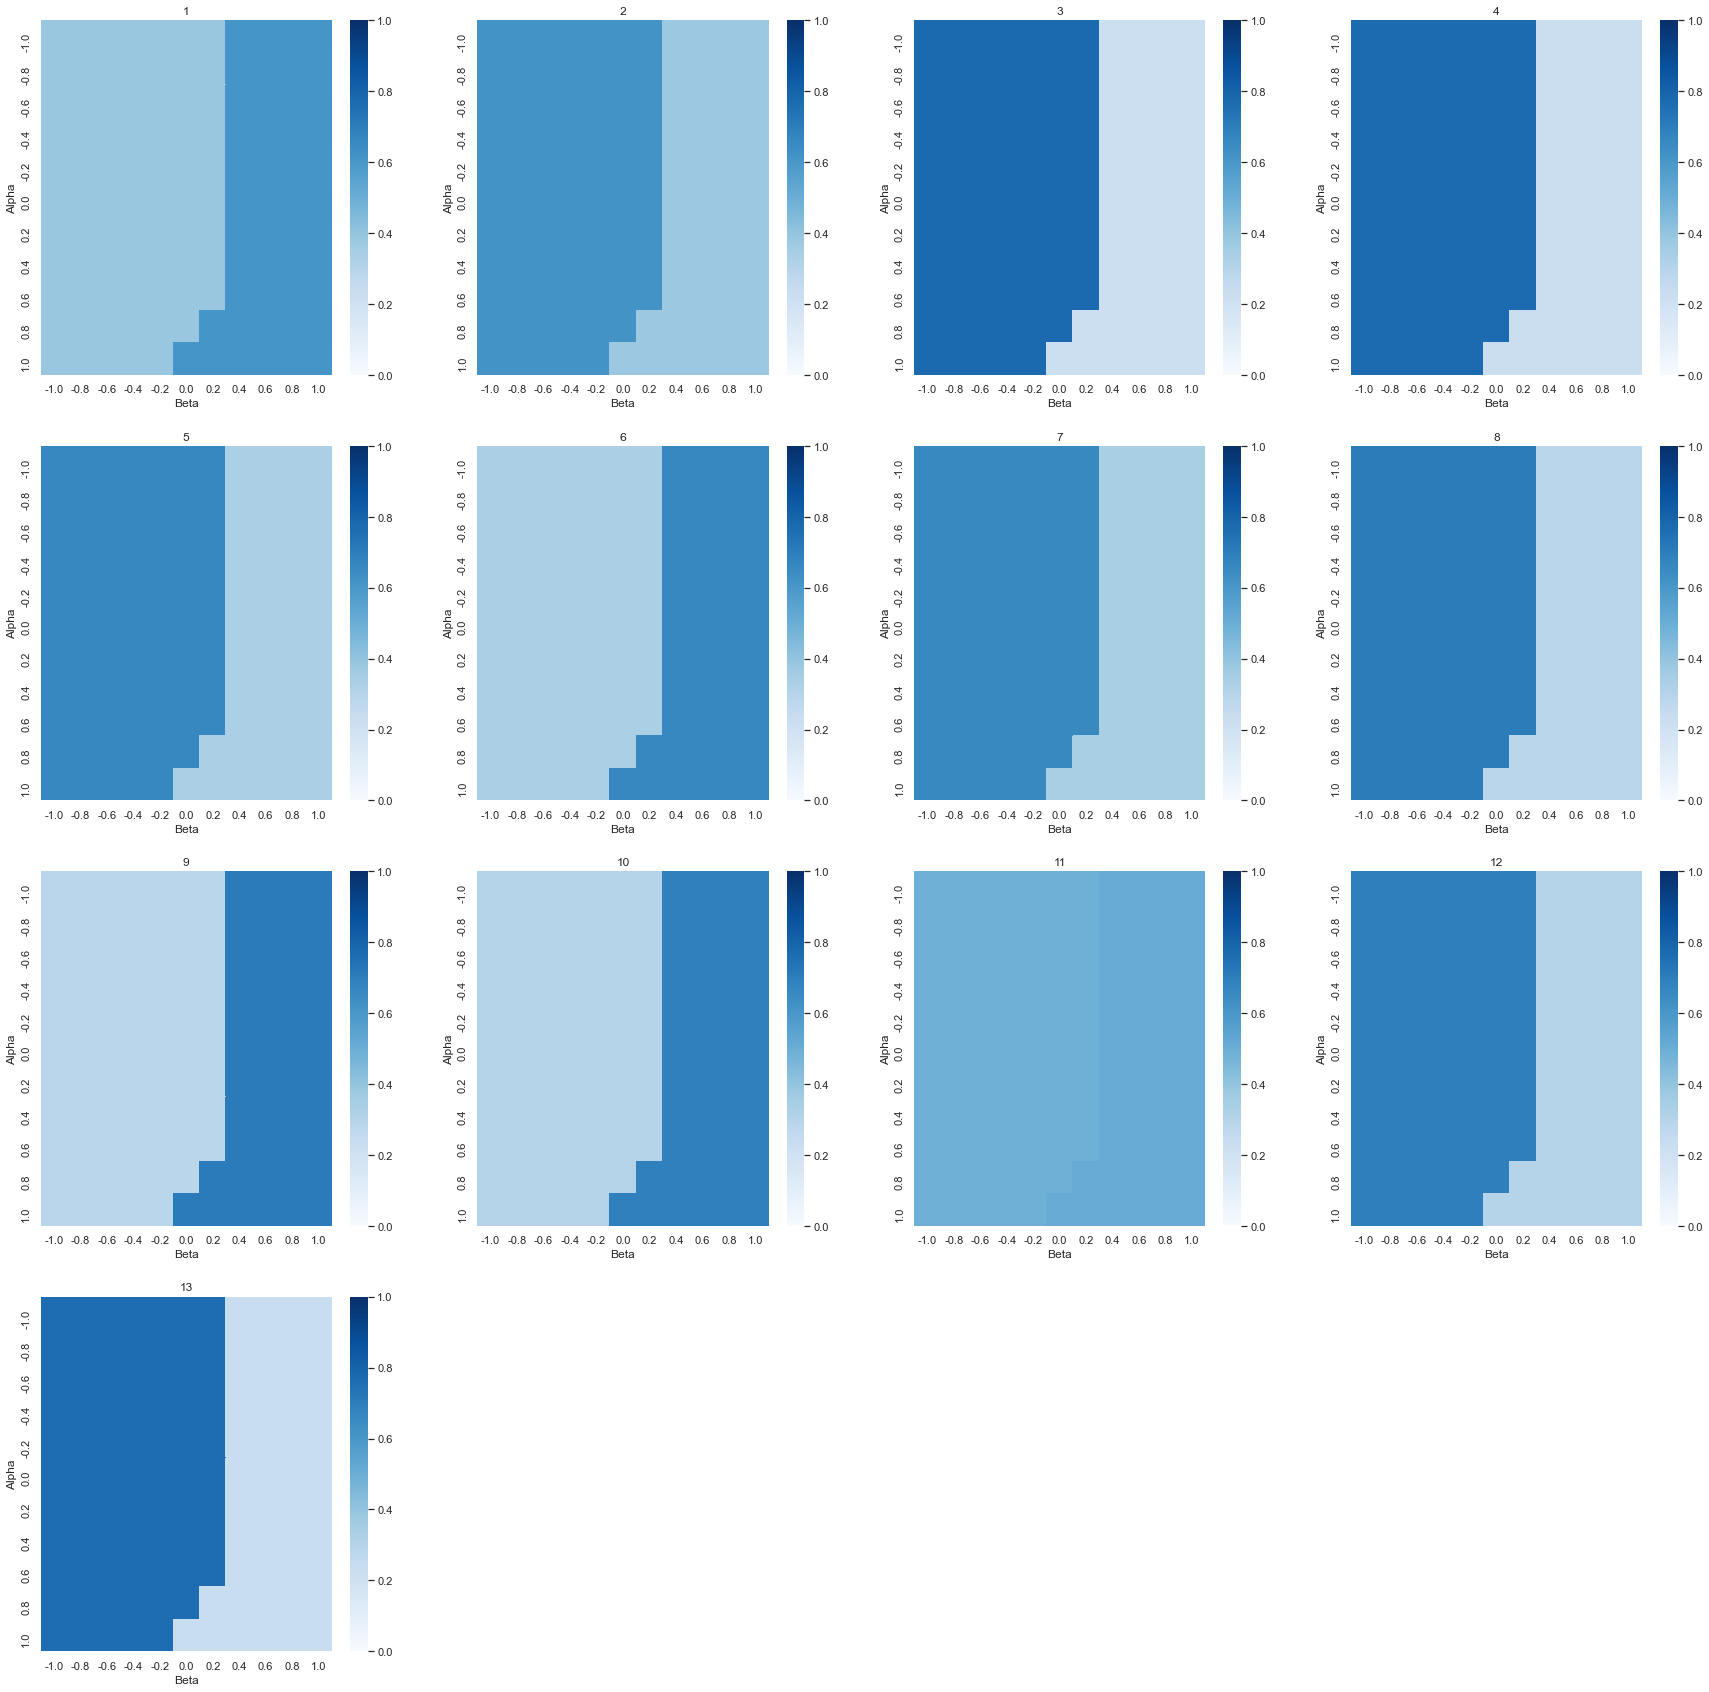

In [105]:
number_of_participants = len(df3['subject'].unique())

for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i)
    
plt.show()

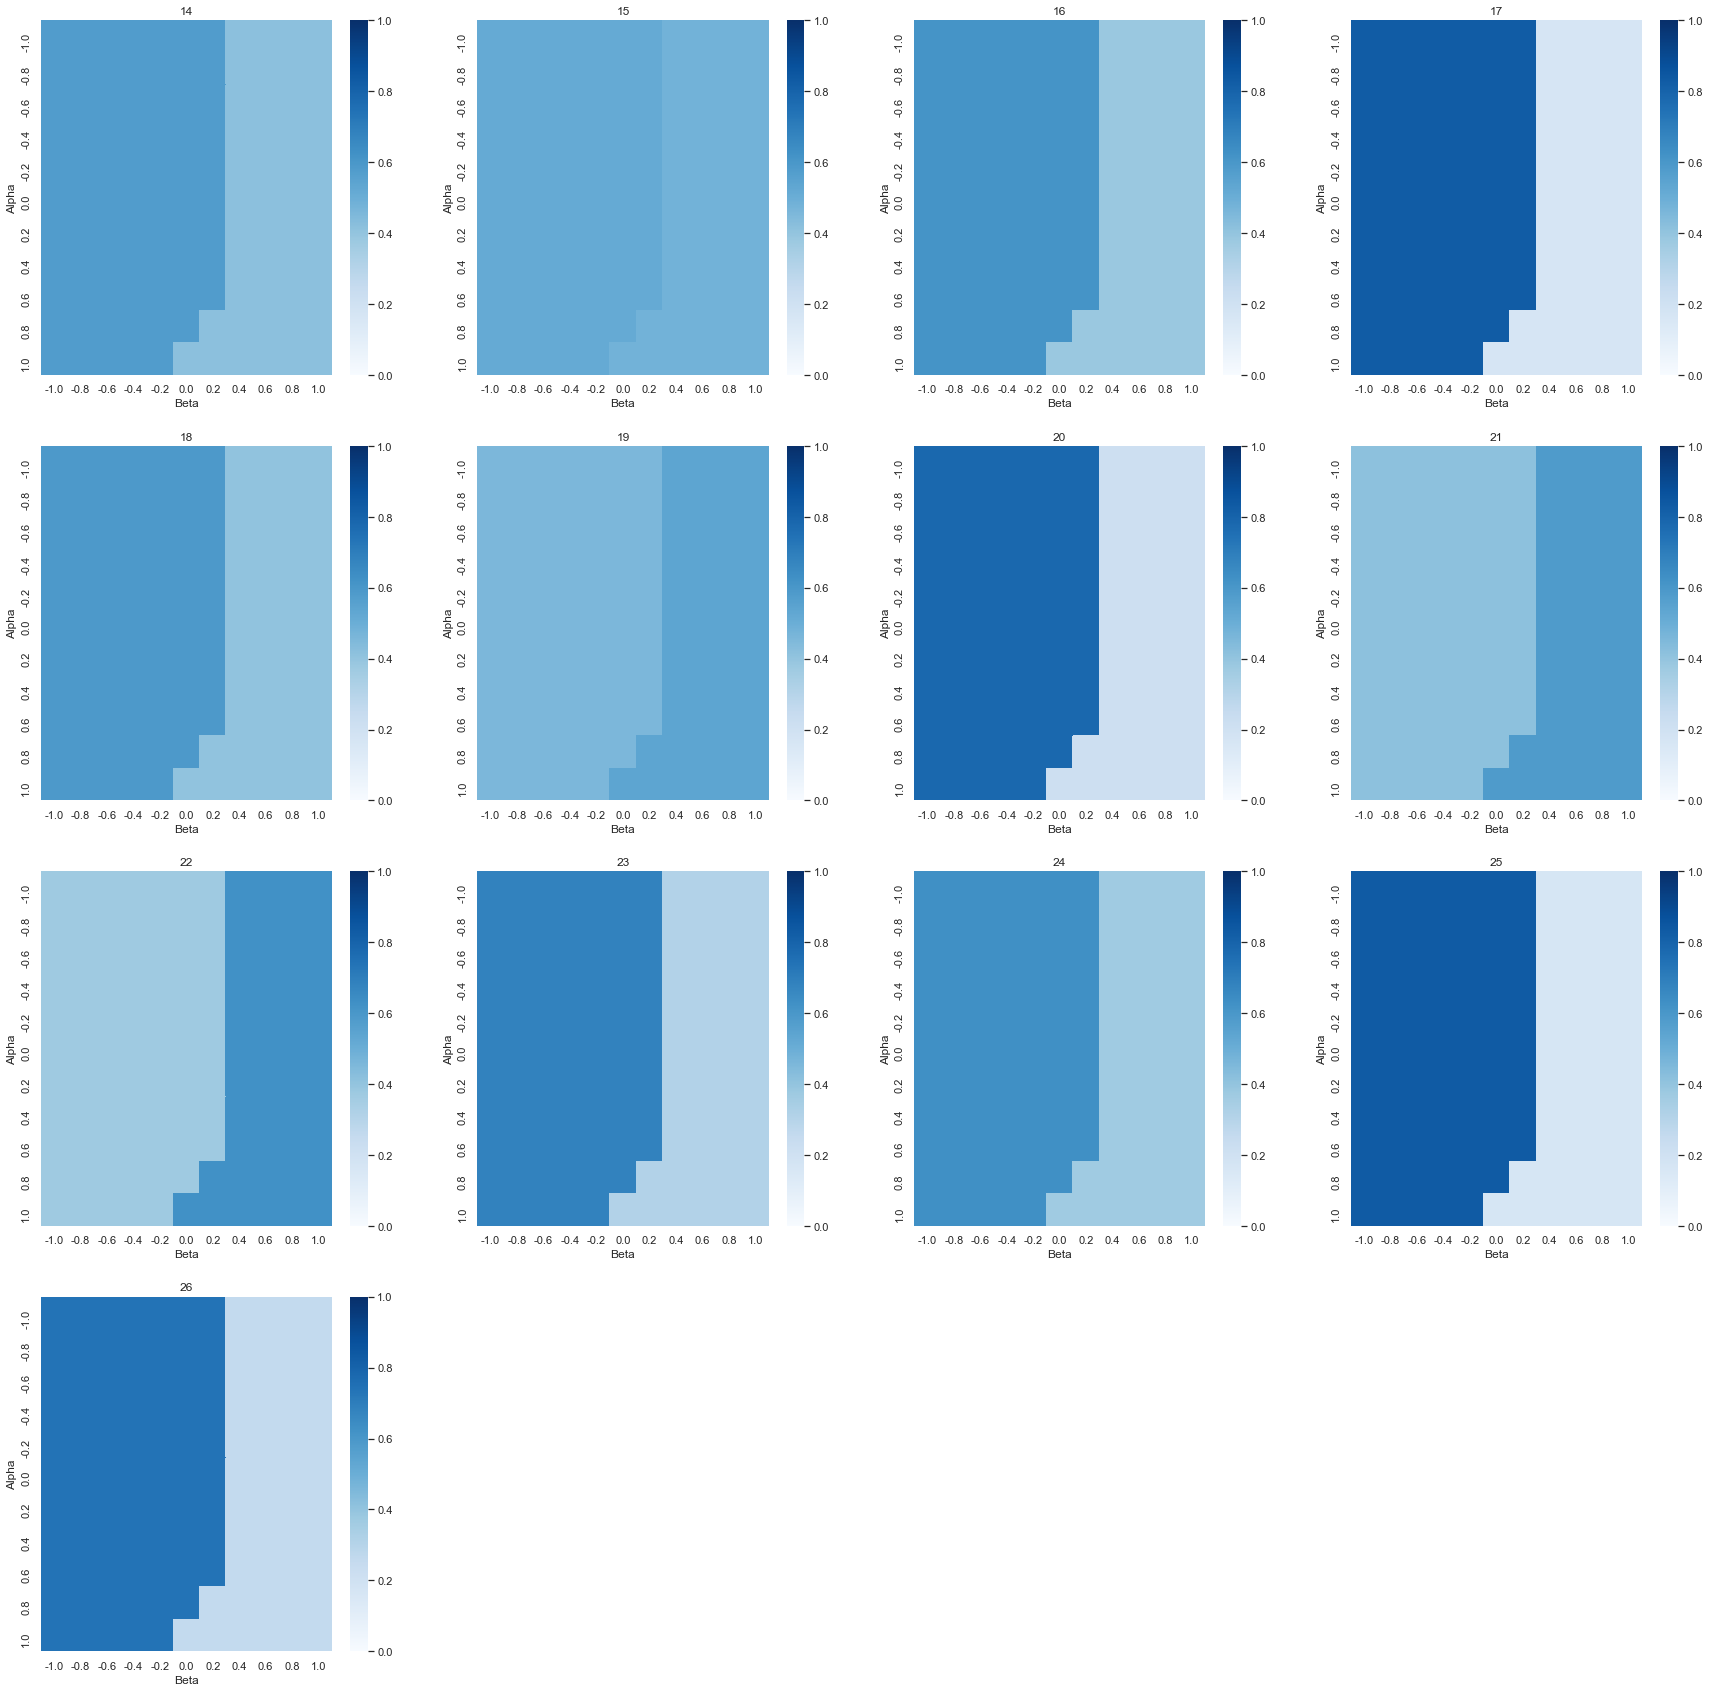

In [106]:
for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i+13)
    
plt.show()

In [107]:
# Making a dummy variable for the particiant type whose error is minimised in the left half of the heat map

freq_table['Is_lowtype'] = 1
freq_table.loc[2,  'Is_lowtype'] = 0
freq_table.loc[3,  'Is_lowtype'] = 0
freq_table.loc[4,  'Is_lowtype'] = 0
freq_table.loc[5,  'Is_lowtype'] = 0
freq_table.loc[7,  'Is_lowtype'] = 0
freq_table.loc[8,  'Is_lowtype'] = 0
freq_table.loc[12, 'Is_lowtype'] = 0
freq_table.loc[13, 'Is_lowtype'] = 0
freq_table.loc[14, 'Is_lowtype'] = 0
freq_table.loc[15, 'Is_lowtype'] = 0
freq_table.loc[16, 'Is_lowtype'] = 0
freq_table.loc[17, 'Is_lowtype'] = 0
freq_table.loc[18, 'Is_lowtype'] = 0
freq_table.loc[20, 'Is_lowtype'] = 0
freq_table.loc[23, 'Is_lowtype'] = 0
freq_table.loc[24, 'Is_lowtype'] = 0
freq_table.loc[25, 'Is_lowtype'] = 0
freq_table.loc[26, 'Is_lowtype'] = 0

In [108]:
freq_table['C_freq'] = 1-freq_table['D_freq']

In [109]:
# Chi square test for actions vs type of participant

exp1 = freq_table[freq_table['Is_lowtype']==1].sum()
exp2 = freq_table[freq_table['Is_lowtype']==0].sum()

cont_table = pd.DataFrame(index=['C', 'D'], columns=['LowType', 'HighType'], data=[[exp1[2], exp2[2]], [exp1[0], exp2[0]]])
    
# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Variables are dependent')
else:
    print('H0 holds true: Variables are independent')

p value is 0.3659949792548245
H0 holds true: Variables are independent


In [110]:
#Making parameters for regression

reg = pd.DataFrame(index=df3.index, columns=['subject', 'C_dummy', 'payoff', 'Is_lowtype', 'D_freq'])
reg['C_dummy'] = df3['decision']
reg[['subject', 'payoff']] = df3[['subject', 'payoff']]


for i in df3['subject'].unique():
    reg['Is_lowtype'][reg['subject']==i] = freq_table.loc[i, 'Is_lowtype']
    reg['D_freq'][reg['subject']==i] = freq_table.loc[i, 'D_freq']

In [111]:
# t-test to see how different are expected CR actions from observed actions
# low type plays D

def my_ttest(i): # ttest to check if cr expected matched observed
    x = 1-reg[reg['subject']==i]['Is_lowtype']
    y = df3[df3['subject']==i]['decision']
    t, p = ttest_ind(x, y)
    
    print('For subject ', i, ':')
    if p > 0.05:
        print('Reject Null hypothesis: the expected is significantly different from observed')
    else: print('Cannot reject Null hypothesis: observed matches expected')

In [112]:
for i in freq_table.index:
    my_ttest(i)

For subject  1 :
Cannot reject Null hypothesis: observed matches expected
For subject  2 :
Cannot reject Null hypothesis: observed matches expected
For subject  3 :
Cannot reject Null hypothesis: observed matches expected
For subject  4 :
Cannot reject Null hypothesis: observed matches expected
For subject  5 :
Cannot reject Null hypothesis: observed matches expected
For subject  6 :
Cannot reject Null hypothesis: observed matches expected
For subject  7 :
Cannot reject Null hypothesis: observed matches expected
For subject  8 :
Cannot reject Null hypothesis: observed matches expected
For subject  9 :
Cannot reject Null hypothesis: observed matches expected
For subject  10 :
Cannot reject Null hypothesis: observed matches expected
For subject  11 :
Cannot reject Null hypothesis: observed matches expected
For subject  12 :
Cannot reject Null hypothesis: observed matches expected
For subject  13 :
Cannot reject Null hypothesis: observed matches expected
For subject  14 :
Cannot reject Nu

In [113]:
reg.corr()

,subject,C_dummy,payoff
subject,1.000000,0.025474,-0.014513
C_dummy,0.025474,1.000000,-0.009068
payoff,-0.014513,-0.009068,1.000000


# bc = 4

All subjects present

In [114]:
df4 = df[df['bc']==4]
print('The shape of df4 is', df4.shape)
print('Number of rows check out as per the previous table')

The shape of df4 is (16592, 13)
Number of rows check out as per the previous table


In [115]:
df4['decision_opp']=0
df4['decision_opp'].loc[(df4['payoff']==6)] = 1
df4['decision_opp'].loc[(df4['payoff']==8)] = 1

### Graphs

In [116]:
# PLayer wise frequency of action C

freq_table = pd.DataFrame(index=df4['subject'].unique(), columns=['D_freq', 'C_freq', 'CC_freq', 'DD_freq', 'CD_freq'])

for i in df4['subject'].unique():
    freq_table.loc[i, 'D_freq']  = sum((df4['decision']==0)&(df4['subject']==i))/sum(df4['subject']==i)
    freq_table.loc[i, 'C_freq']  = sum((df4['decision']==1)&(df4['subject']==i))/sum(df4['subject']==i)
    freq_table.loc[i, 'CC_freq'] = sum((df4['decision']==1)&(df4['decision_opp']==1)&(df4['subject']==i))/sum(df4['subject']==i)
    freq_table.loc[i, 'DD_freq'] = sum((df4['decision']==0)&(df4['decision_opp']==0)&(df4['subject']==i))/sum(df4['subject']==i)
    freq_table.loc[i, 'CD_freq'] = sum((df4['decision']==1)&(df4['decision_opp']==0)&(df4['subject']==i))/sum(df4['subject']==i)

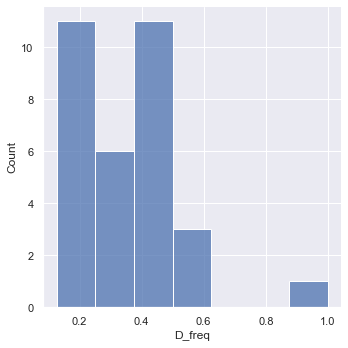

In [117]:
# Histogram of frequency of players playing C
ax = sns.displot(data=freq_table, x=freq_table['D_freq'])

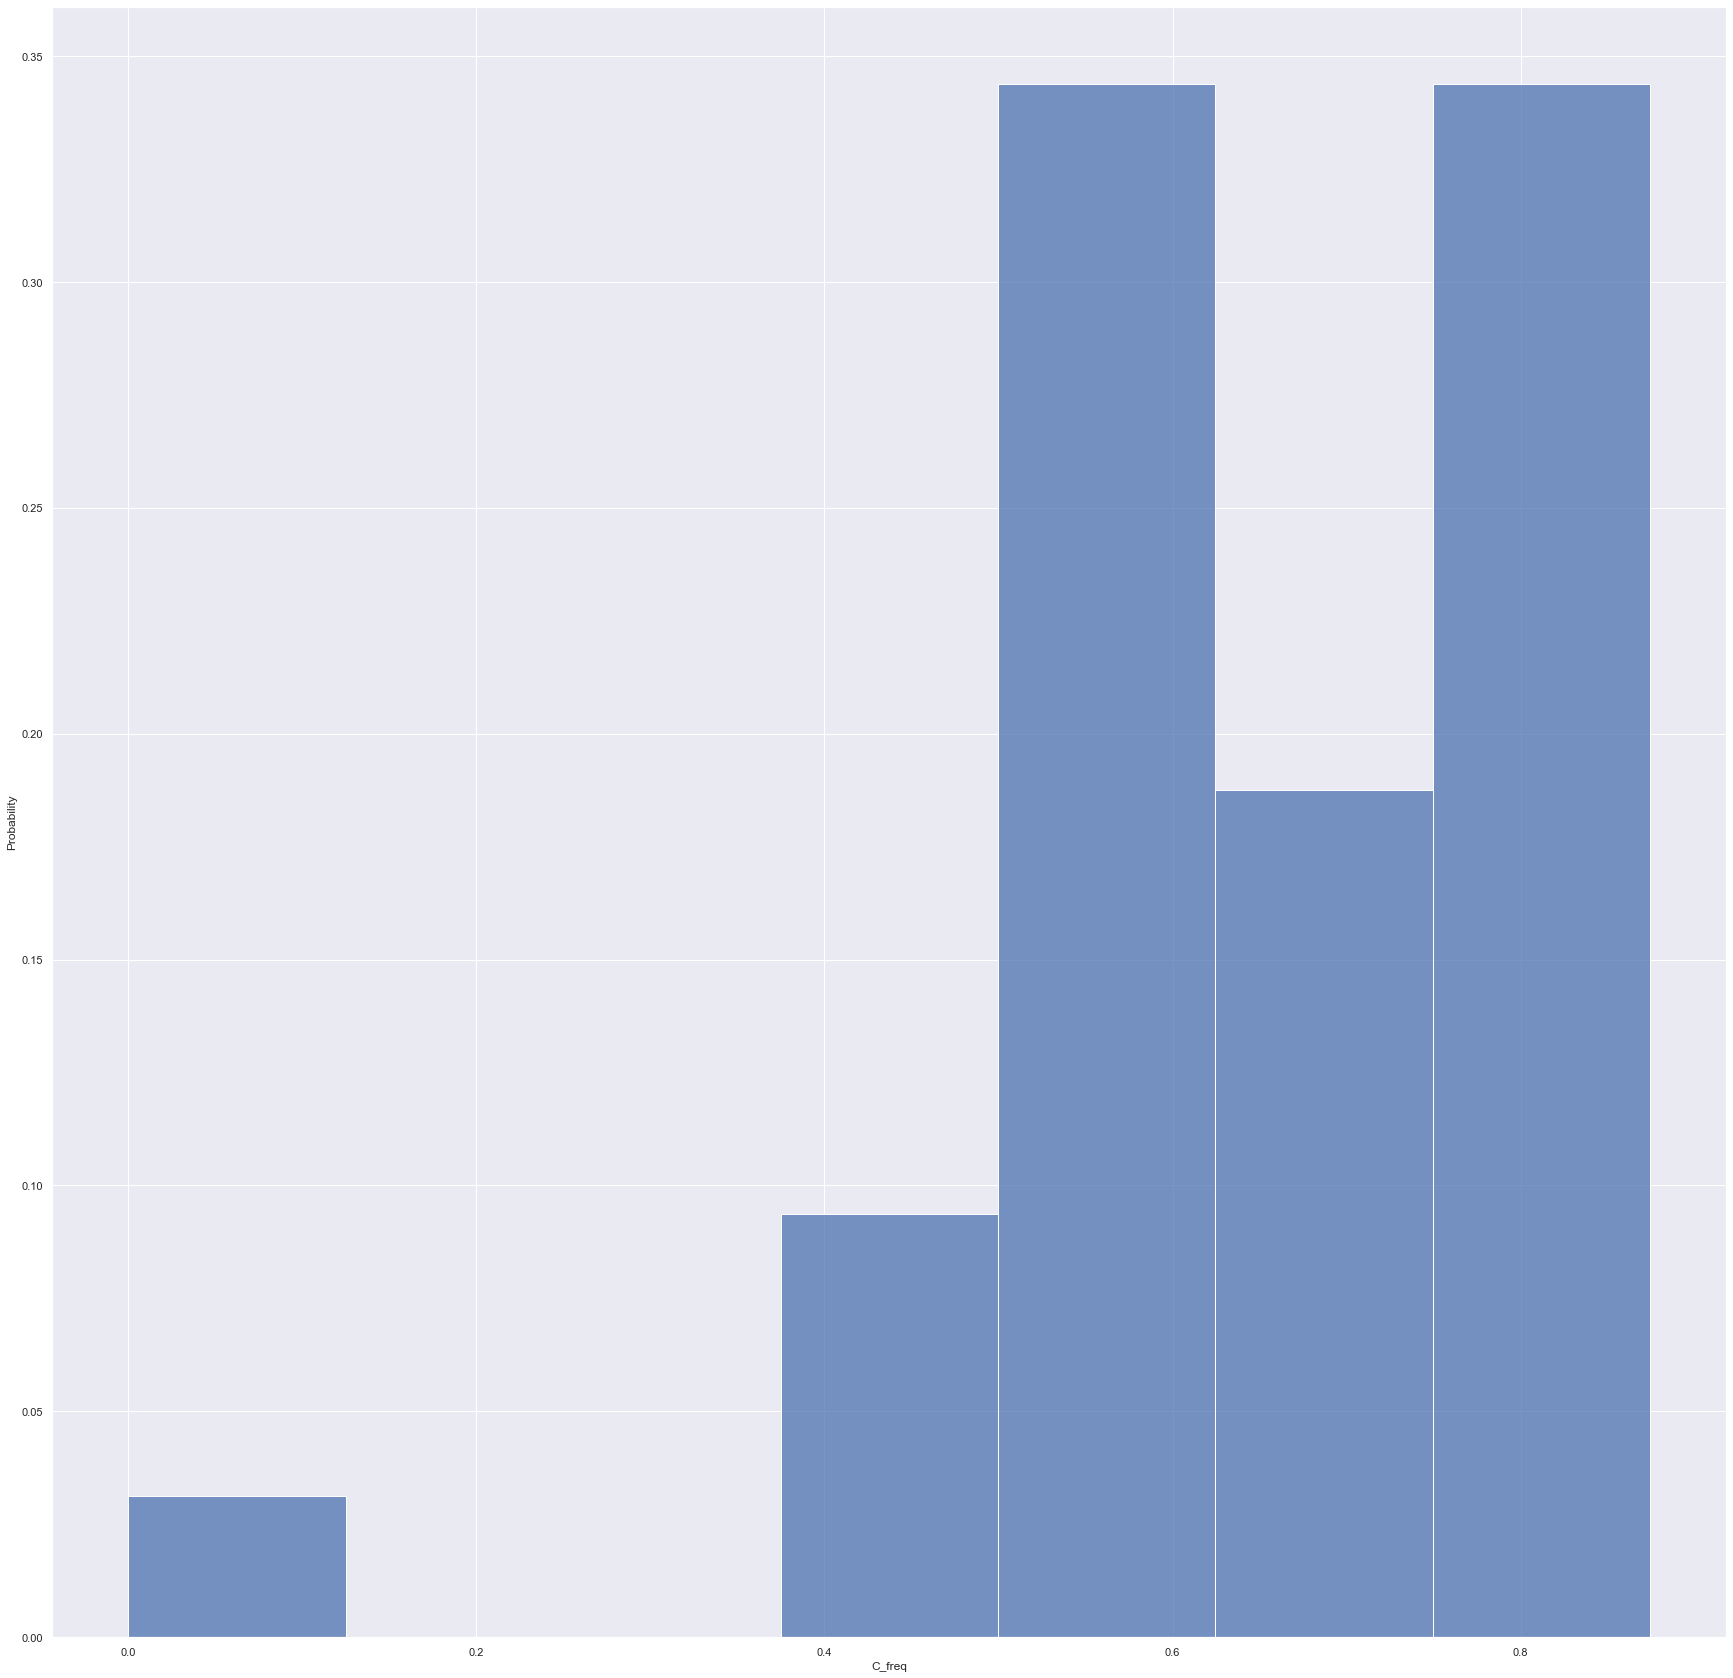

In [118]:
# Histogram of frequency of players playing C
ax = sns.histplot(data=freq_table, x=freq_table['C_freq'], stat='probability')

<AxesSubplot:xlabel='CC_freq', ylabel='Probability'>

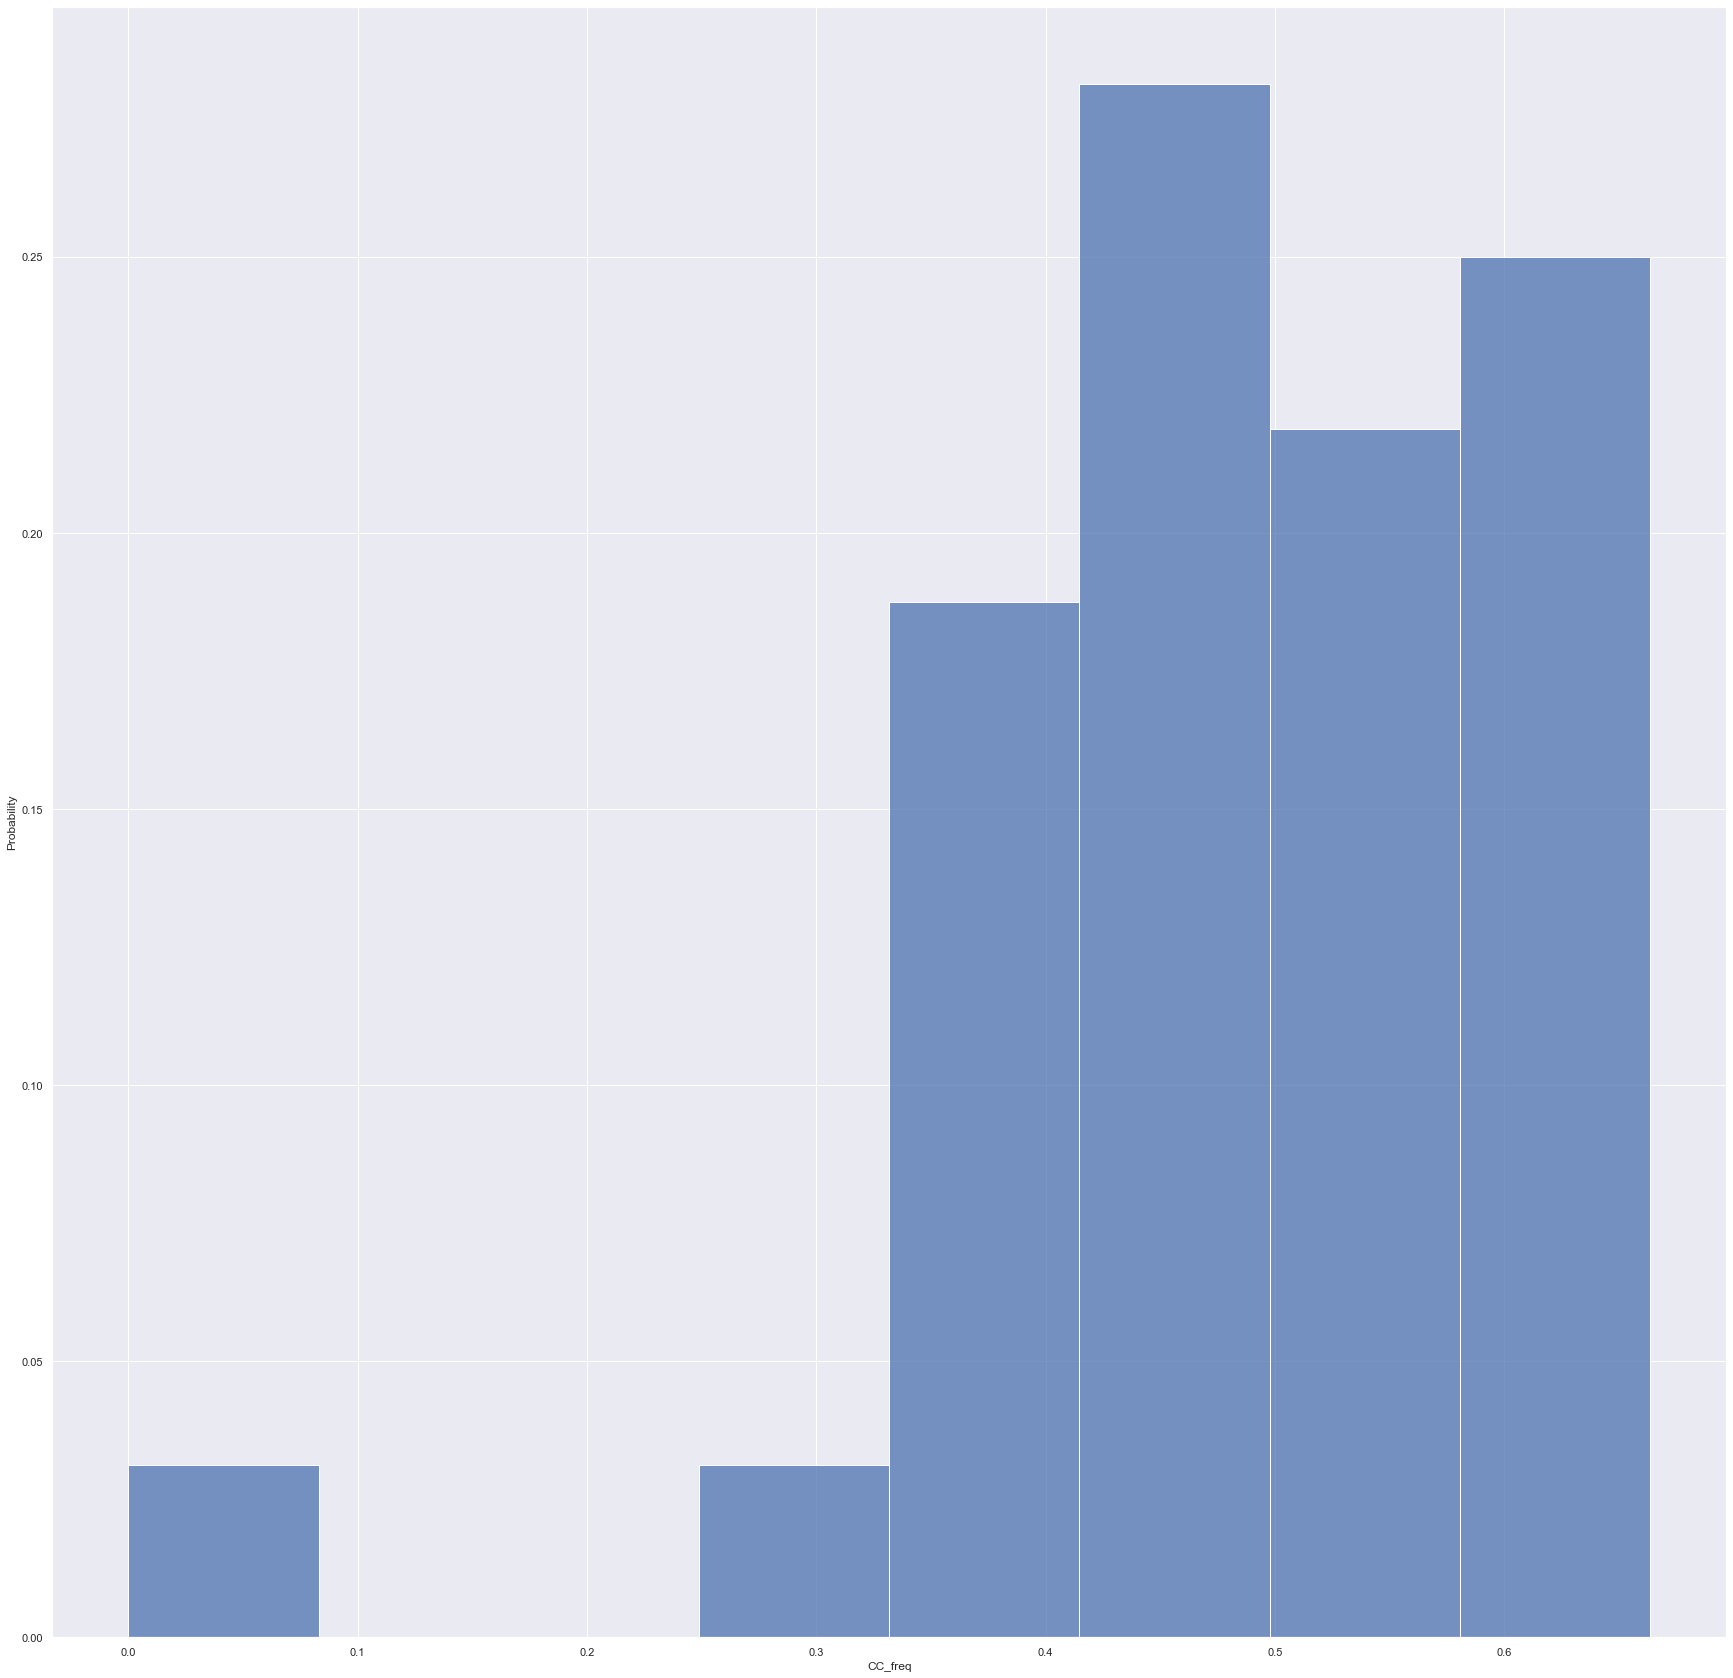

In [119]:
# Histogram of frequency of the outcome (C, C)
sns.histplot(x=freq_table['CC_freq'], stat='probability')

<AxesSubplot:xlabel='DD_freq', ylabel='Probability'>

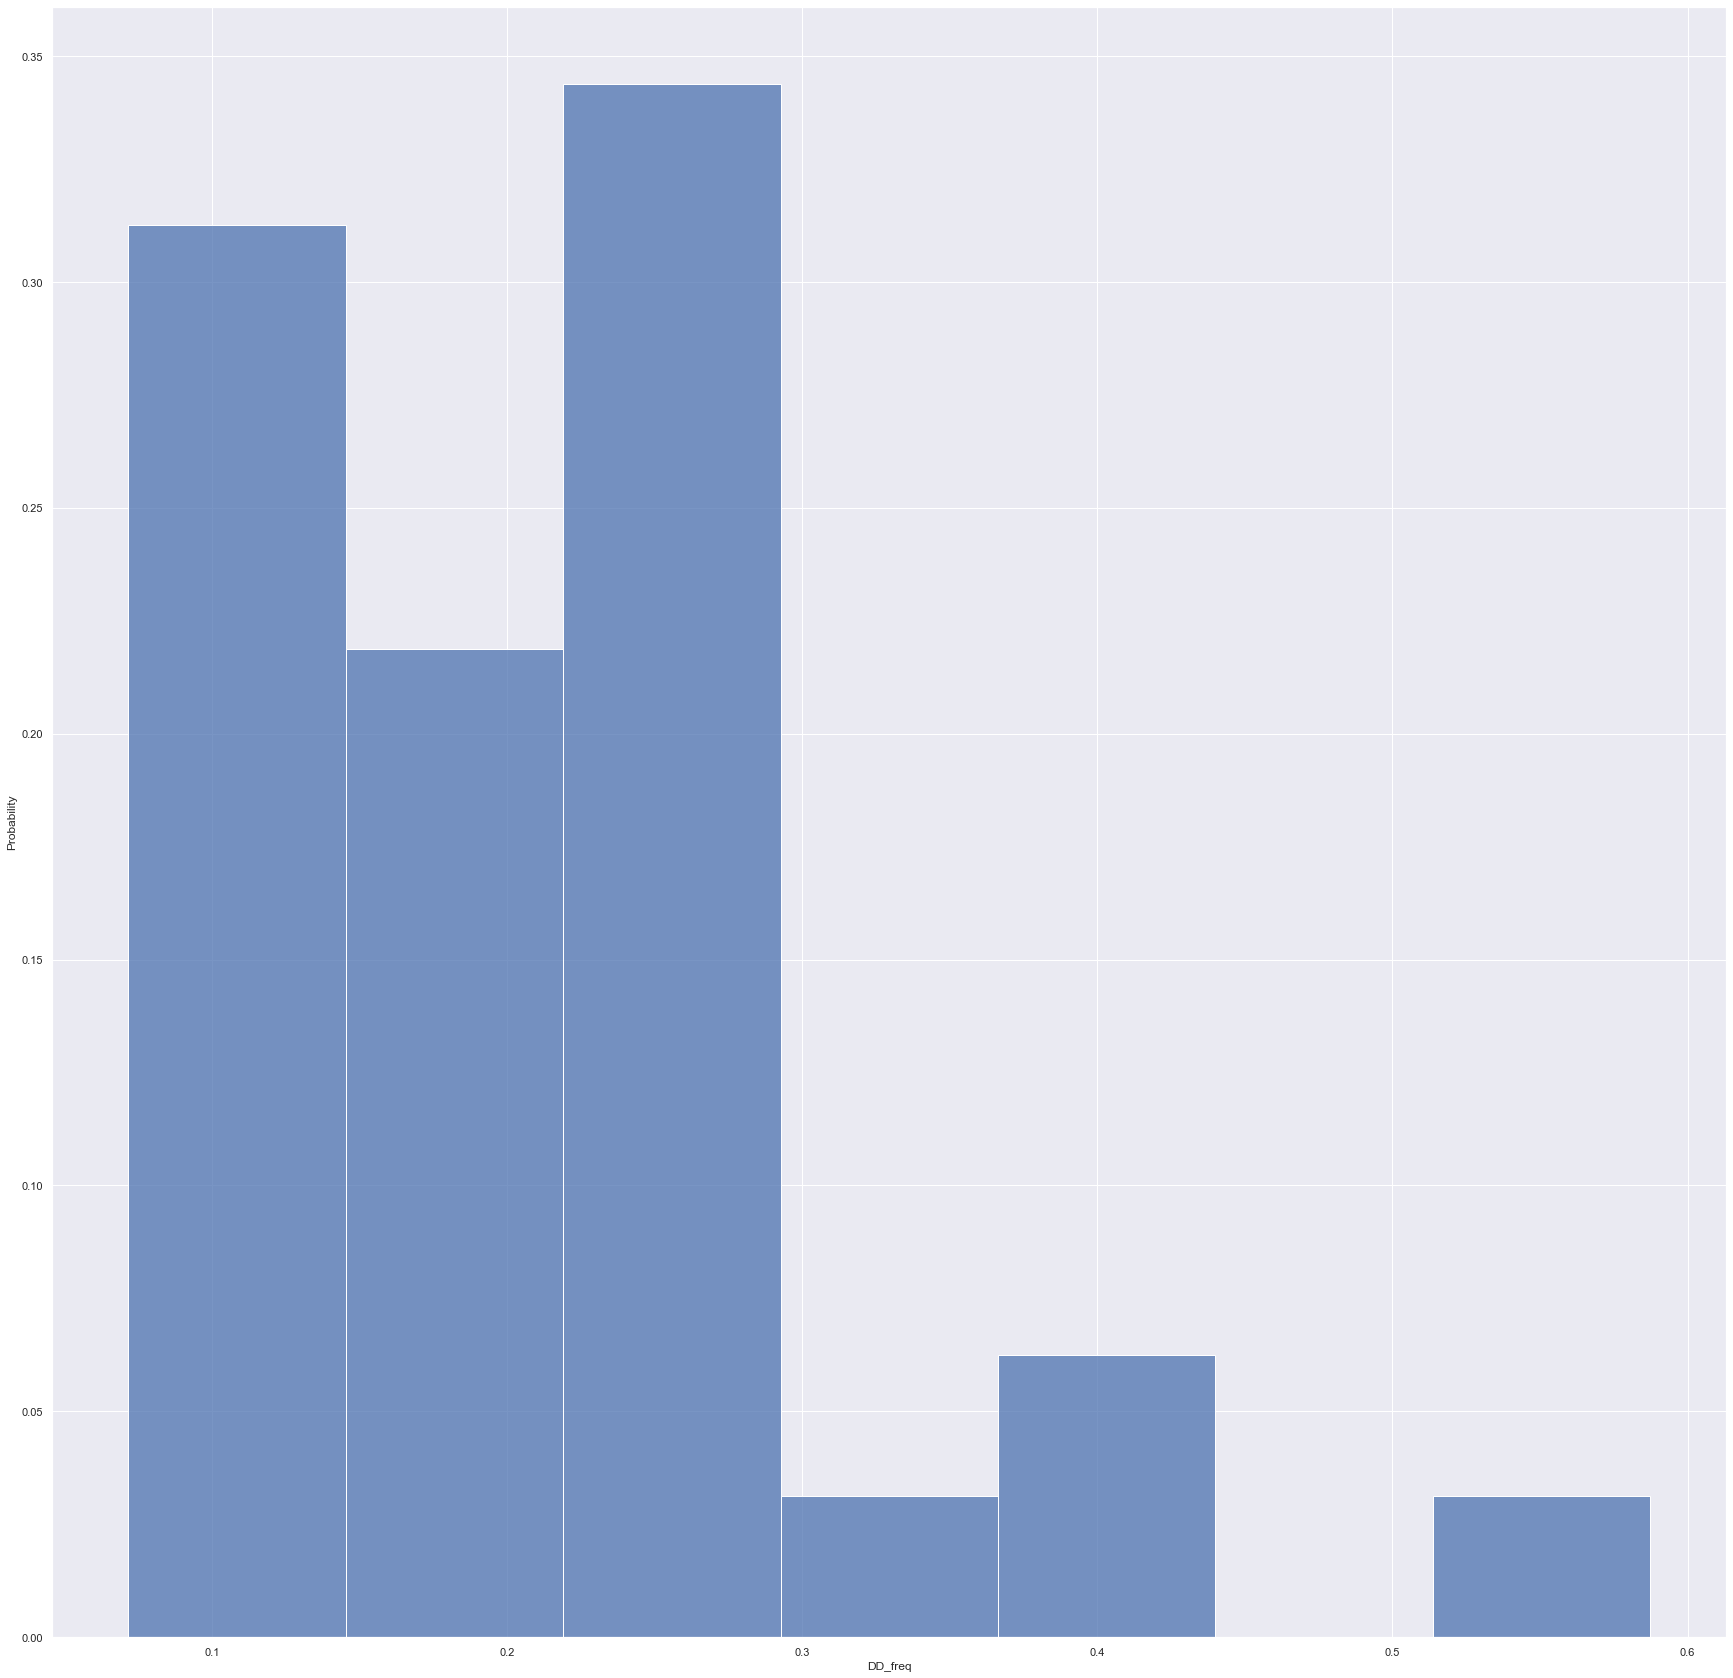

In [120]:
# Histogram of frequency of the outcome (D, D)
sns.histplot(x=freq_table['DD_freq'], stat='probability')

<AxesSubplot:xlabel='CD_freq', ylabel='Probability'>

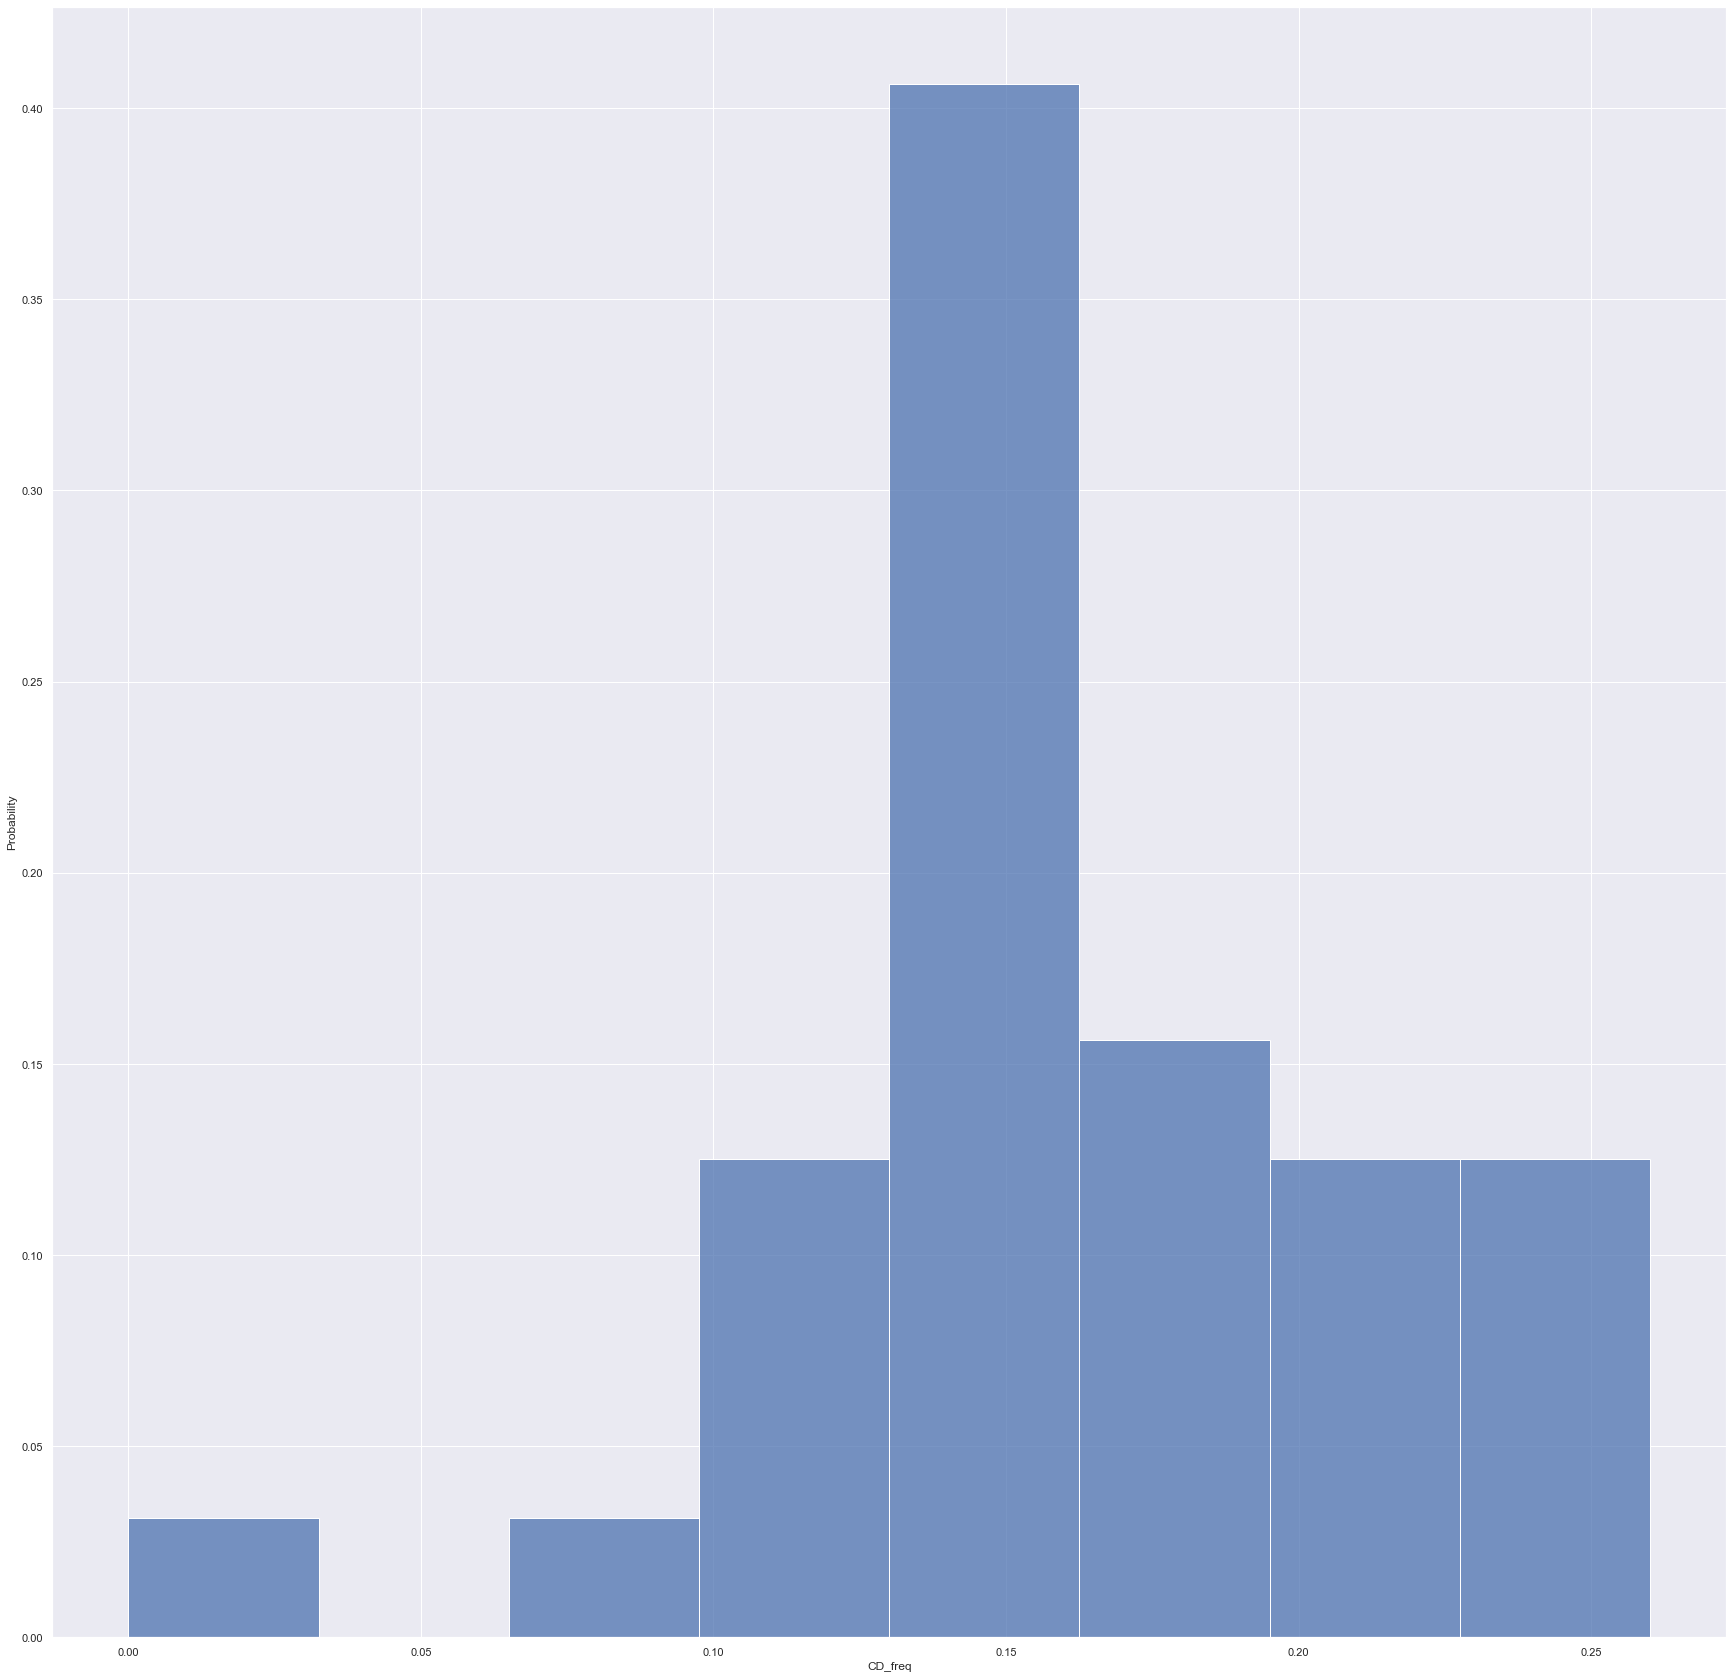

In [121]:
# Histogram of frequency of the outcome (C, D)
sns.histplot(x=freq_table['CD_freq'], stat='probability')

In [122]:
print(sum(freq_table['C_freq']<0.5)/32)
print(sum(freq_table['C_freq']==1))
print(sum(freq_table['C_freq']==0))
print(df4['payoff'].mean())

0.125
0
1
3.8353423336547734


In [123]:
# Subject wise distribution of action C

def make_freqplot(i):
    stop = sum(df4['subject']==i)+1
    temp = df4[df4['subject']==i]['decision']
    temp = 1-temp
    temp = (temp.cumsum())/range(1, stop)
    
    sns.lineplot(x=range(len(temp)), y=temp).set(ylabel='Probability of choosing D', xlabel=i)

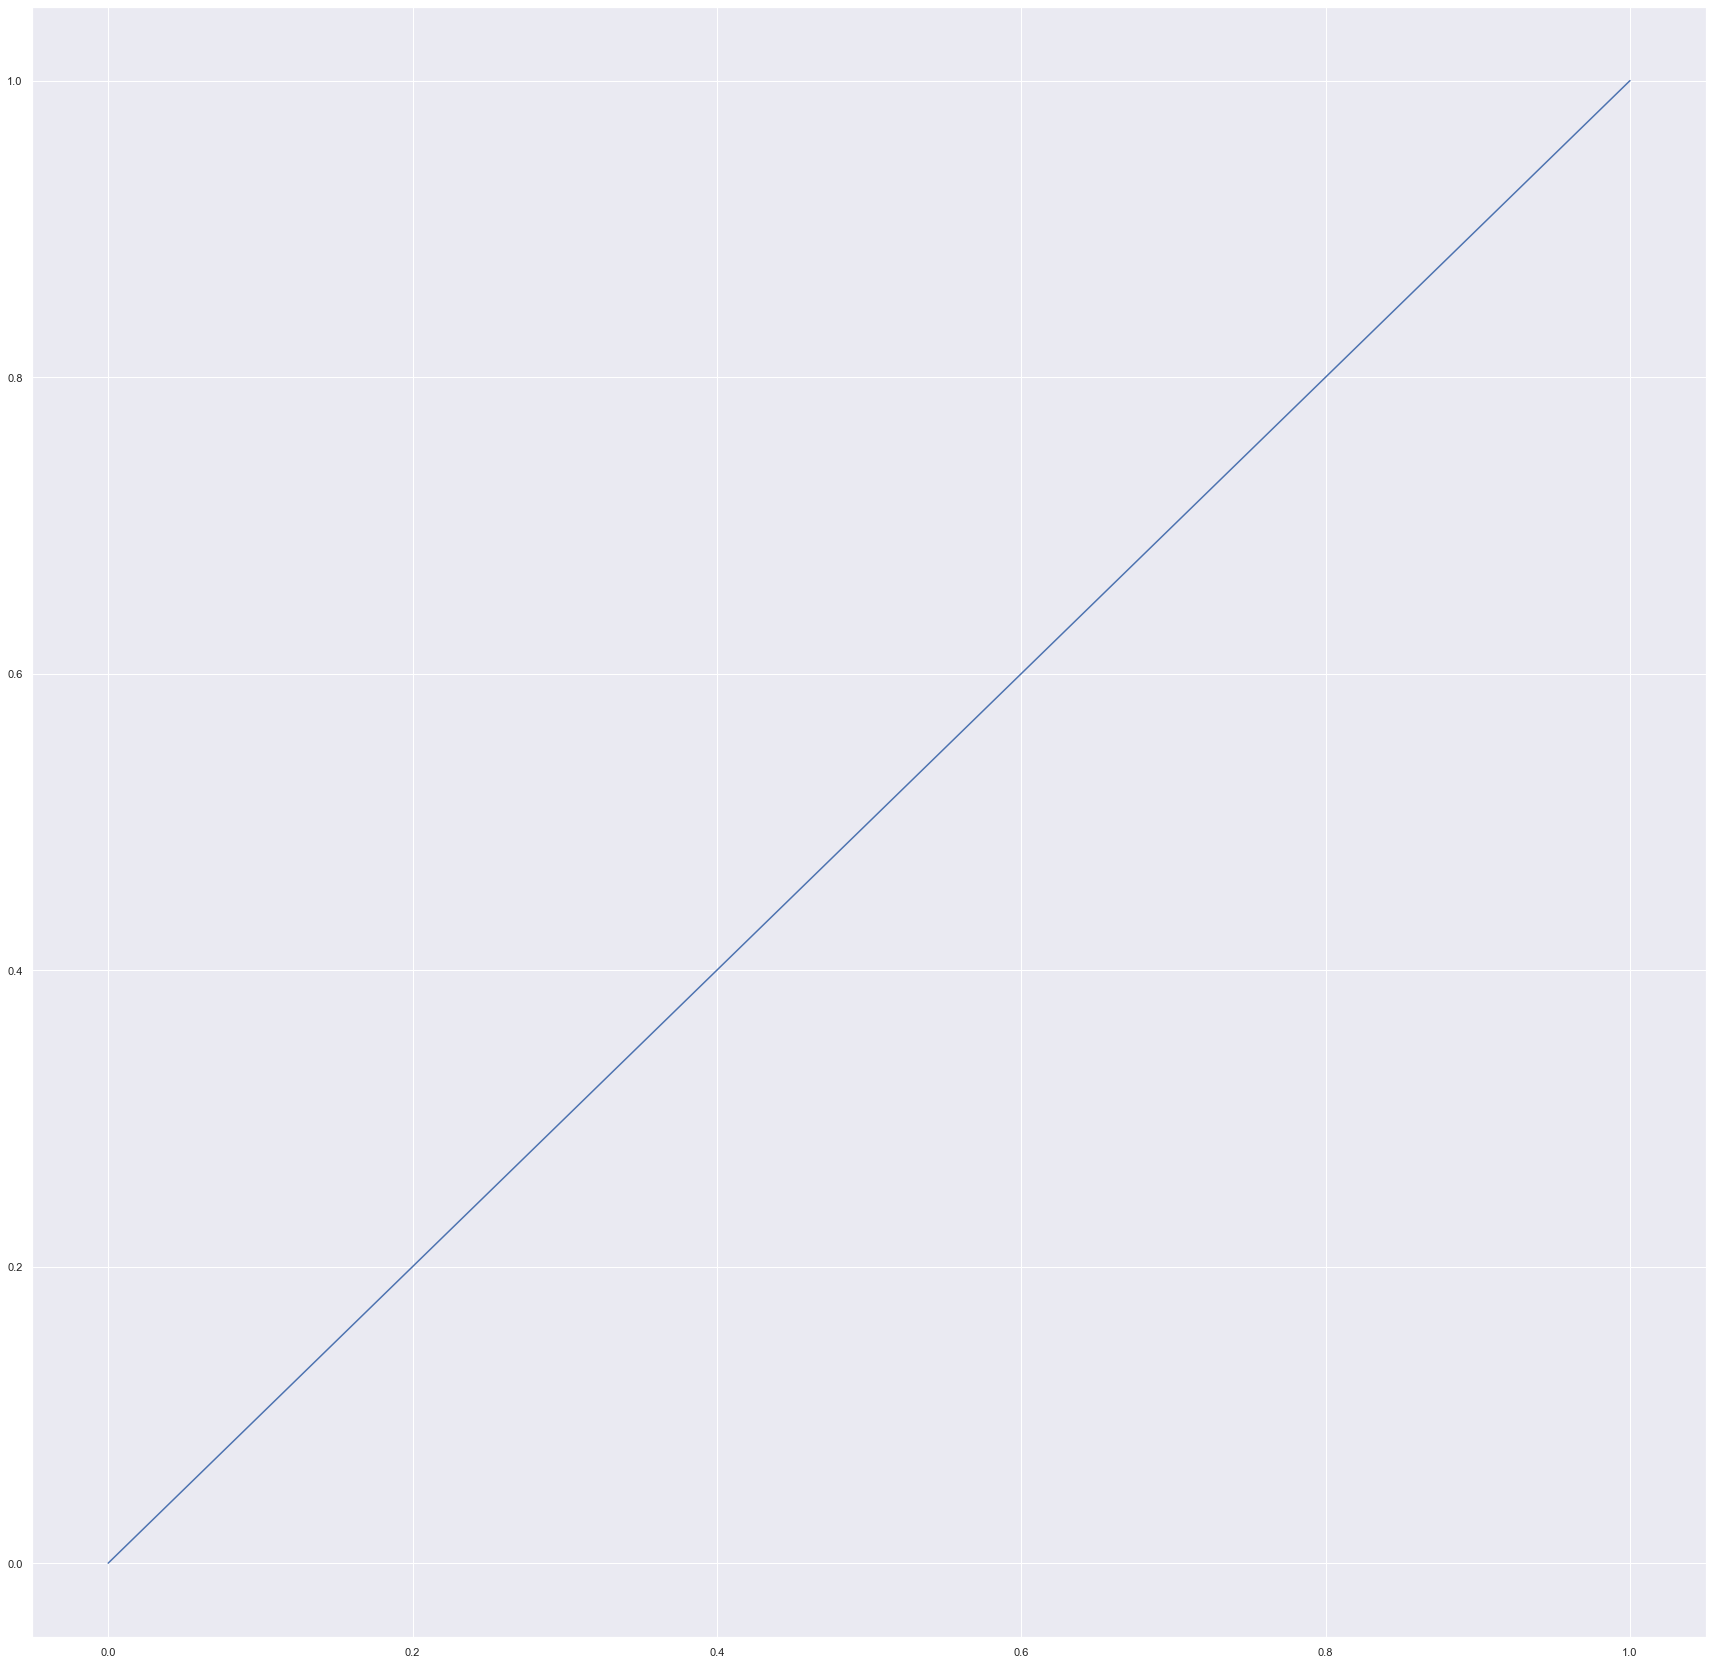

In [124]:
# Dummy graph to set the axis in the subsequent graphs
ax=sns.lineplot(x=np.linspace(0, 1, 100, endpoint=True), y=np.linspace(0, 1, 100, endpoint=True))

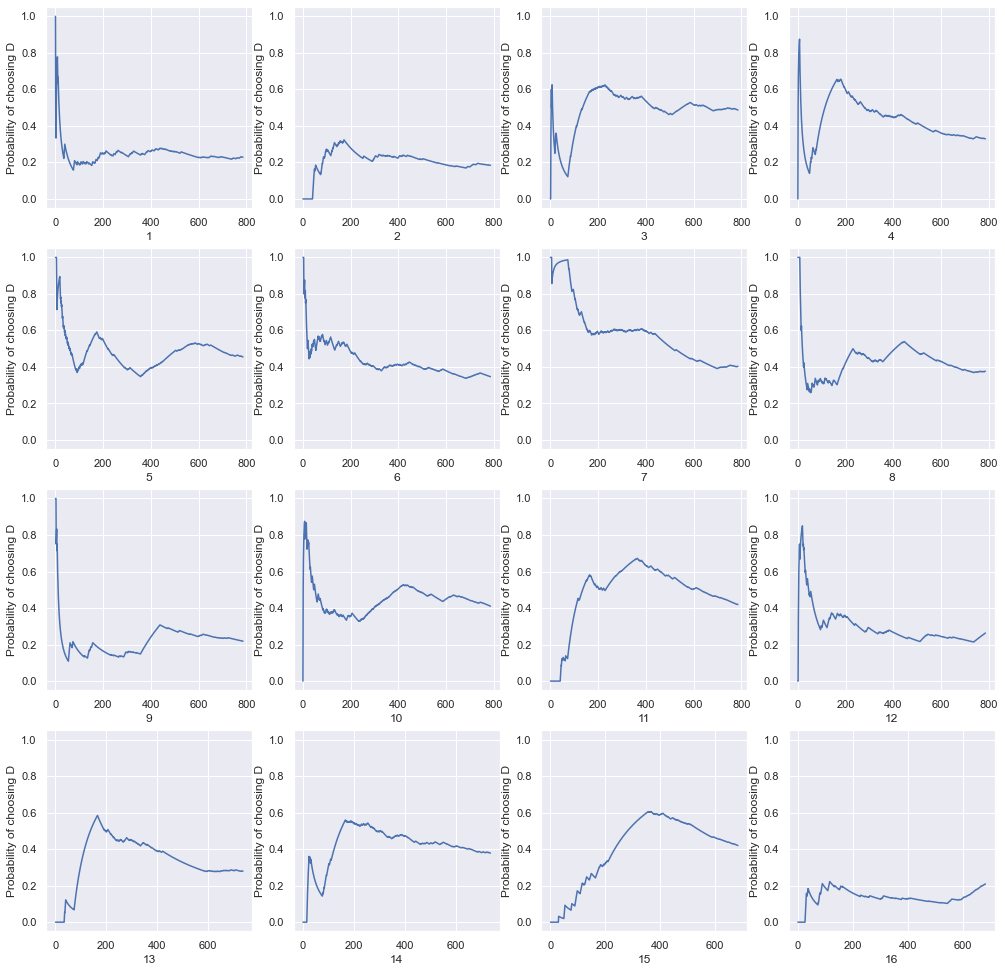

In [125]:
count = 1
no_of_cols = 4
no_of_rows = 4
players = np.array_split((df4['subject'].unique()), 2)

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 1-15')

for i in players[0]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

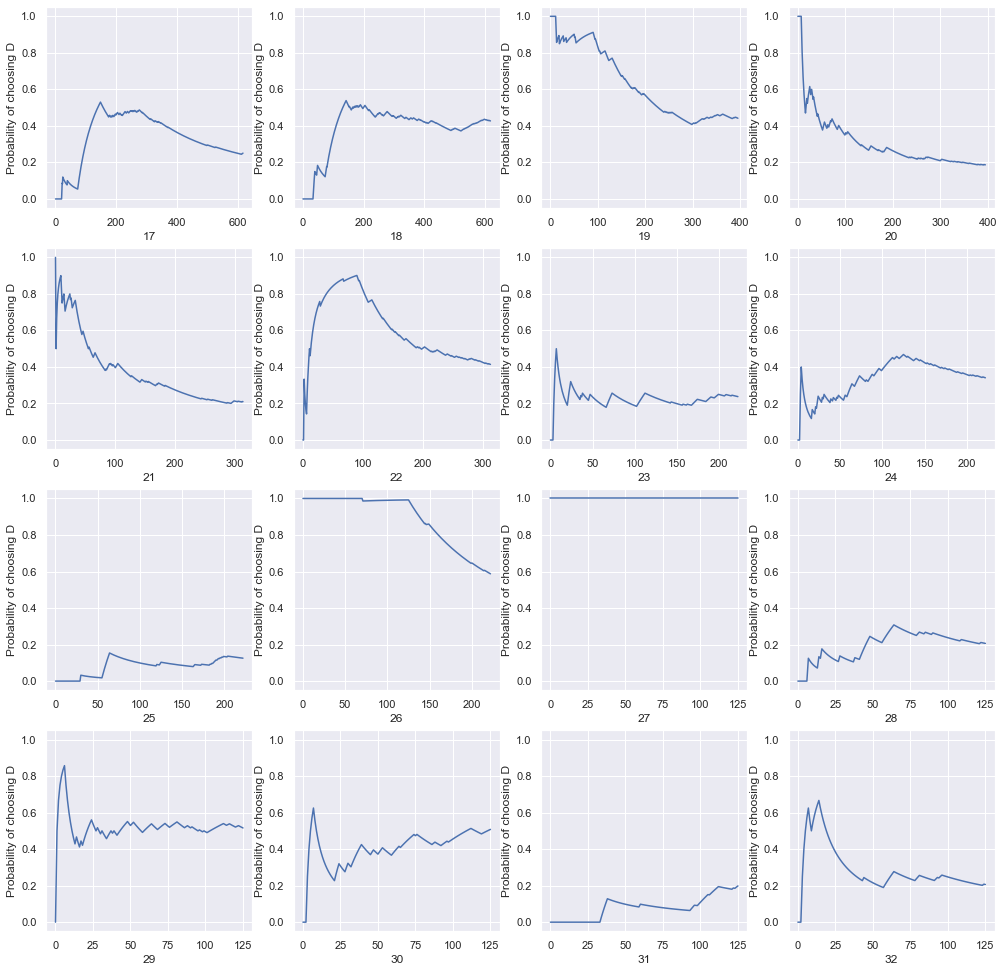

In [126]:
count = 1

# Graph
plt.figure(figsize=(17, 17))
plt.title('Player wise probabilty of playing D wrt number of rounds for players 16-30')

for i in players[1]:
    plt.subplot(no_of_rows, no_of_cols, count, sharey=ax)
    make_freqplot(i)
    count+=1

plt.show()

### CR Utility

In [127]:
# Create empty dataframes
action4 = pd.DataFrame(index=df4.index, columns=col)    # utility matrix
error4  = pd.DataFrame(index=df4.index, columns=col)    # error matrix

In [128]:
# Action Grid: 1 for beta >= 1/5 and 0 for beta < 1/5 except when alpha + beta >= 1 (no equality in 11 steps' case)

for i in range(len(col)):
    beta = float(col[i][1]) # convert beta (from column name) from string to float
    if beta >= 1/5:
        action4.iloc[:, i] = 1
    if beta < 1/5:
        alpha = float(col[i][0])
        if (alpha+beta >= 1):
            action4.iloc[:, i] = 1
        if (alpha+beta < 1):
            action4.iloc[:, i] = 0
        
#action4.head()

In [129]:
# Calculating error matrix

for x in col:
    error4[x] = action4[x]==df4['decision']
    
error4 = 1 - error4 # Converting to ones and zeros from trues and falses
error4['subject'] = df4['subject'] # Adding player column for easier future calculations

#error4.head()

In [130]:
# Calculate average error for each participant

data = []

for i in df4['subject'].unique():
    sum_of_error     = (error4[error4['subject']==i].iloc[:,:-1]).sum() # summing over error rows where player == i and taking every column except the last (which is the name column) using iloc
    number_of_trials = (df4['subject']==i).sum()
    data             = data + [sum_of_error/number_of_trials]
    
avg_error4 = pd.DataFrame(data=data)

#avg_error4.head()

In [131]:
# Minimise error

min_error4 = avg_error4.idxmin(axis=1) # gives the first pair where minimum error occurs
#min_error3

In [132]:
# Find indices with minimum error

s = avg_error4.eq(avg_error4.min(axis=1), axis=0) # dataframe of boolean wherever min occurs
min_error_indices4 = s.agg(lambda s: s.index[s].values, axis=1) # row wise aggregating indices of columns where true occurs
#min_error_indices4

In [133]:
# Creating a dataframe of alphas and betas which give minimum error, for every player

min_param4 = pd.DataFrame(min_error_indices4[0].tolist(), columns=['alpha', 'beta'])
min_param4['subject'] = 0

for i in min_error_indices4.index:
    if i == min_error_indices4.index.stop-1:
        break
    temp_df = pd.DataFrame(min_error_indices4[i+1].tolist(), columns=['alpha', 'beta'])
    temp_df['subject'] = i+1
    min_param4 = pd.concat([min_param4, temp_df])
    
min_param4.index = range(len(min_param4))

#min_param4

In [134]:
# Find player wise average alpha and beta

min_param4['alpha'] = min_param4['alpha'].astype(float) # conevrting type from string to float
min_param4['beta']  = min_param4['beta'].astype(float)   # conevrting type from string to float

final4 = min_param4.groupby(by=['subject']).mean() # grouping by mean wrt player

### Heatmaps

In [135]:
# Function to make heatmaps

def make_heatmap(player_no):
    temp_player = pd.DataFrame(index=alpha_range, columns=beta_range) # Creating empty dataset
    
    # Creating table to make heatmap
    for i in range(len(col)): 
        alpha = float(col[i][0])
        beta  = float(col[i][1])
        temp_player.loc[alpha, beta] = avg_error4[col[i]][player_no]
    temp_player = temp_player.astype(float)
    
    # Creating heatmap
    sns.set(rc = {'figure.figsize':(30,30)})
    sns.heatmap(data=temp_player, cmap="Blues", 
                      vmin=0, vmax=1, xticklabels=np.round(beta_range, decimals=2), yticklabels=np.round(alpha_range, decimals=2),
                      #cbar=False, annot=True, linewidths=.5
                     ).set(ylabel='Alpha', xlabel='Beta', title=(error4['subject'].unique())[player_no])

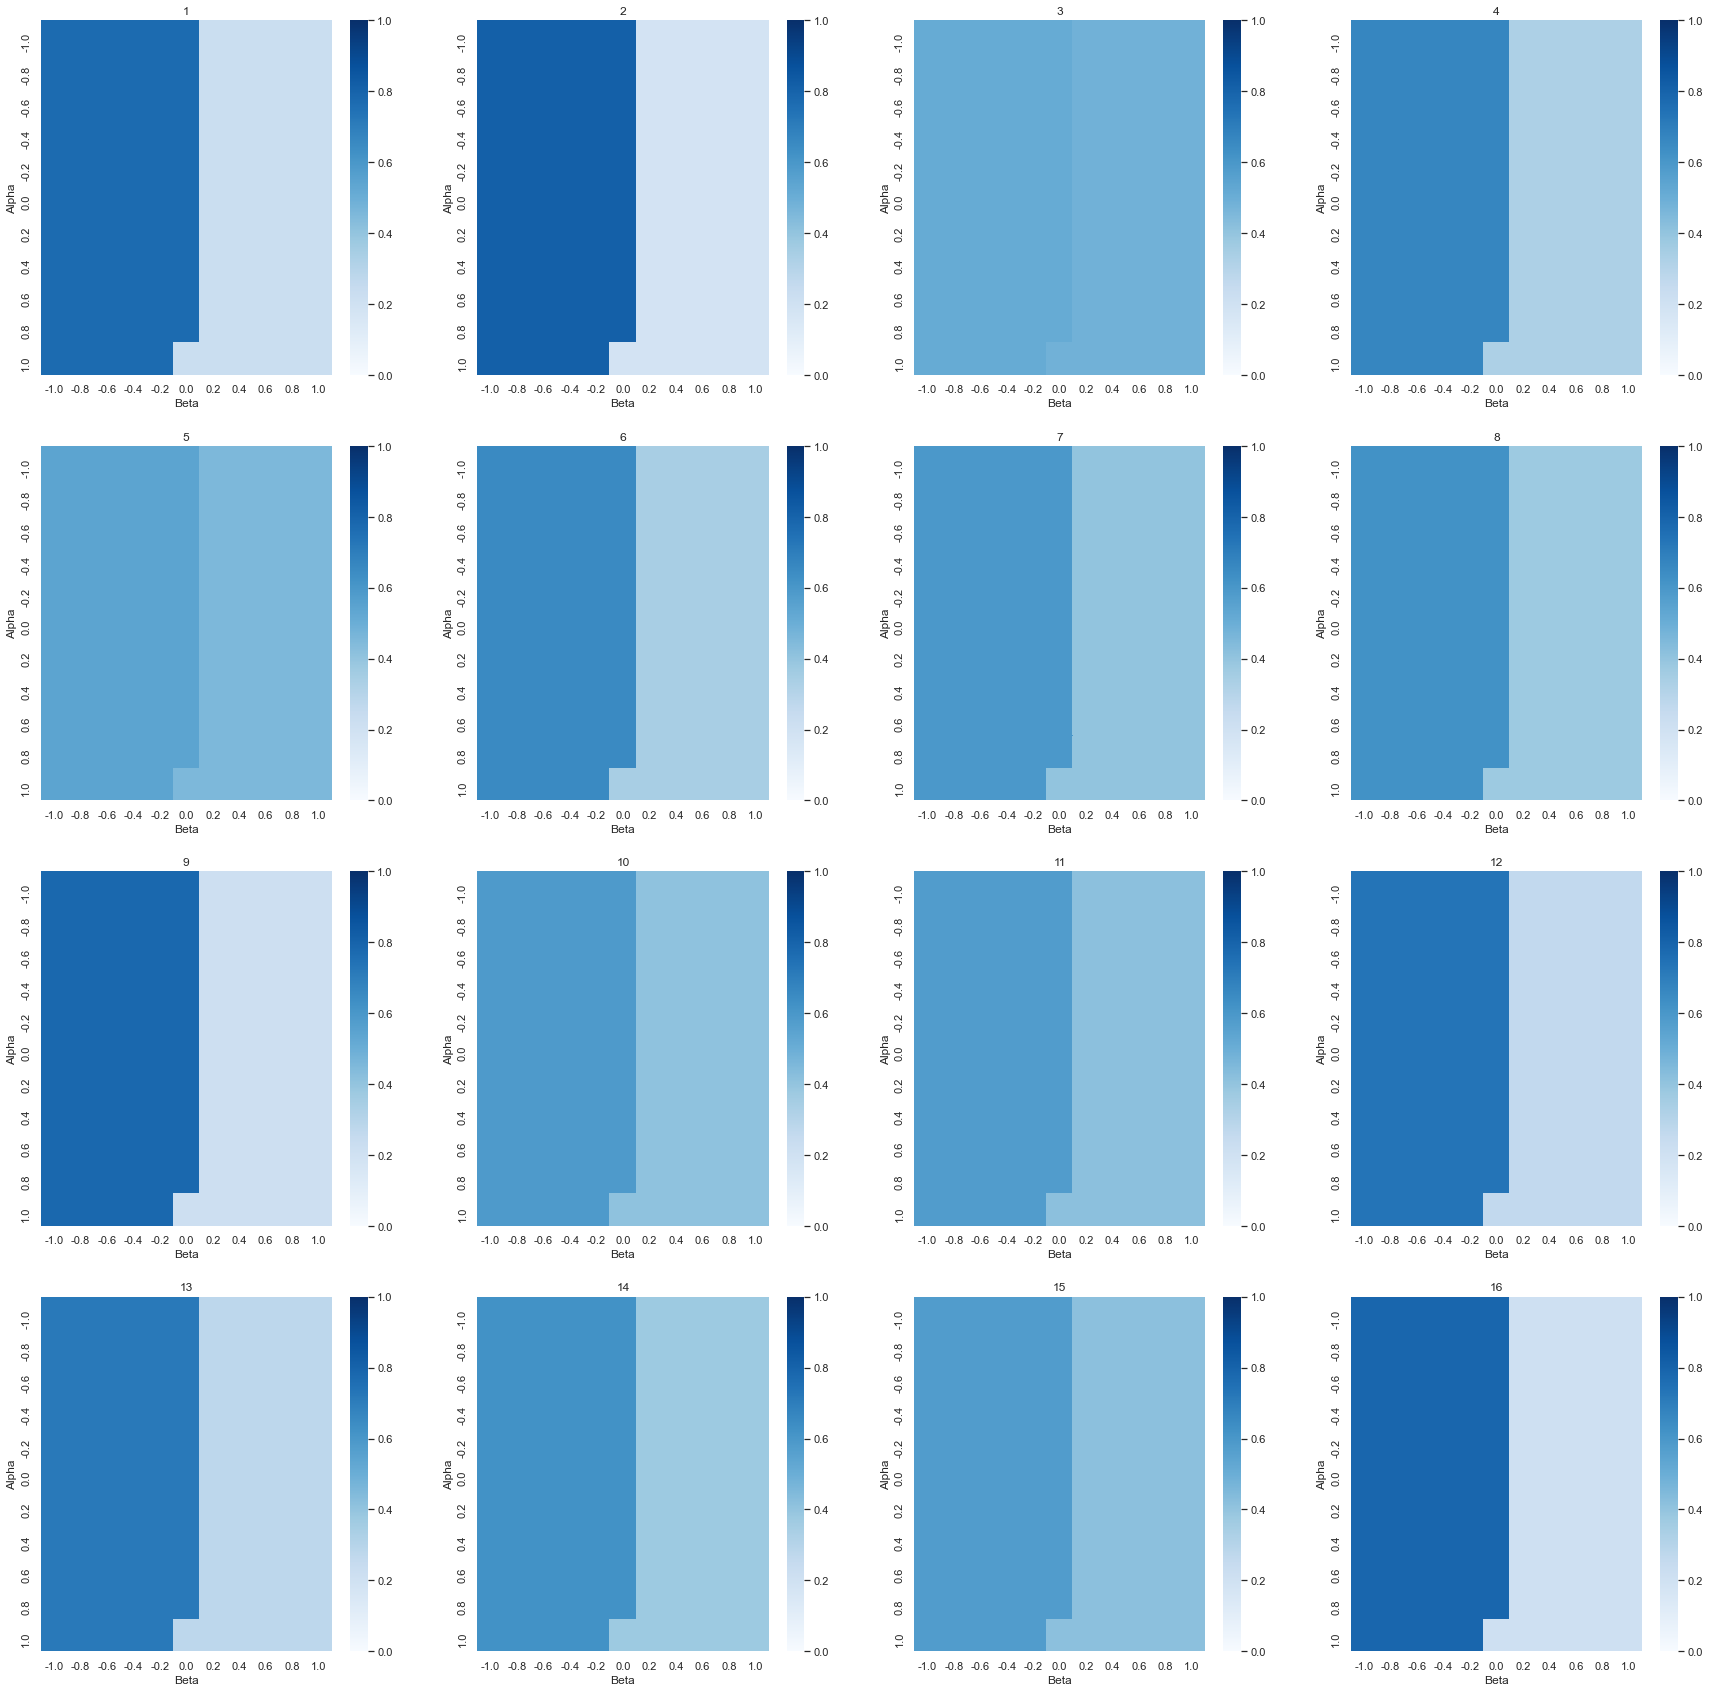

In [136]:
number_of_participants = len(df4['subject'].unique())

for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i)
    
plt.show()

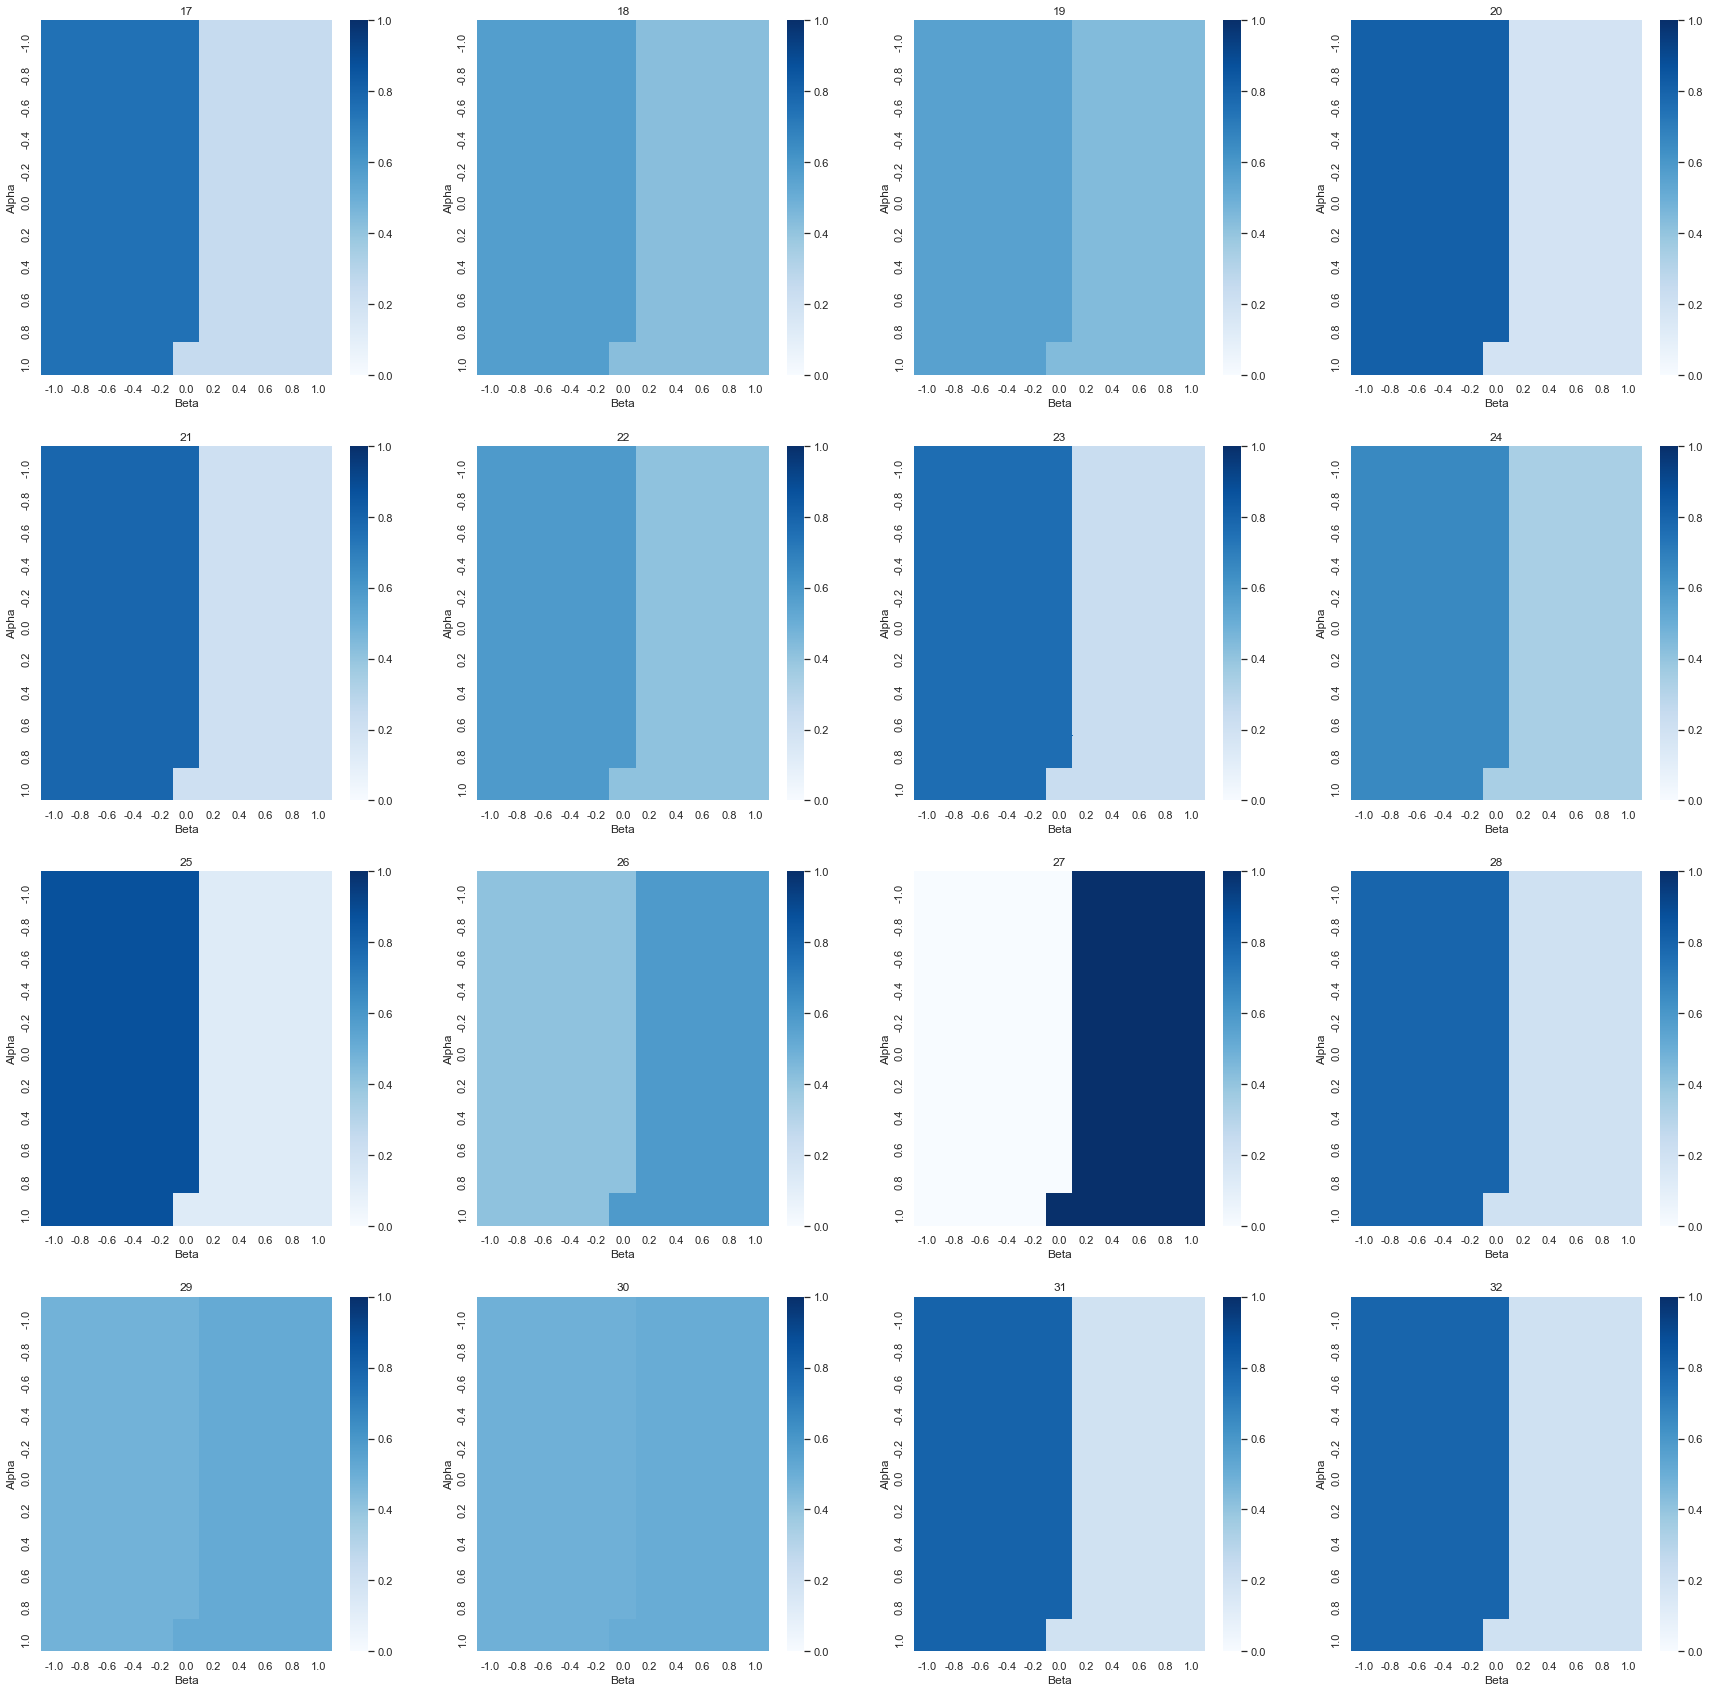

In [137]:
for i in range(number_of_participants//2):
    plt.subplot(no_of_cols, no_of_rows, i+1)
    make_heatmap(i+16)
    
plt.show()

In [138]:
# Making a dummy variable for the particiant type whose error is minimised in the left half of the heat map

freq_table['Is_lowtype'] = 0
freq_table.loc[26,  'Is_lowtype'] = 1
freq_table.loc[27,  'Is_lowtype'] = 1
freq_table.loc[29,  'Is_lowtype'] = 1
freq_table.loc[30,  'Is_lowtype'] = 1

In [139]:
freq_table['C_freq'] = 1-freq_table['D_freq']

In [140]:
# Chi square test for actions vs type of participant

exp1 = freq_table[freq_table['Is_lowtype']==1].sum()
exp2 = freq_table[freq_table['Is_lowtype']==0].sum()

cont_table = pd.DataFrame(index=['C', 'D'], columns=['LowType', 'HighType'], data=[[exp1[2], exp2[2]], [exp1[0], exp2[0]]])
    
# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject H0: Variables are dependent')
else:
    print('H0 holds true: Variables are independent')

p value is 0.49302925652054463
H0 holds true: Variables are independent


In [141]:
#Making parameters for regression

reg = pd.DataFrame(index=df4.index, columns=['subject', 'C_dummy', 'payoff', 'Is_lowtype', 'D_freq'])
reg['C_dummy'] = df4['decision']
reg[['subject', 'payoff']] = df4[['subject', 'payoff']]


for i in df3['subject'].unique():
    reg['Is_lowtype'][reg['subject']==i] = freq_table.loc[i, 'Is_lowtype']
    reg['D_freq'][reg['subject']==i] = freq_table.loc[i, 'D_freq']

In [142]:
# t-test to see how different are expected CR actions from observed actions
# low type plays D

def my_ttest(i): # ttest to check if cr expected matched observed
    x = 1-reg[reg['subject']==i]['Is_lowtype']
    y = df4[df4['subject']==i]['decision']
    t, p = ttest_ind(x, y)
    
    print('For subject ', i, ':')
    if p > 0.05:
        print('Reject Null hypothesis: the expected is significantly different from observed')
    else: print('Cannot reject Null hypothesis: observed matches expected')

In [143]:
for i in freq_table.index:
    my_ttest(i)

For subject  1 :
Cannot reject Null hypothesis: observed matches expected
For subject  2 :
Cannot reject Null hypothesis: observed matches expected
For subject  3 :
Cannot reject Null hypothesis: observed matches expected
For subject  4 :
Cannot reject Null hypothesis: observed matches expected
For subject  5 :
Cannot reject Null hypothesis: observed matches expected
For subject  6 :
Cannot reject Null hypothesis: observed matches expected
For subject  7 :
Cannot reject Null hypothesis: observed matches expected
For subject  8 :
Cannot reject Null hypothesis: observed matches expected
For subject  9 :
Cannot reject Null hypothesis: observed matches expected
For subject  10 :
Cannot reject Null hypothesis: observed matches expected
For subject  11 :
Cannot reject Null hypothesis: observed matches expected
For subject  12 :
Cannot reject Null hypothesis: observed matches expected
For subject  13 :
Cannot reject Null hypothesis: observed matches expected
For subject  14 :
Cannot reject Nu

In [144]:
reg.corr()

,subject,C_dummy,payoff
subject,1.000000,-0.013329,-0.025384
C_dummy,-0.013329,1.000000,0.182747
payoff,-0.025384,0.182747,1.000000


In [145]:
#!pip install rpy2

In [146]:
#import os
#os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.1"

In [147]:
#import rpy2
#from rpy2.robjects.packages import importr

#utils = importr('utils')
#base = importr('base')

#utils.install_packages('psych')

In [148]:
# $ conda install -c r r-essentials

In [149]:
#!pip install -r rpy2.ipython

os.environ["R_HOME"] = r"C:\Program Files\R\R-4.2.1"
import rpy2
from rpy2.robjects.packages import importr
from rpy2 import robjects as ro

In [150]:
#%load_ext rpy2.ipython

In [151]:
#%%R

#library(psych)
#phi(cont_table)

In [152]:
#%R library(psych)